In [1]:
import numpy as np, itertools
import pandas as pd
import time
import timeit
import matplotlib.pyplot as plt 
FreqItems = dict()
support = dict()
candidate_list = []
time_list =[]
iteration = 0

In [2]:
dataset_name = 'retail.txt'
patterns_name = 'patterns.csv'
rules_name = 'rule.csv'
maximal_name = 'maximal.csv'
min_support = 0.0015
min_confidence = .90

In [3]:
count = len(open(dataset_name).readlines( ))
print(count)

88162


In [4]:
#retail_data function reads retail text file data and generates vertical data that is used by ECLAT algorithm,the vertical data is stored in dictionry with key being the item and values being transaction ids(considered as 1,2,3.. as no tids is specified in the file)
def retail_data(filename, delimiter=','):
    data = {}
    transaction = 0
    file_data = open(filename, 'r', encoding="utf8")
    for row in file_data:
        row = row.replace('\n',' ') #to remove new line character for the last item in the line
        transaction += 1
        for item in row.split(delimiter):
            if item not in data:
                 data[item] = set()
            data[item].add(transaction)
    file_data.close()
    return data

In [5]:
#eclat function reads the vertical data generated by retail_data and generates candidates and frequent items considering the min_support specified
def eclat(prefix, items, dict_id,min_supp,iteration=0):
    cpu_time = 0
    print('iteration:',iteration)
    print('\t -candidates:',len(items))
    start = time.perf_counter()
    support = min_supp*count
    candidate_list.append(len(items))
    while items:
        i,itids = items.pop()
        isupp = len(itids)
        if isupp >= support:
            #a candidate item is added to frequent item set if satisfies min_support
            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                #use intersection of transaction ids to compute support
                jtids = itids & ojtids
                if len(jtids) >= support:
                    suffix.append((j,jtids))
                    candidate_list.append(len(jtids))
            dict_id += 1
            #candidate_list.append(isupp)
            #print('candidates:',candidate_list[-1])
            print('\t -Frequent items:',len(suffix))
            end = time.perf_counter()
            cpu_time = end - start
            print('Time:', cpu_time,'seconds')
            time_list.append(cpu_time)
            iteration +=1
            eclat(prefix+[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id,min_supp,iteration)

In [6]:
#execute retail_data to read retail.txt file into vertical data
data = retail_data(dataset_name,' ')
data.pop("\n",None)
data.pop("",None)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [7]:
dict_id = 0
#executing eclat function and prints iterations, candidates and frequent items generated 
eclat([], sorted(data.items(), key=lambda item: len(item[1]), reverse=True), dict_id,min_support)
print(len(FreqItems))
print(sum(candidate_list))

iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.025199800000000216 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03269579999999994 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04505020000000037 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05828370000000049 seconds
iteration: 4
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07466099999999987 seconds
iteration: 5
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08601430000000043 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09977420000000059 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11048849999999977 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.12433890000000059 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1356099999999998 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1498210000000002 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1

	 -Frequent items: 0
Time: 1.3898193 seconds
iteration: 115
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3969474000000002 seconds
iteration: 116
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4040717000000003 seconds
iteration: 117
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4122504999999999 seconds
iteration: 118
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4196914999999999 seconds
iteration: 119
	 -candidates: 0
	 -Frequent items: 0
Time: 1.426654 seconds
iteration: 120
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4342750000000004 seconds
iteration: 121
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4414946000000004 seconds
iteration: 122
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4489719 seconds
iteration: 123
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4558080000000002 seconds
iteration: 124
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4627903 seconds
iteration: 125
	 -candidates: 0
	 -Frequent items: 0
Time: 1.475301 seconds
iteration: 126
	 -candidates: 0
	 -Frequent ite

	 -Frequent items: 0
Time: 2.3770517999999994 seconds
iteration: 232
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3834758000000003 seconds
iteration: 233
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3896951 seconds
iteration: 234
	 -candidates: 0
	 -Frequent items: 0
Time: 2.396846900000001 seconds
iteration: 235
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4053618000000005 seconds
iteration: 236
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4116106999999998 seconds
iteration: 237
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4178761999999994 seconds
iteration: 238
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4250061999999994 seconds
iteration: 239
	 -candidates: 0
	 -Frequent items: 0
Time: 2.432054 seconds
iteration: 240
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4392167000000002 seconds
iteration: 241
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4465317000000004 seconds
iteration: 242
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4566988000000007 seconds
iteration: 243
	 -ca

	 -Frequent items: 0
Time: 3.1602494000000005 seconds
iteration: 330
	 -candidates: 0
	 -Frequent items: 0
Time: 3.1696327999999996 seconds
iteration: 331
	 -candidates: 0
	 -Frequent items: 0
Time: 3.1779167 seconds
iteration: 332
	 -candidates: 0
	 -Frequent items: 0
Time: 3.1882069 seconds
iteration: 333
	 -candidates: 0
	 -Frequent items: 0
Time: 3.1966341 seconds
iteration: 334
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2101593 seconds
iteration: 335
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2252984000000007 seconds
iteration: 336
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2324323999999995 seconds
iteration: 337
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2397503 seconds
iteration: 338
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2463714 seconds
iteration: 339
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2600433000000004 seconds
iteration: 340
	 -candidates: 0
	 -Frequent items: 0
Time: 3.266996700000001 seconds
iteration: 341
	 -candidates: 0
	 -Frequent items: 0
Ti

	 -Frequent items: 0
Time: 4.816479800000001 seconds
iteration: 525
	 -candidates: 0
	 -Frequent items: 0
Time: 4.8226503 seconds
iteration: 526
	 -candidates: 0
	 -Frequent items: 0
Time: 4.8282067 seconds
iteration: 527
	 -candidates: 0
	 -Frequent items: 0
Time: 4.8342199 seconds
iteration: 528
	 -candidates: 0
	 -Frequent items: 0
Time: 4.8397868 seconds
iteration: 529
	 -candidates: 0
	 -Frequent items: 1
Time: 4.8456936 seconds
iteration: 530
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 531
	 -candidates: 0
	 -Frequent items: 1
Time: 4.853666400000001 seconds
iteration: 531
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0021884000000014225 seconds
iteration: 532
	 -candidates: 0
	 -Frequent items: 0
Time: 4.866552700000001 seconds
iteration: 532
	 -candidates: 0
	 -Frequent items: 0
Time: 4.872996100000001 seconds
iteration: 533
	 -candidates: 0
	 -Frequent items: 0
Time: 4.882353300000001 seconds
iteration: 534
	 -candidates: 0
	 -Frequent i

	 -candidates: 0
	 -Frequent items: 1
Time: 5.4417733 seconds
iteration: 599
	 -candidates: 1
	 -Frequent items: 0
Time: 8.470000000038169e-05 seconds
iteration: 600
	 -candidates: 0
	 -Frequent items: 1
Time: 5.4502605 seconds
iteration: 600
	 -candidates: 1
	 -Frequent items: 0
Time: 4.7500000000866294e-05 seconds
iteration: 601
	 -candidates: 0
	 -Frequent items: 1
Time: 5.4559284 seconds
iteration: 601
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0003267000000004572 seconds
iteration: 602
	 -candidates: 0
	 -Frequent items: 2
Time: 5.4633666 seconds
iteration: 602
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010120000000135576 seconds
iteration: 603
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046140000000072234 seconds
iteration: 604
	 -candidates: 0
	 -Frequent items: 1
Time: 5.4747428000000005 seconds
iteration: 603
	 -candidates: 1
	 -Frequent items: 0
Time: 8.659999999949264e-05 seconds
iteration: 604
	 -candidates: 0
	 -Frequent items: 1
Time: 5.482660399999999 seconds

	 -Frequent items: 5
Time: 6.0175966 seconds
iteration: 666
	 -candidates: 5
	 -Frequent items: 0
Time: 8.85999999997722e-05 seconds
iteration: 667
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003685000000004379 seconds
iteration: 668
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005822000000001992 seconds
iteration: 669
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012900000000009015 seconds
iteration: 670
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016476999999994746 seconds
iteration: 671
	 -candidates: 0
	 -Frequent items: 2
Time: 6.0267826 seconds
iteration: 667
	 -candidates: 2
	 -Frequent items: 0
Time: 9.999999999976694e-05 seconds
iteration: 668
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000606400000000562 seconds
iteration: 669
	 -candidates: 0
	 -Frequent items: 1
Time: 6.034171400000001 seconds
iteration: 668
	 -candidates: 1
	 -Frequent items: 0
Time: 0.002376800000000401 seconds
iteration: 669
	 -candidates: 0
	 -Frequent items: 2
Time: 6.0431052 seconds
iterati

	 -Frequent items: 2
Time: 6.391294600000001 seconds
iteration: 712
	 -candidates: 2
	 -Frequent items: 0
Time: 5.81999999997862e-05 seconds
iteration: 713
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001668000000005776 seconds
iteration: 714
	 -candidates: 0
	 -Frequent items: 2
Time: 6.397098300000001 seconds
iteration: 713
	 -candidates: 2
	 -Frequent items: 0
Time: 5.759999999987997e-05 seconds
iteration: 714
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016449999999856857 seconds
iteration: 715
	 -candidates: 0
	 -Frequent items: 0
Time: 6.4037503 seconds
iteration: 714
	 -candidates: 0
	 -Frequent items: 2
Time: 6.4101705 seconds
iteration: 715
	 -candidates: 2
	 -Frequent items: 0
Time: 5.7500000000487717e-05 seconds
iteration: 716
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011166000000013554 seconds
iteration: 717
	 -candidates: 0
	 -Frequent items: 2
Time: 6.4170182 seconds
iteration: 716
	 -candidates: 2
	 -Frequent items: 0
Time: 5.759999999987997e-05 seconds
iterati

iteration: 760
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007058000000004228 seconds
iteration: 761
	 -candidates: 0
	 -Frequent items: 2
Time: 6.7811189999999995 seconds
iteration: 760
	 -candidates: 2
	 -Frequent items: 0
Time: 5.659999999885201e-05 seconds
iteration: 761
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00027699999999875047 seconds
iteration: 762
	 -candidates: 0
	 -Frequent items: 2
Time: 6.7870251999999995 seconds
iteration: 761
	 -candidates: 2
	 -Frequent items: 0
Time: 5.469999999974107e-05 seconds
iteration: 762
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004647000000002066 seconds
iteration: 763
	 -candidates: 0
	 -Frequent items: 2
Time: 6.794836600000001 seconds
iteration: 762
	 -candidates: 2
	 -Frequent items: 0
Time: 9.700000000023579e-05 seconds
iteration: 763
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006135000000000446 seconds
iteration: 764
	 -candidates: 0
	 -Frequent items: 1
Time: 6.80196 seconds
iteration: 763
	 -candidates: 1
	 -Frequent 

	 -Frequent items: 2
Time: 7.1772730000000005 seconds
iteration: 810
	 -candidates: 2
	 -Frequent items: 1
Time: 6.140000000165458e-05 seconds
iteration: 811
	 -candidates: 1
	 -Frequent items: 0
Time: 2.480000000026905e-05 seconds
iteration: 812
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004272000000007381 seconds
iteration: 812
	 -candidates: 0
	 -Frequent items: 2
Time: 7.1823603 seconds
iteration: 811
	 -candidates: 2
	 -Frequent items: 0
Time: 5.920000000081416e-05 seconds
iteration: 812
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001686000000002963 seconds
iteration: 813
	 -candidates: 0
	 -Frequent items: 2
Time: 7.187222300000001 seconds
iteration: 812
	 -candidates: 2
	 -Frequent items: 0
Time: 5.43000000003957e-05 seconds
iteration: 813
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016300000000057935 seconds
iteration: 814
	 -candidates: 0
	 -Frequent items: 2
Time: 7.1919879 seconds
iteration: 813
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010900000000013677 se

	 -Frequent items: 2
Time: 7.585786100000001 seconds
iteration: 855
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010239999999939187 seconds
iteration: 856
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004616999999988991 seconds
iteration: 857
	 -candidates: 0
	 -Frequent items: 2
Time: 7.591791 seconds
iteration: 856
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010360000000098069 seconds
iteration: 857
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046419999999969264 seconds
iteration: 858
	 -candidates: 0
	 -Frequent items: 2
Time: 7.600316800000001 seconds
iteration: 857
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010679999999929635 seconds
iteration: 858
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006598999999987143 seconds
iteration: 859
	 -candidates: 0
	 -Frequent items: 2
Time: 7.607885500000001 seconds
iteration: 858
	 -candidates: 2
	 -Frequent items: 0
Time: 4.4599999998951034e-05 seconds
iteration: 859
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001452399999

	 -Frequent items: 2
Time: 7.960405800000001 seconds
iteration: 898
	 -candidates: 2
	 -Frequent items: 0
Time: 4.57000000011476e-05 seconds
iteration: 899
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002557000000003029 seconds
iteration: 900
	 -candidates: 0
	 -Frequent items: 2
Time: 7.964786600000001 seconds
iteration: 899
	 -candidates: 2
	 -Frequent items: 0
Time: 5.43000000003957e-05 seconds
iteration: 900
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00022739999999998872 seconds
iteration: 901
	 -candidates: 0
	 -Frequent items: 2
Time: 7.9688577 seconds
iteration: 900
	 -candidates: 2
	 -Frequent items: 0
Time: 5.439999999978795e-05 seconds
iteration: 901
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00015690000000034843 seconds
iteration: 902
	 -candidates: 0
	 -Frequent items: 2
Time: 7.973278 seconds
iteration: 901
	 -candidates: 2
	 -Frequent items: 1
Time: 5.840000000034706e-05 seconds
iteration: 902
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3999999999801958e-05 seco

Time: 0.0032156000000007623 seconds
iteration: 939
	 -candidates: 0
	 -Frequent items: 2
Time: 8.338926 seconds
iteration: 938
	 -candidates: 2
	 -Frequent items: 0
Time: 4.209999999993386e-05 seconds
iteration: 939
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00039770000000061145 seconds
iteration: 940
	 -candidates: 0
	 -Frequent items: 1
Time: 8.3444654 seconds
iteration: 939
	 -candidates: 1
	 -Frequent items: 0
Time: 8.839999999921133e-05 seconds
iteration: 940
	 -candidates: 0
	 -Frequent items: 2
Time: 8.350382799999998 seconds
iteration: 940
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010170000000009338 seconds
iteration: 941
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004571000000002101 seconds
iteration: 942
	 -candidates: 0
	 -Frequent items: 2
Time: 8.355315300000001 seconds
iteration: 941
	 -candidates: 2
	 -Frequent items: 0
Time: 4.389999999965255e-05 seconds
iteration: 942
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004588999999999288 seconds
iteration: 943
	

	 -Frequent items: 1
Time: 0.0019257000000010294 seconds
iteration: 982
	 -candidates: 1
	 -Frequent items: 0
Time: 5.909999999964555e-05 seconds
iteration: 983
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024007000000008105 seconds
iteration: 983
	 -candidates: 0
	 -Frequent items: 2
Time: 8.7178264 seconds
iteration: 982
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011239999999901329 seconds
iteration: 983
	 -candidates: 1
	 -Frequent items: 0
Time: 8.530000000028792e-05 seconds
iteration: 984
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010844999999992666 seconds
iteration: 984
	 -candidates: 0
	 -Frequent items: 2
Time: 8.724497500000002 seconds
iteration: 983
	 -candidates: 2
	 -Frequent items: 1
Time: 4.76999999996508e-05 seconds
iteration: 984
	 -candidates: 1
	 -Frequent items: 0
Time: 8.539999999968018e-05 seconds
iteration: 985
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006532999999997458 seconds
iteration: 985
	 -candidates: 0
	 -Frequent items: 2
Time: 8.7307296 

	 -Frequent items: 2
Time: 9.0927824 seconds
iteration: 1026
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010859999999901504 seconds
iteration: 1027
	 -candidates: 1
	 -Frequent items: 0
Time: 8.58000000008019e-05 seconds
iteration: 1028
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008755999999987552 seconds
iteration: 1028
	 -candidates: 0
	 -Frequent items: 2
Time: 9.0988069 seconds
iteration: 1027
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011420000000050834 seconds
iteration: 1028
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002511999999992298 seconds
iteration: 1029
	 -candidates: 0
	 -Frequent items: 2
Time: 9.104614699999999 seconds
iteration: 1028
	 -candidates: 2
	 -Frequent items: 0
Time: 9.969999999981383e-05 seconds
iteration: 1029
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004044699999999679 seconds
iteration: 1030
	 -candidates: 0
	 -Frequent items: 2
Time: 9.115549099999999 seconds
iteration: 1029
	 -candidates: 2
	 -Frequent items: 1
Time: 6.2699999999082

	 -Frequent items: 2
Time: 9.474717600000002 seconds
iteration: 1063
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010639999999995098 seconds
iteration: 1064
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002474000000010079 seconds
iteration: 1065
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010089000000004233 seconds
iteration: 1065
	 -candidates: 0
	 -Frequent items: 2
Time: 9.488144900000002 seconds
iteration: 1064
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00048810000000010234 seconds
iteration: 1065
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0006886999999995425 seconds
iteration: 1066
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005102800000001295 seconds
iteration: 1066
	 -candidates: 0
	 -Frequent items: 2
Time: 9.5008533 seconds
iteration: 1065
	 -candidates: 2
	 -Frequent items: 1
Time: 6.299999999903605e-05 seconds
iteration: 1066
	 -candidates: 1
	 -Frequent items: 0
Time: 2.689999999994086e-05 seconds
iteration: 1067
	 -candidates: 0
	 -Frequent items: 0
Time: 0.

	 -Frequent items: 2
Time: 9.8585727 seconds
iteration: 1104
	 -candidates: 2
	 -Frequent items: 1
Time: 4.9699999998154e-05 seconds
iteration: 1105
	 -candidates: 1
	 -Frequent items: 0
Time: 6.129999999870961e-05 seconds
iteration: 1106
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008513999999983923 seconds
iteration: 1106
	 -candidates: 0
	 -Frequent items: 2
Time: 9.864948900000002 seconds
iteration: 1105
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011770000000055347 seconds
iteration: 1106
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004839000000025351 seconds
iteration: 1107
	 -candidates: 0
	 -Frequent items: 2
Time: 9.8747461 seconds
iteration: 1106
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011160000000032255 seconds
iteration: 1107
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005740000000002965 seconds
iteration: 1108
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012204000000011206 seconds
iteration: 1108
	 -candidates: 0
	 -Frequent items: 2
Time: 9.8807565 s

	 -Frequent items: 4
Time: 10.0465856 seconds
iteration: 1131
	 -candidates: 4
	 -Frequent items: 1
Time: 8.19999999990273e-05 seconds
iteration: 1132
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4400000000923683e-05 seconds
iteration: 1133
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00034989999999979204 seconds
iteration: 1133
	 -candidates: 2
	 -Frequent items: 1
Time: 5.589999999955353e-05 seconds
iteration: 1134
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3000000002326715e-05 seconds
iteration: 1135
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000264800000000065 seconds
iteration: 1135
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010638999999983412 seconds
iteration: 1134
	 -candidates: 1
	 -Frequent items: 0
Time: 2.2900000001158105e-05 seconds
iteration: 1135
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012641999999978282 seconds
iteration: 1135
	 -candidates: 0
	 -Frequent items: 2
Time: 10.052995200000002 seconds
iteration: 1132
	 -candidates: 2
	 -Frequent items: 1
T

	 -Frequent items: 0
Time: 0.0004105000000009795 seconds
iteration: 1153
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007461000000006379 seconds
iteration: 1153
	 -candidates: 0
	 -Frequent items: 2
Time: 10.242484100000002 seconds
iteration: 1152
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011310000000008813 seconds
iteration: 1153
	 -candidates: 1
	 -Frequent items: 0
Time: 8.160000000145828e-05 seconds
iteration: 1154
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013588000000019917 seconds
iteration: 1154
	 -candidates: 0
	 -Frequent items: 2
Time: 10.2492762 seconds
iteration: 1153
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012730000000260588 seconds
iteration: 1154
	 -candidates: 1
	 -Frequent items: 0
Time: 8.569999999963329e-05 seconds
iteration: 1155
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009061000000016861 seconds
iteration: 1155
	 -candidates: 0
	 -Frequent items: 3
Time: 10.263928 seconds
iteration: 1154
	 -candidates: 3
	 -Frequent items: 0
Time: 5.45999

	 -candidates: 2
	 -Frequent items: 1
Time: 5.5599999999600414e-05 seconds
iteration: 1195
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9099999999004922e-05 seconds
iteration: 1196
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005300000000012517 seconds
iteration: 1196
	 -candidates: 0
	 -Frequent items: 2
Time: 10.610845100000002 seconds
iteration: 1195
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011519999999975994 seconds
iteration: 1196
	 -candidates: 1
	 -Frequent items: 0
Time: 8.19000000014114e-05 seconds
iteration: 1197
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010082000000011249 seconds
iteration: 1197
	 -candidates: 0
	 -Frequent items: 2
Time: 10.6162888 seconds
iteration: 1196
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011200000000144428 seconds
iteration: 1197
	 -candidates: 1
	 -Frequent items: 0
Time: 8.339999999762426e-05 seconds
iteration: 1198
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008547000000014293 seconds
iteration: 1198
	 -candidates: 0
	 -F

	 -Frequent items: 1
Time: 0.00014260000000021478 seconds
iteration: 1214
	 -candidates: 1
	 -Frequent items: 0
Time: 8.330000000000837e-05 seconds
iteration: 1215
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008698000000002537 seconds
iteration: 1215
	 -candidates: 0
	 -Frequent items: 4
Time: 10.7954863 seconds
iteration: 1214
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00011209999999906017 seconds
iteration: 1215
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035929999999950724 seconds
iteration: 1216
	 -candidates: 0
	 -Frequent items: 1
Time: 0.010243899999998973 seconds
iteration: 1217
	 -candidates: 1
	 -Frequent items: 0
Time: 5.240000000128475e-05 seconds
iteration: 1218
	 -candidates: 0
	 -Frequent items: 0
Time: 0.010642099999998322 seconds
iteration: 1218
	 -candidates: 0
	 -Frequent items: 3
Time: 10.812659 seconds
iteration: 1215
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00010110000000196351 seconds
iteration: 1216
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00

	 -Frequent items: 6
Time: 10.987119700000001 seconds
iteration: 1233
	 -candidates: 6
	 -Frequent items: 0
Time: 0.00012110000000120635 seconds
iteration: 1234
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000497800000001547 seconds
iteration: 1235
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009168000000023824 seconds
iteration: 1236
	 -candidates: 1
	 -Frequent items: 0
Time: 9.809999999887964e-05 seconds
iteration: 1237
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018422999999998524 seconds
iteration: 1237
	 -candidates: 2
	 -Frequent items: 0
Time: 8.249999999776492e-05 seconds
iteration: 1238
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00033290000000008035 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0028913999999993223 seconds
iteration: 1238
	 -candidates: 1
	 -Frequent items: 0
Time: 9.740000000135751e-05 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04226630000000142 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent it

iteration: 1247
	 -candidates: 1
	 -Frequent items: 0
Time: 4.8800000001847366e-05 seconds
iteration: 1248
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0020354999999980805 seconds
iteration: 1248
	 -candidates: 0
	 -Frequent items: 3
Time: 11.193233900000003 seconds
iteration: 1245
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00015729999999791744 seconds
iteration: 1246
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008947999999975309 seconds
iteration: 1247
	 -candidates: 1
	 -Frequent items: 0
Time: 3.609999999909519e-05 seconds
iteration: 1248
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001261199999998297 seconds
iteration: 1248
	 -candidates: 0
	 -Frequent items: 3
Time: 11.2057088 seconds
iteration: 1246
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00047209999999964225 seconds
iteration: 1247
	 -candidates: 2
	 -Frequent items: 0
Time: 7.090000000076202e-05 seconds
iteration: 1248
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014065999999992584 seconds
iteration: 1249
	 -can

	 -Frequent items: 3
Time: 11.3781745 seconds
iteration: 1259
	 -candidates: 3
	 -Frequent items: 1
Time: 0.00012680000000031555 seconds
iteration: 1260
	 -candidates: 1
	 -Frequent items: 0
Time: 5.300000000119098e-05 seconds
iteration: 1261
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006351999999978375 seconds
iteration: 1261
	 -candidates: 1
	 -Frequent items: 0
Time: 6.409999999945626e-05 seconds
iteration: 1262
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011224999999974727 seconds
iteration: 1262
	 -candidates: 0
	 -Frequent items: 4
Time: 11.384127800000002 seconds
iteration: 1260
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00011510000000214404 seconds
iteration: 1261
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004288000000016723 seconds
iteration: 1262
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0015354999999992458 seconds
iteration: 1263
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00013269999999820925 seconds
iteration: 1264
	 -candidates: 0
	 -Frequent items: 0


	 -Frequent items: 5
Time: 11.561288400000002 seconds
iteration: 1272
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00013229999999708753 seconds
iteration: 1273
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000522599999996487 seconds
iteration: 1274
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009006999999989773 seconds
iteration: 1275
	 -candidates: 1
	 -Frequent items: 0
Time: 8.220000000136451e-05 seconds
iteration: 1276
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001699599999998469 seconds
iteration: 1276
	 -candidates: 1
	 -Frequent items: 0
Time: 8.159999999790557e-05 seconds
iteration: 1277
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0025417999999994834 seconds
iteration: 1277
	 -candidates: 0
	 -Frequent items: 5
Time: 11.5667936 seconds
iteration: 1273
	 -candidates: 5
	 -Frequent items: 1
Time: 0.00012849999999886563 seconds
iteration: 1274
	 -candidates: 1
	 -Frequent items: 0
Time: 8.19999999990273e-05 seconds
iteration: 1275
	 -candidates: 0
	 -Frequent items: 0
Time

	 -Frequent items: 5
Time: 11.746155400000003 seconds
iteration: 1288
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00012519999999938136 seconds
iteration: 1289
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004102000000010264 seconds
iteration: 1290
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006780000000006225 seconds
iteration: 1291
	 -candidates: 1
	 -Frequent items: 0
Time: 5.390000000105033e-05 seconds
iteration: 1292
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0012490999999990038 seconds
iteration: 1292
	 -candidates: 1
	 -Frequent items: 0
Time: 5.2699999997685154e-05 seconds
iteration: 1293
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016856000000018412 seconds
iteration: 1293
	 -candidates: 0
	 -Frequent items: 5
Time: 11.7521764 seconds
iteration: 1289
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00013799999999974943 seconds
iteration: 1290
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005534000000011474 seconds
iteration: 1291
	 -candidates: 0
	 -Frequent items: 2


Time: 6.86999999999216e-05 seconds
iteration: 1303
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02339629999999815 seconds
iteration: 1304
	 -candidates: 0
	 -Frequent items: 1
Time: 0.027086199999999394 seconds
iteration: 1303
	 -candidates: 1
	 -Frequent items: 0
Time: 8.200000000258001e-05 seconds
iteration: 1304
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02800099999999972 seconds
iteration: 1304
	 -candidates: 0
	 -Frequent items: 5
Time: 11.951438200000002 seconds
iteration: 1300
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00013200000000068712 seconds
iteration: 1301
	 -candidates: 2
	 -Frequent items: 1
Time: 9.35999999995829e-05 seconds
iteration: 1302
	 -candidates: 1
	 -Frequent items: 0
Time: 8.189999999785869e-05 seconds
iteration: 1303
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012413000000002228 seconds
iteration: 1303
	 -candidates: 0
	 -Frequent items: 3
Time: 0.00248589999999993 seconds
iteration: 1302
	 -candidates: 3
	 -Frequent items: 2
Time: 0.0001031000000

	 -candidates: 1
	 -Frequent items: 0
Time: 3.9400000002132174e-05 seconds
iteration: 1315
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015996999999998707 seconds
iteration: 1315
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0043402999999990755 seconds
iteration: 1314
	 -candidates: 1
	 -Frequent items: 0
Time: 8.090000000038344e-05 seconds
iteration: 1315
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005046600000000012 seconds
iteration: 1315
	 -candidates: 0
	 -Frequent items: 5
Time: 12.1335236 seconds
iteration: 1311
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00012519999999938136 seconds
iteration: 1312
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004133000000017262 seconds
iteration: 1313
	 -candidates: 1
	 -Frequent items: 0
Time: 5.460000000212517e-05 seconds
iteration: 1314
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009484000000021808 seconds
iteration: 1314
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002727999999976305 seconds
iteration: 1315
	 -candidates: 0
	 -

	 -Frequent items: 1
Time: 0.0010800000000017462 seconds
iteration: 1326
	 -candidates: 1
	 -Frequent items: 0
Time: 5.110000000030368e-05 seconds
iteration: 1327
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015737999999991814 seconds
iteration: 1327
	 -candidates: 0
	 -Frequent items: 1
Time: 0.005722000000002225 seconds
iteration: 1326
	 -candidates: 1
	 -Frequent items: 0
Time: 4.76999999996508e-05 seconds
iteration: 1327
	 -candidates: 0
	 -Frequent items: 0
Time: 0.006123099999999937 seconds
iteration: 1327
	 -candidates: 0
	 -Frequent items: 5
Time: 12.318264900000003 seconds
iteration: 1322
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00013329999999811548 seconds
iteration: 1323
	 -candidates: 2
	 -Frequent items: 0
Time: 6.239999999735346e-05 seconds
iteration: 1324
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000261099999999459 seconds
iteration: 1325
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0008639999999999759 seconds
iteration: 1324
	 -candidates: 2
	 -Frequent item

iteration: 1334
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08405970000000096 seconds
iteration: 1335
	 -candidates: 0
	 -Frequent items: 1
Time: 0.08444439999999886 seconds
iteration: 1336
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 1337
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08527480000000054 seconds
iteration: 1337
	 -candidates: 0
	 -Frequent items: 3
Time: 0.09094329999999928 seconds
iteration: 1334
	 -candidates: 3
	 -Frequent items: 1
Time: 0.00011379999999761026 seconds
iteration: 1335
	 -candidates: 1
	 -Frequent items: 0
Time: 6.450000000057798e-05 seconds
iteration: 1336
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008851999999990312 seconds
iteration: 1336
	 -candidates: 1
	 -Frequent items: 0
Time: 8.549999999729607e-05 seconds
iteration: 1337
	 -candidates: 0
	 -Frequent items: 0
Time: 0.022762699999997693 seconds
iteration: 1337
	 -candidates: 0
	 -Frequent items: 2
Time: 0.1150410000000015 seconds
iteration: 1335
	 -can

	 -candidates: 0
	 -Frequent items: 3
Time: 0.01693129999999954 seconds
iteration: 1341
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00018629999999930646 seconds
iteration: 1342
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006209999999988725 seconds
iteration: 1343
	 -candidates: 1
	 -Frequent items: 0
Time: 9.92000000010762e-05 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015329999999984523 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 2
Time: 0.01923839999999899 seconds
iteration: 1342
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001299999999986312 seconds
iteration: 1343
	 -candidates: 1
	 -Frequent items: 0
Time: 5.3399999998759995e-05 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005786000000007618 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0205687999999995 seconds
iteration: 1343
	 -candidates: 1
	 -Frequent items: 0
Time: 8.58000000008019e-05 seconds
iteration: 1344
	 -candidates: 0


Time: 2.320000000111122e-05 seconds
iteration: 1346
	 -candidates: 0
	 -Frequent items: 2
Time: 0.003126599999998092 seconds
iteration: 1346
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3499999999928605e-05 seconds
iteration: 1347
	 -candidates: 1
	 -Frequent items: 0
Time: 2.650000000059549e-05 seconds
iteration: 1348
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00032919999999947436 seconds
iteration: 1348
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0037242999999982374 seconds
iteration: 1347
	 -candidates: 1
	 -Frequent items: 0
Time: 2.569999999835204e-05 seconds
iteration: 1348
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004172599999996862 seconds
iteration: 1348
	 -candidates: 0
	 -Frequent items: 3
Time: 0.042748400000000686 seconds
iteration: 1345
	 -candidates: 3
	 -Frequent items: 2
Time: 7.929999999944926e-05 seconds
iteration: 1346
	 -candidates: 2
	 -Frequent items: 1
Time: 4.96000000005381e-05 seconds
iteration: 1347
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5399

In [8]:
#frequent_itemsets writes frequent items and its corresponding support count and support into patterns.csv file
def frequent_itemsets(output_FreqItems, FreqItems):
    num_lines = sum(1 for line in open(dataset_name))
    tuple_frequent = []
    frequent_list = []
    support_list = []
    seperator = '-'
    file = open(output_FreqItems, 'w+')
    for item, support in FreqItems.items():
        frequent_list.append(item)
        support_count = round(support,4)
        support_ = support_count/num_lines
        support_list.append(support)
        file.write(" {} ,{}, {}  \n".format(seperator.join(item),support_count,support_))
        tuple_frequent.append("{},{},{}".format([list(item)],support_count,support_))
    return frequent_list,support_list,tuple_frequent

In [9]:
#execute frequent_itemsets
frequent_list,support_list,tuple_frequent = frequent_itemsets(patterns_name, FreqItems)
sort_freq_list = sorted(frequent_list,key=lambda x:len(x),reverse=True)

In [10]:
#maximal function identifies the maximal frequent itemsets from the frequent itemsets generated by eclat function
def maximal(frequent_set,support):
    maximal_frequent_set=[[]]
    maximal_frequent_item_count=0
    suppot_list = []
    maximal_frequent_set.append(sort_freq_list[0])
    for i in range(len(frequent_set)-1):
        row=frequent_set[i]
        for item in row:
            maximal_frequent_item=True
            for next_item in frequent_set[i+1]:
                is_subset = item<=next_item
                if is_subset:
                    maximal_frequent_item=False
            if maximal_frequent_item: 
                maximal_frequent_set.append(row)
                support_list.append(support[i])
                maximal_frequent_item_count +=1
    return maximal_frequent_set,maximal_frequent_item_count,support

In [11]:
#execute maximal function and print compression ratio, total frequent items and maximal patterns
maximal_frequent_set,maximal_frequent_item_count,support = maximal(frequent_list,support_list)
compression = ((len(FreqItems)-(len(maximal_frequent_set)))/len(FreqItems))*100
print('Compression ratio:')
print('\t-frequent itemsets:', len(FreqItems))
print('\t-maximal patterns:', len(maximal_frequent_set))
print('\t-compression ratio:', round(compression,2),'%')

Compression ratio:
	-frequent itemsets: 4237
	-maximal patterns: 2008
	-compression ratio: 52.61 %


In [12]:
#max_itemsets function writes maximal frequent items with its corresponding support count and support
def max_itemsets(output_FreqItems, FreqItems,supp):
    num_lines = sum(1 for line in open(dataset_name))
    seperator='-'
    file = open(output_FreqItems, 'w+')
    for i in range(1,len(FreqItems)-2):
        file.write(" {} ,{}, {}  \n".format(seperator.join(FreqItems[i]),supp[i],(supp[i]/len(FreqItems))))

In [13]:
max_itemsets(maximal_name,maximal_frequent_set,support)

In [14]:
#rules function is used to mine association rules that satisfies min_confidence
def rules(FreqItems, confidence):
    Rules = []
    cnt = 0
    cpu_time = 0
    start = time.perf_counter()
    for items, support in FreqItems.items():
        if (len(items) > 1):
            all_perms = list(itertools.permutations(items, len(items)))
            for lst in all_perms:
                antecedent = lst[:len(lst) - 1]
                consequent = lst[-1:]
                conf = float(FreqItems[frozenset(items)]/FreqItems[frozenset(antecedent)]*100)
                if (conf/100) >= confidence:
                    cnt += 1
                    lift = float(conf/FreqItems[frozenset(consequent)])*100
                    Rules.append((antecedent,consequent, support,conf))
                    break
    end = time.perf_counter()
    cpu_time = end - start
    print('Time:', cpu_time)
    print('Strong Rules:',cnt)
    r = sorted(Rules, key=lambda x: x[3],reverse=True)
    j=1
    for a, b,supp_c,conf in r:
        if j<=20:
            #print('Rule',j,':',(a),'==>',b,',',supp_c,',',supp_c/len(FreqItems),',',conf/100)
            print('Rule',j,':',str(a).replace('(','').replace(')',''),'=>',str(b).replace('(','').replace(')',''),',','conf=',conf/100)
            j=j+1
        else:
            break
    return Rules

In [15]:
#print_rules writes rules with corresponding support count,support and confidence
def print_rules(output_Rules, Rules):
    file = open(output_Rules, 'w+')
    seperator='-'
    for a, b,supp_c,conf in sorted(Rules):
        file.write("{} ==> {},{},{},{} \n".format(seperator.join(a), seperator.join(b), round(supp_c, 4),round(supp_c/len(FreqItems),4),round(conf/100, 4)))
    file.close()

In [16]:
#Execute rules and print_rule and prints the total cpu time and strong rules and top 20 rules
Rules = rules(FreqItems, min_confidence)
print_rules(rules_name, Rules)

Time: 0.05358010000000135
Strong Rules: 156
Rule 1 : '32', '39', '37' => '38', , conf= 1.0
Rule 2 : '41', '48', '37', '39' => '38', , conf= 1.0
Rule 3 : '41', '37', '48' => '38', , conf= 1.0
Rule 4 : '89', '170', '48' => '38', , conf= 1.0
Rule 5 : '41', '110', '48', '39' => '38', , conf= 0.9971181556195965
Rule 6 : '39', '371', '48' => '38', , conf= 0.9966101694915256
Rule 7 : '39', '105', '48' => '38', , conf= 0.9965635738831615
Rule 8 : '41', '37' => '38', , conf= 0.9959514170040485
Rule 9 : '41', '39', '37' => '38', , conf= 0.9950738916256158
Rule 10 : '110', '48', '39', '32' => '38', , conf= 0.995049504950495
Rule 11 : '32', '37' => '38', , conf= 0.9946236559139785
Rule 12 : '16431', '48' => '16430', , conf= 0.9942857142857143
Rule 13 : '39', '110', '48' => '38', , conf= 0.9942140790742526
Rule 14 : '41', '371' => '38', , conf= 0.9941860465116279
Rule 15 : '41', '790', '39' => '38', , conf= 0.9935064935064937
Rule 16 : '32', '39', '286' => '38', , conf= 0.9930555555555556
Rule 17 :

In [17]:
#sensitive_analysis function executes eclat function with different min_support to analyse how min_support affects cpu execution time, candidates and frequent items generated by plotting a graph
def sensitive_analysis():
    min_support_list =[0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]
    cand_list = []
    freq_list = []
    time_exe = []
    cpu_time_exe = 0
    for i in min_support_list:
        global FreqItems,candidate_list,time_list
        FreqItems = dict()
        candidate_list = []
        time_list =[]
        if bool(FreqItems):
            break
        else:
            start = time.perf_counter()
            eclat([], sorted(data.items(), key=lambda item: len(item[1]), reverse=True), dict_id,i)
            end = time.perf_counter()
            cpu_time_exe = end-start
            cand_list.append(sum(candidate_list))
            freq_list.append(len(FreqItems))
            time_exe.append(cpu_time_exe)
    plt.plot(min_support_list,freq_list)
    plt.xlabel('Minimum Support')
    plt.ylabel('Frequent count')
    plt.title('Minimum support versus frequent count')
    plt.show()
    plt.plot(min_support_list,cand_list)
    plt.xlabel('Minimum Support')
    plt.ylabel('candidate count')
    plt.title('Minimum support versus candidate count')
    plt.show()
    plt.plot(min_support_list,time_exe)
    plt.xlabel('Minimum Support')
    plt.ylabel('cpu time')
    plt.title('Minimum support versus cputime')
    plt.show()

iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.026854499999998893 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.037488799999998434 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.049464900000000256 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05870870000000039 seconds
iteration: 4
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06814889999999707 seconds
iteration: 5
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07744659999999826 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0868298999999979 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09593899999999778 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1047495000000005 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1137441999999993 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.128082899999999 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.13

	 -Frequent items: 0
Time: 1.2207234999999983 seconds
iteration: 112
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2319505 seconds
iteration: 113
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2413053999999981 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 1.253072699999997 seconds
iteration: 115
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2624283999999975 seconds
iteration: 116
	 -candidates: 0
	 -Frequent items: 0
Time: 1.272258899999997 seconds
iteration: 117
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2819927 seconds
iteration: 118
	 -candidates: 0
	 -Frequent items: 1
Time: 1.292371799999998 seconds
iteration: 119
	 -candidates: 1
	 -Frequent items: 0
Time: 2.86000000002673e-05 seconds
iteration: 120
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3041552000000003 seconds
iteration: 120
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3135028999999996 seconds
iteration: 121
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3225403 seconds
iteration: 122
	 -candidates

	 -Frequent items: 0
Time: 2.2445024999999994 seconds
iteration: 210
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2539339999999974 seconds
iteration: 211
	 -candidates: 0
	 -Frequent items: 0
Time: 2.263888699999999 seconds
iteration: 212
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2723575999999994 seconds
iteration: 213
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2835006999999976 seconds
iteration: 214
	 -candidates: 0
	 -Frequent items: 0
Time: 2.292833299999998 seconds
iteration: 215
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3027497999999973 seconds
iteration: 216
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3152076999999984 seconds
iteration: 217
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3242847999999974 seconds
iteration: 218
	 -candidates: 0
	 -Frequent items: 0
Time: 2.336569299999997 seconds
iteration: 219
	 -candidates: 0
	 -Frequent items: 0
Time: 2.349016299999999 seconds
iteration: 220
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3581715999999986 seconds
iter

	 -Frequent items: 0
Time: 3.2799309 seconds
iteration: 310
	 -candidates: 0
	 -Frequent items: 0
Time: 3.289614499999999 seconds
iteration: 311
	 -candidates: 0
	 -Frequent items: 0
Time: 3.299451099999999 seconds
iteration: 312
	 -candidates: 0
	 -Frequent items: 1
Time: 3.3078812999999982 seconds
iteration: 313
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7500000001623448e-05 seconds
iteration: 314
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3188747999999997 seconds
iteration: 314
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3279669999999975 seconds
iteration: 315
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3381322000000004 seconds
iteration: 316
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3472212999999975 seconds
iteration: 317
	 -candidates: 0
	 -Frequent items: 0
Time: 3.363114799999998 seconds
iteration: 318
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3743279999999984 seconds
iteration: 319
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3834507999999985 seconds
iteratio

	 -Frequent items: 0
Time: 4.3925060999999985 seconds
iteration: 419
	 -candidates: 0
	 -Frequent items: 0
Time: 4.401830699999998 seconds
iteration: 420
	 -candidates: 0
	 -Frequent items: 0
Time: 4.410996099999998 seconds
iteration: 421
	 -candidates: 0
	 -Frequent items: 0
Time: 4.418941199999999 seconds
iteration: 422
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4282395 seconds
iteration: 423
	 -candidates: 0
	 -Frequent items: 0
Time: 4.438081499999999 seconds
iteration: 424
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4490044 seconds
iteration: 425
	 -candidates: 0
	 -Frequent items: 0
Time: 4.457896099999999 seconds
iteration: 426
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4716077 seconds
iteration: 427
	 -candidates: 0
	 -Frequent items: 0
Time: 4.484114099999999 seconds
iteration: 428
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4925967 seconds
iteration: 429
	 -candidates: 0
	 -Frequent items: 0
Time: 4.501777099999998 seconds
iteration: 430
	 -candidates: 0
	 -Frequent

	 -Frequent items: 0
Time: 5.459795399999997 seconds
iteration: 526
	 -candidates: 0
	 -Frequent items: 0
Time: 5.468822899999999 seconds
iteration: 527
	 -candidates: 0
	 -Frequent items: 0
Time: 5.477131 seconds
iteration: 528
	 -candidates: 0
	 -Frequent items: 0
Time: 5.4880137 seconds
iteration: 529
	 -candidates: 0
	 -Frequent items: 0
Time: 5.501407199999999 seconds
iteration: 530
	 -candidates: 0
	 -Frequent items: 0
Time: 5.5125679000000005 seconds
iteration: 531
	 -candidates: 0
	 -Frequent items: 0
Time: 5.5216311000000005 seconds
iteration: 532
	 -candidates: 0
	 -Frequent items: 0
Time: 5.5344202 seconds
iteration: 533
	 -candidates: 0
	 -Frequent items: 0
Time: 5.5461904 seconds
iteration: 534
	 -candidates: 0
	 -Frequent items: 0
Time: 5.558013299999999 seconds
iteration: 535
	 -candidates: 0
	 -Frequent items: 0
Time: 5.568834799999998 seconds
iteration: 536
	 -candidates: 0
	 -Frequent items: 0
Time: 5.579514799999998 seconds
iteration: 537
	 -candidates: 0
	 -Frequent

Time: 6.496865 seconds
iteration: 628
	 -candidates: 0
	 -Frequent items: 0
Time: 6.505385399999998 seconds
iteration: 629
	 -candidates: 0
	 -Frequent items: 0
Time: 6.5150746999999996 seconds
iteration: 630
	 -candidates: 0
	 -Frequent items: 0
Time: 6.524178199999998 seconds
iteration: 631
	 -candidates: 0
	 -Frequent items: 0
Time: 6.5352174000000005 seconds
iteration: 632
	 -candidates: 0
	 -Frequent items: 0
Time: 6.545849999999998 seconds
iteration: 633
	 -candidates: 0
	 -Frequent items: 0
Time: 6.5561598 seconds
iteration: 634
	 -candidates: 0
	 -Frequent items: 0
Time: 6.567582699999999 seconds
iteration: 635
	 -candidates: 0
	 -Frequent items: 0
Time: 6.5786731 seconds
iteration: 636
	 -candidates: 0
	 -Frequent items: 0
Time: 6.5932545000000005 seconds
iteration: 637
	 -candidates: 0
	 -Frequent items: 0
Time: 6.604155799999997 seconds
iteration: 638
	 -candidates: 0
	 -Frequent items: 0
Time: 6.6156071999999995 seconds
iteration: 639
	 -candidates: 0
	 -Frequent items: 0
T

	 -candidates: 0
	 -Frequent items: 0
Time: 7.556615299999997 seconds
iteration: 732
	 -candidates: 0
	 -Frequent items: 0
Time: 7.565239899999998 seconds
iteration: 733
	 -candidates: 0
	 -Frequent items: 0
Time: 7.573335099999998 seconds
iteration: 734
	 -candidates: 0
	 -Frequent items: 0
Time: 7.581705199999998 seconds
iteration: 735
	 -candidates: 0
	 -Frequent items: 0
Time: 7.590456399999997 seconds
iteration: 736
	 -candidates: 0
	 -Frequent items: 1
Time: 7.598541599999997 seconds
iteration: 737
	 -candidates: 1
	 -Frequent items: 0
Time: 2.800000000036107e-05 seconds
iteration: 738
	 -candidates: 0
	 -Frequent items: 0
Time: 7.607583999999999 seconds
iteration: 738
	 -candidates: 0
	 -Frequent items: 0
Time: 7.6166062 seconds
iteration: 739
	 -candidates: 0
	 -Frequent items: 0
Time: 7.625827399999999 seconds
iteration: 740
	 -candidates: 0
	 -Frequent items: 0
Time: 7.635193399999999 seconds
iteration: 741
	 -candidates: 0
	 -Frequent items: 0
Time: 7.6439600999999975 second

	 -Frequent items: 0
Time: 8.600140099999997 seconds
iteration: 839
	 -candidates: 0
	 -Frequent items: 0
Time: 8.610846499999997 seconds
iteration: 840
	 -candidates: 0
	 -Frequent items: 0
Time: 8.6189654 seconds
iteration: 841
	 -candidates: 0
	 -Frequent items: 0
Time: 8.6275059 seconds
iteration: 842
	 -candidates: 0
	 -Frequent items: 0
Time: 8.6362217 seconds
iteration: 843
	 -candidates: 0
	 -Frequent items: 0
Time: 8.648073499999999 seconds
iteration: 844
	 -candidates: 0
	 -Frequent items: 0
Time: 8.6573769 seconds
iteration: 845
	 -candidates: 0
	 -Frequent items: 0
Time: 8.665227899999998 seconds
iteration: 846
	 -candidates: 0
	 -Frequent items: 0
Time: 8.673346799999997 seconds
iteration: 847
	 -candidates: 0
	 -Frequent items: 0
Time: 8.6826255 seconds
iteration: 848
	 -candidates: 0
	 -Frequent items: 0
Time: 8.704994199999998 seconds
iteration: 849
	 -candidates: 0
	 -Frequent items: 0
Time: 8.714432299999999 seconds
iteration: 850
	 -candidates: 0
	 -Frequent items: 0

	 -Frequent items: 0
Time: 9.604376899999998 seconds
iteration: 939
	 -candidates: 0
	 -Frequent items: 0
Time: 9.613101799999999 seconds
iteration: 940
	 -candidates: 0
	 -Frequent items: 0
Time: 9.622953199999998 seconds
iteration: 941
	 -candidates: 0
	 -Frequent items: 0
Time: 9.630511199999997 seconds
iteration: 942
	 -candidates: 0
	 -Frequent items: 0
Time: 9.6387313 seconds
iteration: 943
	 -candidates: 0
	 -Frequent items: 0
Time: 9.6473236 seconds
iteration: 944
	 -candidates: 0
	 -Frequent items: 0
Time: 9.656126999999998 seconds
iteration: 945
	 -candidates: 0
	 -Frequent items: 0
Time: 9.6644695 seconds
iteration: 946
	 -candidates: 0
	 -Frequent items: 0
Time: 9.678322299999998 seconds
iteration: 947
	 -candidates: 0
	 -Frequent items: 1
Time: 9.691698899999999 seconds
iteration: 948
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00044949999999843726 seconds
iteration: 949
	 -candidates: 0
	 -Frequent items: 0
Time: 9.7044712 seconds
iteration: 949
	 -candidates: 0
	 -Freq

	 -candidates: 0
	 -Frequent items: 0
Time: 10.652828699999997 seconds
iteration: 1044
	 -candidates: 0
	 -Frequent items: 0
Time: 10.660833399999998 seconds
iteration: 1045
	 -candidates: 0
	 -Frequent items: 1
Time: 10.6719324 seconds
iteration: 1046
	 -candidates: 1
	 -Frequent items: 0
Time: 0.001895799999999781 seconds
iteration: 1047
	 -candidates: 0
	 -Frequent items: 1
Time: 10.683446700000001 seconds
iteration: 1047
	 -candidates: 1
	 -Frequent items: 0
Time: 0.000540700000001948 seconds
iteration: 1048
	 -candidates: 0
	 -Frequent items: 0
Time: 10.6954812 seconds
iteration: 1048
	 -candidates: 0
	 -Frequent items: 0
Time: 10.704273699999998 seconds
iteration: 1049
	 -candidates: 0
	 -Frequent items: 1
Time: 10.712746399999997 seconds
iteration: 1050
	 -candidates: 1
	 -Frequent items: 0
Time: 3.0000000002416982e-05 seconds
iteration: 1051
	 -candidates: 0
	 -Frequent items: 1
Time: 10.721676599999999 seconds
iteration: 1051
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00042

	 -Frequent items: 0
Time: 11.436335500000002 seconds
iteration: 1123
	 -candidates: 0
	 -Frequent items: 2
Time: 11.445409899999998 seconds
iteration: 1124
	 -candidates: 2
	 -Frequent items: 0
Time: 3.6700000002554134e-05 seconds
iteration: 1125
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016500000000263526 seconds
iteration: 1126
	 -candidates: 0
	 -Frequent items: 0
Time: 11.457017400000002 seconds
iteration: 1125
	 -candidates: 0
	 -Frequent items: 1
Time: 11.466452 seconds
iteration: 1126
	 -candidates: 1
	 -Frequent items: 0
Time: 6.259999999969068e-05 seconds
iteration: 1127
	 -candidates: 0
	 -Frequent items: 0
Time: 11.476534699999998 seconds
iteration: 1127
	 -candidates: 0
	 -Frequent items: 0
Time: 11.484684099999999 seconds
iteration: 1128
	 -candidates: 0
	 -Frequent items: 0
Time: 11.494528399999997 seconds
iteration: 1129
	 -candidates: 0
	 -Frequent items: 0
Time: 11.503408699999998 seconds
iteration: 1130
	 -candidates: 0
	 -Frequent items: 0
Time: 11.5118792 sec

	 -Frequent items: 0
Time: 12.251483599999997 seconds
iteration: 1206
	 -candidates: 0
	 -Frequent items: 0
Time: 12.259138699999998 seconds
iteration: 1207
	 -candidates: 0
	 -Frequent items: 0
Time: 12.267921300000001 seconds
iteration: 1208
	 -candidates: 0
	 -Frequent items: 0
Time: 12.2766141 seconds
iteration: 1209
	 -candidates: 0
	 -Frequent items: 2
Time: 12.289207899999997 seconds
iteration: 1210
	 -candidates: 2
	 -Frequent items: 0
Time: 9.509999999579577e-05 seconds
iteration: 1211
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004700999999940336 seconds
iteration: 1212
	 -candidates: 0
	 -Frequent items: 0
Time: 12.298417699999998 seconds
iteration: 1211
	 -candidates: 0
	 -Frequent items: 0
Time: 12.3097612 seconds
iteration: 1212
	 -candidates: 0
	 -Frequent items: 0
Time: 12.3190998 seconds
iteration: 1213
	 -candidates: 0
	 -Frequent items: 0
Time: 12.326973200000001 seconds
iteration: 1214
	 -candidates: 0
	 -Frequent items: 0
Time: 12.334923800000002 seconds
iterati

	 -Frequent items: 0
Time: 13.064494800000002 seconds
iteration: 1288
	 -candidates: 0
	 -Frequent items: 0
Time: 13.073714800000001 seconds
iteration: 1289
	 -candidates: 0
	 -Frequent items: 1
Time: 13.081857500000002 seconds
iteration: 1290
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00020130000000051496 seconds
iteration: 1291
	 -candidates: 0
	 -Frequent items: 0
Time: 13.0920625 seconds
iteration: 1291
	 -candidates: 0
	 -Frequent items: 0
Time: 13.100761899999998 seconds
iteration: 1292
	 -candidates: 0
	 -Frequent items: 2
Time: 13.1098039 seconds
iteration: 1293
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010440000000500049 seconds
iteration: 1294
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00047530000000506334 seconds
iteration: 1295
	 -candidates: 0
	 -Frequent items: 0
Time: 13.120145400000002 seconds
iteration: 1294
	 -candidates: 0
	 -Frequent items: 0
Time: 13.129057800000002 seconds
iteration: 1295
	 -candidates: 0
	 -Frequent items: 1
Time: 13.139685799999999 s

	 -Frequent items: 0
Time: 13.643702100000002 seconds
iteration: 1342
	 -candidates: 0
	 -Frequent items: 1
Time: 13.652733299999998 seconds
iteration: 1343
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9900000001248372e-05 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 0
Time: 13.662973699999998 seconds
iteration: 1344
	 -candidates: 0
	 -Frequent items: 0
Time: 13.671744199999996 seconds
iteration: 1345
	 -candidates: 0
	 -Frequent items: 1
Time: 13.680285000000001 seconds
iteration: 1346
	 -candidates: 1
	 -Frequent items: 0
Time: 8.520000000089567e-05 seconds
iteration: 1347
	 -candidates: 0
	 -Frequent items: 1
Time: 13.691004099999997 seconds
iteration: 1347
	 -candidates: 1
	 -Frequent items: 0
Time: 8.809999999925822e-05 seconds
iteration: 1348
	 -candidates: 0
	 -Frequent items: 1
Time: 13.700855999999998 seconds
iteration: 1348
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011160000000387527 seconds
iteration: 1349
	 -candidates: 0
	 -Frequent items: 1
Time: 13

	 -Frequent items: 0
Time: 14.2400676 seconds
iteration: 1400
	 -candidates: 0
	 -Frequent items: 1
Time: 14.249100000000002 seconds
iteration: 1401
	 -candidates: 1
	 -Frequent items: 0
Time: 3.080000000466043e-05 seconds
iteration: 1402
	 -candidates: 0
	 -Frequent items: 0
Time: 14.256708999999997 seconds
iteration: 1402
	 -candidates: 0
	 -Frequent items: 0
Time: 14.263994700000001 seconds
iteration: 1403
	 -candidates: 0
	 -Frequent items: 0
Time: 14.272414299999998 seconds
iteration: 1404
	 -candidates: 0
	 -Frequent items: 0
Time: 14.2802732 seconds
iteration: 1405
	 -candidates: 0
	 -Frequent items: 2
Time: 14.291463599999997 seconds
iteration: 1406
	 -candidates: 2
	 -Frequent items: 0
Time: 5.459999999857246e-05 seconds
iteration: 1407
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000453999999997734 seconds
iteration: 1408
	 -candidates: 0
	 -Frequent items: 2
Time: 14.3058498 seconds
iteration: 1407
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005972000000014077 seconds
it

	 -Frequent items: 1
Time: 14.8217125 seconds
iteration: 1454
	 -candidates: 1
	 -Frequent items: 0
Time: 3.1599999999798456e-05 seconds
iteration: 1455
	 -candidates: 0
	 -Frequent items: 2
Time: 14.832233499999997 seconds
iteration: 1455
	 -candidates: 2
	 -Frequent items: 0
Time: 4.7699999996098086e-05 seconds
iteration: 1456
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0017627999999945132 seconds
iteration: 1457
	 -candidates: 0
	 -Frequent items: 0
Time: 14.844863100000001 seconds
iteration: 1456
	 -candidates: 0
	 -Frequent items: 2
Time: 14.8553295 seconds
iteration: 1457
	 -candidates: 2
	 -Frequent items: 0
Time: 9.310000000084528e-05 seconds
iteration: 1458
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046790000000385135 seconds
iteration: 1459
	 -candidates: 0
	 -Frequent items: 1
Time: 14.864302900000002 seconds
iteration: 1458
	 -candidates: 1
	 -Frequent items: 0
Time: 8.820000000042683e-05 seconds
iteration: 1459
	 -candidates: 0
	 -Frequent items: 0
Time: 14.8739661 

	 -Frequent items: 0
Time: 0.0008261999999987779 seconds
iteration: 1510
	 -candidates: 0
	 -Frequent items: 1
Time: 15.4376341 seconds
iteration: 1509
	 -candidates: 1
	 -Frequent items: 0
Time: 7.169999999945276e-05 seconds
iteration: 1510
	 -candidates: 0
	 -Frequent items: 0
Time: 15.4479656 seconds
iteration: 1510
	 -candidates: 0
	 -Frequent items: 1
Time: 15.4588425 seconds
iteration: 1511
	 -candidates: 1
	 -Frequent items: 0
Time: 8.38999999999146e-05 seconds
iteration: 1512
	 -candidates: 0
	 -Frequent items: 2
Time: 15.469186699999998 seconds
iteration: 1512
	 -candidates: 2
	 -Frequent items: 0
Time: 5.180000000137852e-05 seconds
iteration: 1513
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009853999999975827 seconds
iteration: 1514
	 -candidates: 0
	 -Frequent items: 2
Time: 15.486217700000001 seconds
iteration: 1513
	 -candidates: 2
	 -Frequent items: 0
Time: 9.519999999696438e-05 seconds
iteration: 1514
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046859999999782076 

	 -Frequent items: 2
Time: 16.0410972 seconds
iteration: 1564
	 -candidates: 2
	 -Frequent items: 0
Time: 7.350000000627688e-05 seconds
iteration: 1565
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002267000000060193 seconds
iteration: 1566
	 -candidates: 0
	 -Frequent items: 0
Time: 16.049244399999996 seconds
iteration: 1565
	 -candidates: 0
	 -Frequent items: 1
Time: 16.0575065 seconds
iteration: 1566
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8999999997836312e-05 seconds
iteration: 1567
	 -candidates: 0
	 -Frequent items: 1
Time: 16.065701199999996 seconds
iteration: 1567
	 -candidates: 1
	 -Frequent items: 0
Time: 2.719999999811762e-05 seconds
iteration: 1568
	 -candidates: 0
	 -Frequent items: 1
Time: 16.0739313 seconds
iteration: 1568
	 -candidates: 1
	 -Frequent items: 0
Time: 8.919999999790207e-05 seconds
iteration: 1569
	 -candidates: 0
	 -Frequent items: 2
Time: 16.0847242 seconds
iteration: 1569
	 -candidates: 2
	 -Frequent items: 0
Time: 5.3799999996329007e-05 seconds
i

	 -Frequent items: 1
Time: 16.4865811 seconds
iteration: 1603
	 -candidates: 1
	 -Frequent items: 0
Time: 8.129999999795245e-05 seconds
iteration: 1604
	 -candidates: 0
	 -Frequent items: 1
Time: 16.4965748 seconds
iteration: 1604
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002766000000065105 seconds
iteration: 1605
	 -candidates: 0
	 -Frequent items: 2
Time: 16.5065961 seconds
iteration: 1605
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0026447999999987815 seconds
iteration: 1606
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00513369999999469 seconds
iteration: 1607
	 -candidates: 0
	 -Frequent items: 2
Time: 16.523222799999996 seconds
iteration: 1606
	 -candidates: 2
	 -Frequent items: 0
Time: 9.020000000248274e-05 seconds
iteration: 1607
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004520000000027835 seconds
iteration: 1608
	 -candidates: 0
	 -Frequent items: 2
Time: 16.534221900000002 seconds
iteration: 1607
	 -candidates: 2
	 -Frequent items: 0
Time: 5.199999999661031e-05 se

Time: 17.0623545 seconds
iteration: 1652
	 -candidates: 2
	 -Frequent items: 0
Time: 5.3999999998666226e-05 seconds
iteration: 1653
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000519799999999293 seconds
iteration: 1654
	 -candidates: 0
	 -Frequent items: 1
Time: 17.072317299999998 seconds
iteration: 1653
	 -candidates: 1
	 -Frequent items: 0
Time: 3.239999999493648e-05 seconds
iteration: 1654
	 -candidates: 0
	 -Frequent items: 0
Time: 17.081819399999997 seconds
iteration: 1654
	 -candidates: 0
	 -Frequent items: 0
Time: 17.091268799999998 seconds
iteration: 1655
	 -candidates: 0
	 -Frequent items: 2
Time: 17.104001199999995 seconds
iteration: 1656
	 -candidates: 2
	 -Frequent items: 0
Time: 9.389999999598331e-05 seconds
iteration: 1657
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000469599999995296 seconds
iteration: 1658
	 -candidates: 0
	 -Frequent items: 1
Time: 17.113863399999996 seconds
iteration: 1657
	 -candidates: 1
	 -Frequent items: 0
Time: 5.620000000305936e-05 seconds
i

	 -Frequent items: 2
Time: 17.6672015 seconds
iteration: 1702
	 -candidates: 2
	 -Frequent items: 0
Time: 6.730000000487735e-05 seconds
iteration: 1703
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00028310000000431046 seconds
iteration: 1704
	 -candidates: 0
	 -Frequent items: 2
Time: 17.6797163 seconds
iteration: 1703
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00014339999999890551 seconds
iteration: 1704
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005257000000042922 seconds
iteration: 1705
	 -candidates: 0
	 -Frequent items: 2
Time: 17.704400599999996 seconds
iteration: 1704
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0006178000000005568 seconds
iteration: 1705
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003315000000000623 seconds
iteration: 1706
	 -candidates: 0
	 -Frequent items: 1
Time: 17.722095899999996 seconds
iteration: 1705
	 -candidates: 1
	 -Frequent items: 0
Time: 7.739999999500924e-05 seconds
iteration: 1706
	 -candidates: 0
	 -Frequent items: 1
Time: 17.7347176

	 -Frequent items: 2
Time: 18.2164734 seconds
iteration: 1746
	 -candidates: 2
	 -Frequent items: 0
Time: 5.469999999974107e-05 seconds
iteration: 1747
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006456000000056861 seconds
iteration: 1748
	 -candidates: 0
	 -Frequent items: 0
Time: 18.226436699999997 seconds
iteration: 1747
	 -candidates: 0
	 -Frequent items: 2
Time: 18.237592699999997 seconds
iteration: 1748
	 -candidates: 2
	 -Frequent items: 0
Time: 3.829999999993561e-05 seconds
iteration: 1749
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015778999999938037 seconds
iteration: 1750
	 -candidates: 0
	 -Frequent items: 2
Time: 18.248608299999997 seconds
iteration: 1749
	 -candidates: 2
	 -Frequent items: 0
Time: 7.560000000239597e-05 seconds
iteration: 1750
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00033260000000012724 seconds
iteration: 1751
	 -candidates: 0
	 -Frequent items: 1
Time: 18.262542800000002 seconds
iteration: 1750
	 -candidates: 1
	 -Frequent items: 0
Time: 8.489

	 -Frequent items: 2
Time: 18.772073099999997 seconds
iteration: 1793
	 -candidates: 2
	 -Frequent items: 0
Time: 3.410000000059199e-05 seconds
iteration: 1794
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00020529999999752135 seconds
iteration: 1795
	 -candidates: 0
	 -Frequent items: 2
Time: 18.781411600000002 seconds
iteration: 1794
	 -candidates: 2
	 -Frequent items: 0
Time: 8.670000000421396e-05 seconds
iteration: 1795
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00023360000000138825 seconds
iteration: 1796
	 -candidates: 0
	 -Frequent items: 2
Time: 18.7914482 seconds
iteration: 1795
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0024082999999990307 seconds
iteration: 1796
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0027647000000001754 seconds
iteration: 1797
	 -candidates: 0
	 -Frequent items: 2
Time: 18.8054193 seconds
iteration: 1796
	 -candidates: 2
	 -Frequent items: 0
Time: 9.1999999995096e-05 seconds
iteration: 1797
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000452199

	 -Frequent items: 2
Time: 19.183441999999996 seconds
iteration: 1828
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00030079999999799156 seconds
iteration: 1829
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006561000000004924 seconds
iteration: 1830
	 -candidates: 0
	 -Frequent items: 2
Time: 19.1932541 seconds
iteration: 1829
	 -candidates: 2
	 -Frequent items: 0
Time: 5.260000000362197e-05 seconds
iteration: 1830
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00015979999999871097 seconds
iteration: 1831
	 -candidates: 0
	 -Frequent items: 2
Time: 19.2011394 seconds
iteration: 1830
	 -candidates: 2
	 -Frequent items: 1
Time: 5.32000000035282e-05 seconds
iteration: 1831
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001588999999952989 seconds
iteration: 1832
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006782000000029598 seconds
iteration: 1832
	 -candidates: 0
	 -Frequent items: 2
Time: 19.2105895 seconds
iteration: 1831
	 -candidates: 2
	 -Frequent items: 1
Time: 9.659999999911406e

	 -Frequent items: 2
Time: 19.5504948 seconds
iteration: 1860
	 -candidates: 2
	 -Frequent items: 0
Time: 9.490000000056398e-05 seconds
iteration: 1861
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006541999999996051 seconds
iteration: 1862
	 -candidates: 0
	 -Frequent items: 1
Time: 19.560063599999996 seconds
iteration: 1861
	 -candidates: 1
	 -Frequent items: 0
Time: 3.2400000002041907e-05 seconds
iteration: 1862
	 -candidates: 0
	 -Frequent items: 3
Time: 19.568448899999996 seconds
iteration: 1862
	 -candidates: 3
	 -Frequent items: 0
Time: 7.45999999978153e-05 seconds
iteration: 1863
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00022560000000027003 seconds
iteration: 1864
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003582000000008634 seconds
iteration: 1865
	 -candidates: 0
	 -Frequent items: 3
Time: 19.5778541 seconds
iteration: 1863
	 -candidates: 3
	 -Frequent items: 0
Time: 9.9399999996308e-05 seconds
iteration: 1864
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005133000

	 -Frequent items: 2
Time: 19.9203121 seconds
iteration: 1892
	 -candidates: 2
	 -Frequent items: 0
Time: 9.33000000031825e-05 seconds
iteration: 1893
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046930000000600103 seconds
iteration: 1894
	 -candidates: 0
	 -Frequent items: 2
Time: 19.9317022 seconds
iteration: 1893
	 -candidates: 2
	 -Frequent items: 0
Time: 9.37999999948147e-05 seconds
iteration: 1894
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00043039999999905376 seconds
iteration: 1895
	 -candidates: 0
	 -Frequent items: 2
Time: 19.9411874 seconds
iteration: 1894
	 -candidates: 2
	 -Frequent items: 0
Time: 9.269999999617085e-05 seconds
iteration: 1895
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002141999999949462 seconds
iteration: 1896
	 -candidates: 0
	 -Frequent items: 2
Time: 19.9507698 seconds
iteration: 1895
	 -candidates: 2
	 -Frequent items: 0
Time: 9.419999999948914e-05 seconds
iteration: 1896
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004695000000012328 secon

	 -candidates: 1
	 -Frequent items: 0
Time: 3.379999999708616e-05 seconds
iteration: 1925
	 -candidates: 0
	 -Frequent items: 2
Time: 20.3043054 seconds
iteration: 1925
	 -candidates: 2
	 -Frequent items: 0
Time: 5.15999999990413e-05 seconds
iteration: 1926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003243000000026086 seconds
iteration: 1927
	 -candidates: 0
	 -Frequent items: 2
Time: 20.314145999999997 seconds
iteration: 1926
	 -candidates: 2
	 -Frequent items: 0
Time: 3.870000000461005e-05 seconds
iteration: 1927
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00038479999999907477 seconds
iteration: 1928
	 -candidates: 0
	 -Frequent items: 2
Time: 20.3226585 seconds
iteration: 1927
	 -candidates: 2
	 -Frequent items: 0
Time: 4.959999999698539e-05 seconds
iteration: 1928
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003278000000008774 seconds
iteration: 1929
	 -candidates: 0
	 -Frequent items: 2
Time: 20.3340038 seconds
iteration: 1928
	 -candidates: 2
	 -Frequent items: 0
Time: 9.

	 -Frequent items: 2
Time: 20.6826458 seconds
iteration: 1957
	 -candidates: 2
	 -Frequent items: 0
Time: 4.3099999999185457e-05 seconds
iteration: 1958
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005159999999975184 seconds
iteration: 1959
	 -candidates: 0
	 -Frequent items: 2
Time: 20.692440699999995 seconds
iteration: 1958
	 -candidates: 2
	 -Frequent items: 0
Time: 4.160000000297259e-05 seconds
iteration: 1959
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015634999999960542 seconds
iteration: 1960
	 -candidates: 0
	 -Frequent items: 1
Time: 20.703096399999996 seconds
iteration: 1959
	 -candidates: 1
	 -Frequent items: 0
Time: 3.070000000349182e-05 seconds
iteration: 1960
	 -candidates: 0
	 -Frequent items: 2
Time: 20.713185999999997 seconds
iteration: 1960
	 -candidates: 2
	 -Frequent items: 0
Time: 9.029999999654592e-05 seconds
iteration: 1961
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045159999999810907 seconds
iteration: 1962
	 -candidates: 0
	 -Frequent items: 2
Time: 2

	 -Frequent items: 0
Time: 21.2653492 seconds
iteration: 2004
	 -candidates: 0
	 -Frequent items: 2
Time: 21.2739802 seconds
iteration: 2005
	 -candidates: 2
	 -Frequent items: 0
Time: 4.949999999581678e-05 seconds
iteration: 2006
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003123999999985472 seconds
iteration: 2007
	 -candidates: 0
	 -Frequent items: 2
Time: 21.282172299999996 seconds
iteration: 2006
	 -candidates: 2
	 -Frequent items: 0
Time: 5.029999999806023e-05 seconds
iteration: 2007
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00015939999999403653 seconds
iteration: 2008
	 -candidates: 0
	 -Frequent items: 2
Time: 21.2896477 seconds
iteration: 2007
	 -candidates: 2
	 -Frequent items: 0
Time: 4.770000000320351e-05 seconds
iteration: 2008
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004866000000021131 seconds
iteration: 2009
	 -candidates: 0
	 -Frequent items: 2
Time: 21.299719 seconds
iteration: 2008
	 -candidates: 2
	 -Frequent items: 0
Time: 5.3199999996422775e-05 seconds

Time: 0.000969699999998852 seconds
iteration: 2035
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002585799999998528 seconds
iteration: 2036
	 -candidates: 0
	 -Frequent items: 3
Time: 21.654647899999997 seconds
iteration: 2035
	 -candidates: 3
	 -Frequent items: 0
Time: 4.609999999871661e-05 seconds
iteration: 2036
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00040320000000093614 seconds
iteration: 2037
	 -candidates: 1
	 -Frequent items: 0
Time: 8.440000000575765e-05 seconds
iteration: 2038
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013994999999979996 seconds
iteration: 2038
	 -candidates: 0
	 -Frequent items: 2
Time: 21.6678144 seconds
iteration: 2036
	 -candidates: 2
	 -Frequent items: 1
Time: 9.630000000271366e-05 seconds
iteration: 2037
	 -candidates: 1
	 -Frequent items: 0
Time: 5.9600000000159525e-05 seconds
iteration: 2038
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008926000000002432 seconds
iteration: 2038
	 -candidates: 0
	 -Frequent items: 2
Time: 21.6773919 seconds

	 -Frequent items: 2
Time: 22.041187400000002 seconds
iteration: 2067
	 -candidates: 2
	 -Frequent items: 1
Time: 7.779999999968368e-05 seconds
iteration: 2068
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00021110000000135187 seconds
iteration: 2069
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008850999999978626 seconds
iteration: 2069
	 -candidates: 0
	 -Frequent items: 2
Time: 22.052014099999997 seconds
iteration: 2068
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0003486000000023637 seconds
iteration: 2069
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007305000000030759 seconds
iteration: 2070
	 -candidates: 0
	 -Frequent items: 1
Time: 22.0735062 seconds
iteration: 2069
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8799999995499093e-05 seconds
iteration: 2070
	 -candidates: 0
	 -Frequent items: 2
Time: 22.0836011 seconds
iteration: 2070
	 -candidates: 2
	 -Frequent items: 0
Time: 8.4199999996315e-05 seconds
iteration: 2071
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001450699

	 -Frequent items: 3
Time: 22.4127652 seconds
iteration: 2098
	 -candidates: 3
	 -Frequent items: 0
Time: 4.690000000096006e-05 seconds
iteration: 2099
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000392800000000193 seconds
iteration: 2100
	 -candidates: 1
	 -Frequent items: 0
Time: 8.109999999561524e-05 seconds
iteration: 2101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014105999999998176 seconds
iteration: 2101
	 -candidates: 0
	 -Frequent items: 1
Time: 22.423332 seconds
iteration: 2099
	 -candidates: 1
	 -Frequent items: 0
Time: 3.219999999970469e-05 seconds
iteration: 2100
	 -candidates: 0
	 -Frequent items: 2
Time: 22.4320937 seconds
iteration: 2100
	 -candidates: 2
	 -Frequent items: 0
Time: 3.749999999769216e-05 seconds
iteration: 2101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00015319999999974243 seconds
iteration: 2102
	 -candidates: 0
	 -Frequent items: 2
Time: 22.4405403 seconds
iteration: 2101
	 -candidates: 2
	 -Frequent items: 0
Time: 9.119999999995798e-05 second

	 -Frequent items: 0
Time: 3.98000000032539e-05 seconds
iteration: 2130
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00021390000000565124 seconds
iteration: 2131
	 -candidates: 0
	 -Frequent items: 2
Time: 22.8161874 seconds
iteration: 2130
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00023589999999984457 seconds
iteration: 2131
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005182000000019116 seconds
iteration: 2132
	 -candidates: 0
	 -Frequent items: 1
Time: 22.825216100000002 seconds
iteration: 2131
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002706000000003428 seconds
iteration: 2132
	 -candidates: 0
	 -Frequent items: 2
Time: 22.835029699999996 seconds
iteration: 2132
	 -candidates: 2
	 -Frequent items: 0
Time: 3.459999999932961e-05 seconds
iteration: 2133
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0055182000000044695 seconds
iteration: 2134
	 -candidates: 0
	 -Frequent items: 2
Time: 22.8530341 seconds
iteration: 2133
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00017650

Time: 0.005478699999997616 seconds
iteration: 2160
	 -candidates: 0
	 -Frequent items: 2
Time: 23.215839899999995 seconds
iteration: 2159
	 -candidates: 2
	 -Frequent items: 1
Time: 9.829999999766414e-05 seconds
iteration: 2160
	 -candidates: 1
	 -Frequent items: 0
Time: 8.539999999612746e-05 seconds
iteration: 2161
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009730999999959522 seconds
iteration: 2161
	 -candidates: 0
	 -Frequent items: 1
Time: 23.227876499999997 seconds
iteration: 2160
	 -candidates: 1
	 -Frequent items: 0
Time: 8.399999999397778e-05 seconds
iteration: 2161
	 -candidates: 0
	 -Frequent items: 2
Time: 23.238494499999998 seconds
iteration: 2161
	 -candidates: 2
	 -Frequent items: 0
Time: 3.309999999601132e-05 seconds
iteration: 2162
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001832000000021594 seconds
iteration: 2163
	 -candidates: 0
	 -Frequent items: 2
Time: 23.246062 seconds
iteration: 2162
	 -candidates: 2
	 -Frequent items: 0
Time: 3.309999999601132e-05 seco

	 -Frequent items: 2
Time: 23.575966499999996 seconds
iteration: 2188
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005315000000010173 seconds
iteration: 2189
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010326000000020485 seconds
iteration: 2190
	 -candidates: 0
	 -Frequent items: 2
Time: 23.5924006 seconds
iteration: 2189
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010209999999943875 seconds
iteration: 2190
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011713000000028728 seconds
iteration: 2191
	 -candidates: 0
	 -Frequent items: 2
Time: 23.6027771 seconds
iteration: 2190
	 -candidates: 2
	 -Frequent items: 1
Time: 3.840000000110422e-05 seconds
iteration: 2191
	 -candidates: 1
	 -Frequent items: 0
Time: 3.600000000147929e-05 seconds
iteration: 2192
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009480000000010591 seconds
iteration: 2192
	 -candidates: 0
	 -Frequent items: 2
Time: 23.6133634 seconds
iteration: 2191
	 -candidates: 2
	 -Frequent items: 1
Time: 9.32000000020139e-

	 -Frequent items: 2
Time: 23.952343099999997 seconds
iteration: 2217
	 -candidates: 2
	 -Frequent items: 1
Time: 5.120000000147229e-05 seconds
iteration: 2218
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7100000004054436e-05 seconds
iteration: 2219
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004575999999971714 seconds
iteration: 2219
	 -candidates: 0
	 -Frequent items: 2
Time: 23.959782 seconds
iteration: 2218
	 -candidates: 2
	 -Frequent items: 0
Time: 5.190000000254713e-05 seconds
iteration: 2219
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00020640000000327063 seconds
iteration: 2220
	 -candidates: 0
	 -Frequent items: 2
Time: 23.971132199999996 seconds
iteration: 2219
	 -candidates: 2
	 -Frequent items: 0
Time: 5.579999999838492e-05 seconds
iteration: 2220
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006039000000015449 seconds
iteration: 2221
	 -candidates: 0
	 -Frequent items: 2
Time: 23.982629499999998 seconds
iteration: 2220
	 -candidates: 2
	 -Frequent items: 1
Time: 9.

	 -candidates: 2
	 -Frequent items: 0
Time: 8.520000000089567e-05 seconds
iteration: 2249
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004236999999989166 seconds
iteration: 2250
	 -candidates: 0
	 -Frequent items: 2
Time: 24.3293931 seconds
iteration: 2249
	 -candidates: 2
	 -Frequent items: 1
Time: 5.540000000081591e-05 seconds
iteration: 2250
	 -candidates: 1
	 -Frequent items: 0
Time: 2.849999999909869e-05 seconds
iteration: 2251
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00399990000000372 seconds
iteration: 2251
	 -candidates: 0
	 -Frequent items: 2
Time: 24.340497799999998 seconds
iteration: 2250
	 -candidates: 2
	 -Frequent items: 0
Time: 5.9499999998990916e-05 seconds
iteration: 2251
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002862000000050102 seconds
iteration: 2252
	 -candidates: 0
	 -Frequent items: 2
Time: 24.349539699999998 seconds
iteration: 2251
	 -candidates: 2
	 -Frequent items: 1
Time: 3.6999999998954536e-05 seconds
iteration: 2252
	 -candidates: 1
	 -Frequen

iteration: 2285
	 -candidates: 0
	 -Frequent items: 2
Time: 24.7046102 seconds
iteration: 2284
	 -candidates: 2
	 -Frequent items: 1
Time: 5.170000000020991e-05 seconds
iteration: 2285
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4799999998492694e-05 seconds
iteration: 2286
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002613999999994121 seconds
iteration: 2286
	 -candidates: 0
	 -Frequent items: 2
Time: 24.7162751 seconds
iteration: 2285
	 -candidates: 2
	 -Frequent items: 1
Time: 9.75999999965893e-05 seconds
iteration: 2286
	 -candidates: 1
	 -Frequent items: 0
Time: 8.74000000052888e-05 seconds
iteration: 2287
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006168999999971447 seconds
iteration: 2287
	 -candidates: 0
	 -Frequent items: 2
Time: 24.7323556 seconds
iteration: 2286
	 -candidates: 2
	 -Frequent items: 1
Time: 7.190000000178998e-05 seconds
iteration: 2287
	 -candidates: 1
	 -Frequent items: 0
Time: 2.849999999909869e-05 seconds
iteration: 2288
	 -candidates: 0
	 -Frequent

	 -candidates: 2
	 -Frequent items: 1
Time: 9.419999999948914e-05 seconds
iteration: 2319
	 -candidates: 1
	 -Frequent items: 0
Time: 4.909999999824777e-05 seconds
iteration: 2320
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006294000000011124 seconds
iteration: 2320
	 -candidates: 0
	 -Frequent items: 2
Time: 25.100795199999997 seconds
iteration: 2319
	 -candidates: 2
	 -Frequent items: 1
Time: 5.509999999731008e-05 seconds
iteration: 2320
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6499999997042778e-05 seconds
iteration: 2321
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00034069999999530864 seconds
iteration: 2321
	 -candidates: 0
	 -Frequent items: 2
Time: 25.108775399999995 seconds
iteration: 2320
	 -candidates: 2
	 -Frequent items: 1
Time: 5.449999999740385e-05 seconds
iteration: 2321
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0010006999999987443 seconds
iteration: 2322
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0036039000000016586 seconds
iteration: 2322
	 -candidates:

	 -Frequent items: 2
Time: 25.471450100000002 seconds
iteration: 2349
	 -candidates: 2
	 -Frequent items: 0
Time: 5.3199999996422775e-05 seconds
iteration: 2350
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016049999999978581 seconds
iteration: 2351
	 -candidates: 0
	 -Frequent items: 2
Time: 25.478795099999996 seconds
iteration: 2350
	 -candidates: 2
	 -Frequent items: 1
Time: 5.509999999731008e-05 seconds
iteration: 2351
	 -candidates: 1
	 -Frequent items: 0
Time: 2.289999999760539e-05 seconds
iteration: 2352
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000423599999997748 seconds
iteration: 2352
	 -candidates: 0
	 -Frequent items: 3
Time: 25.4873053 seconds
iteration: 2351
	 -candidates: 3
	 -Frequent items: 0
Time: 0.0002913000000006605 seconds
iteration: 2352
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006750000000010914 seconds
iteration: 2353
	 -candidates: 1
	 -Frequent items: 0
Time: 5.589999999955353e-05 seconds
iteration: 2354
	 -candidates: 0
	 -Frequent items: 0
Time:

iteration: 2381
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006551000000030172 seconds
iteration: 2382
	 -candidates: 0
	 -Frequent items: 2
Time: 25.860186099999996 seconds
iteration: 2381
	 -candidates: 2
	 -Frequent items: 0
Time: 5.310000000235959e-05 seconds
iteration: 2382
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001813000000012721 seconds
iteration: 2383
	 -candidates: 0
	 -Frequent items: 2
Time: 25.867202099999997 seconds
iteration: 2382
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3299999997591385e-05 seconds
iteration: 2383
	 -candidates: 1
	 -Frequent items: 0
Time: 5.9199999995485086e-05 seconds
iteration: 2384
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000491799999998932 seconds
iteration: 2384
	 -candidates: 0
	 -Frequent items: 2
Time: 25.878112599999998 seconds
iteration: 2383
	 -candidates: 2
	 -Frequent items: 1
Time: 4.500000000007276e-05 seconds
iteration: 2384
	 -candidates: 1
	 -Frequent items: 0
Time: 7.339999999800284e-05 seconds
iteration: 2385
	 

	 -Frequent items: 2
Time: 26.2340444 seconds
iteration: 2411
	 -candidates: 2
	 -Frequent items: 1
Time: 9.33000000031825e-05 seconds
iteration: 2412
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016360000000048558 seconds
iteration: 2413
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006395000000054551 seconds
iteration: 2413
	 -candidates: 0
	 -Frequent items: 2
Time: 26.250079799999998 seconds
iteration: 2412
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0004422000000019466 seconds
iteration: 2413
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002741100000001495 seconds
iteration: 2414
	 -candidates: 0
	 -Frequent items: 2
Time: 26.263657900000002 seconds
iteration: 2413
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0009719000000032452 seconds
iteration: 2414
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0004538999999965654 seconds
iteration: 2415
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005168699999998694 seconds
iteration: 2415
	 -candidates: 0
	 -Frequent items: 2
Time: 26

iteration: 2444
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009755500000004247 seconds
iteration: 2444
	 -candidates: 0
	 -Frequent items: 2
Time: 26.614313899999996 seconds
iteration: 2443
	 -candidates: 2
	 -Frequent items: 1
Time: 9.549999999336478e-05 seconds
iteration: 2444
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00021670000000284517 seconds
iteration: 2445
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009703999999999269 seconds
iteration: 2445
	 -candidates: 0
	 -Frequent items: 2
Time: 26.624061100000002 seconds
iteration: 2444
	 -candidates: 2
	 -Frequent items: 0
Time: 0.004428500000003055 seconds
iteration: 2445
	 -candidates: 0
	 -Frequent items: 0
Time: 0.006373600000003421 seconds
iteration: 2446
	 -candidates: 0
	 -Frequent items: 2
Time: 26.6421532 seconds
iteration: 2445
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0005482000000043286 seconds
iteration: 2446
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005365000000026043 seconds
iteration: 2447
	 -candidates

	 -Frequent items: 2
Time: 27.000562499999997 seconds
iteration: 2473
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3499999999928605e-05 seconds
iteration: 2474
	 -candidates: 1
	 -Frequent items: 0
Time: 2.320000000111122e-05 seconds
iteration: 2475
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002554000000003498 seconds
iteration: 2475
	 -candidates: 0
	 -Frequent items: 2
Time: 27.008585999999998 seconds
iteration: 2474
	 -candidates: 2
	 -Frequent items: 1
Time: 5.220000000605296e-05 seconds
iteration: 2475
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011889999999681322 seconds
iteration: 2476
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006085000000055629 seconds
iteration: 2476
	 -candidates: 0
	 -Frequent items: 2
Time: 27.0168152 seconds
iteration: 2475
	 -candidates: 2
	 -Frequent items: 0
Time: 5.219999999894753e-05 seconds
iteration: 2476
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016180000000076689 seconds
iteration: 2477
	 -candidates: 0
	 -Frequent items: 2
Tim

	 -Frequent items: 2
Time: 27.3793981 seconds
iteration: 2507
	 -candidates: 2
	 -Frequent items: 1
Time: 8.820000000042683e-05 seconds
iteration: 2508
	 -candidates: 1
	 -Frequent items: 0
Time: 2.829999999676147e-05 seconds
iteration: 2509
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004978999999991629 seconds
iteration: 2509
	 -candidates: 0
	 -Frequent items: 2
Time: 27.387837899999997 seconds
iteration: 2508
	 -candidates: 2
	 -Frequent items: 1
Time: 9.9399999996308e-05 seconds
iteration: 2509
	 -candidates: 1
	 -Frequent items: 0
Time: 8.77000000016892e-05 seconds
iteration: 2510
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010124999999945317 seconds
iteration: 2510
	 -candidates: 0
	 -Frequent items: 2
Time: 27.395889 seconds
iteration: 2509
	 -candidates: 2
	 -Frequent items: 0
Time: 3.2500000003210516e-05 seconds
iteration: 2510
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003619000000014694 seconds
iteration: 2511
	 -candidates: 0
	 -Frequent items: 2
Time: 27.4030357 

	 -Frequent items: 2
Time: 27.755319599999996 seconds
iteration: 2541
	 -candidates: 2
	 -Frequent items: 0
Time: 9.440000000182636e-05 seconds
iteration: 2542
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003950999999986493 seconds
iteration: 2543
	 -candidates: 0
	 -Frequent items: 2
Time: 27.766265999999998 seconds
iteration: 2542
	 -candidates: 2
	 -Frequent items: 1
Time: 9.800000000126374e-05 seconds
iteration: 2543
	 -candidates: 1
	 -Frequent items: 0
Time: 8.520000000089567e-05 seconds
iteration: 2544
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010119000000017309 seconds
iteration: 2544
	 -candidates: 0
	 -Frequent items: 2
Time: 27.776417 seconds
iteration: 2543
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011160000000387527 seconds
iteration: 2544
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006510000000048421 seconds
iteration: 2545
	 -candidates: 0
	 -Frequent items: 2
Time: 27.793034600000002 seconds
iteration: 2544
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0

iteration: 2573
	 -candidates: 1
	 -Frequent items: 0
Time: 6.300000000436512e-05 seconds
iteration: 2574
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004340400000003797 seconds
iteration: 2574
	 -candidates: 0
	 -Frequent items: 2
Time: 28.152129999999996 seconds
iteration: 2573
	 -candidates: 2
	 -Frequent items: 0
Time: 5.060000000156606e-05 seconds
iteration: 2574
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001620000000031041 seconds
iteration: 2575
	 -candidates: 0
	 -Frequent items: 2
Time: 28.161074199999998 seconds
iteration: 2574
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0004310000000060654 seconds
iteration: 2575
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002349700000003452 seconds
iteration: 2576
	 -candidates: 0
	 -Frequent items: 2
Time: 28.177170199999996 seconds
iteration: 2575
	 -candidates: 2
	 -Frequent items: 1
Time: 9.720000000612572e-05 seconds
iteration: 2576
	 -candidates: 1
	 -Frequent items: 0
Time: 8.340000000117698e-05 seconds
iteration: 2577
	 -ca

	 -Frequent items: 2
Time: 28.513765699999997 seconds
iteration: 2605
	 -candidates: 2
	 -Frequent items: 1
Time: 9.229999999860183e-05 seconds
iteration: 2606
	 -candidates: 1
	 -Frequent items: 0
Time: 8.150000000028967e-05 seconds
iteration: 2607
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008620999999990886 seconds
iteration: 2607
	 -candidates: 0
	 -Frequent items: 2
Time: 28.5230737 seconds
iteration: 2606
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0002269000000012511 seconds
iteration: 2607
	 -candidates: 1
	 -Frequent items: 0
Time: 7.370000000150867e-05 seconds
iteration: 2608
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008541000000050758 seconds
iteration: 2608
	 -candidates: 0
	 -Frequent items: 2
Time: 28.5311664 seconds
iteration: 2607
	 -candidates: 2
	 -Frequent items: 0
Time: 3.500000000400405e-05 seconds
iteration: 2608
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002418000000048437 seconds
iteration: 2609
	 -candidates: 0
	 -Frequent items: 2
Time: 28.54239

	 -Frequent items: 3
Time: 28.9026205 seconds
iteration: 2641
	 -candidates: 3
	 -Frequent items: 0
Time: 5.739999999576639e-05 seconds
iteration: 2642
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00024699999999455713 seconds
iteration: 2643
	 -candidates: 1
	 -Frequent items: 0
Time: 5.2699999997685154e-05 seconds
iteration: 2644
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007457999999971321 seconds
iteration: 2644
	 -candidates: 0
	 -Frequent items: 2
Time: 28.913075199999998 seconds
iteration: 2642
	 -candidates: 2
	 -Frequent items: 1
Time: 9.659999999911406e-05 seconds
iteration: 2643
	 -candidates: 1
	 -Frequent items: 0
Time: 8.529999999495885e-05 seconds
iteration: 2644
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010544999999950733 seconds
iteration: 2644
	 -candidates: 0
	 -Frequent items: 2
Time: 28.9219891 seconds
iteration: 2643
	 -candidates: 2
	 -Frequent items: 1
Time: 3.630000000498512e-05 seconds
iteration: 2644
	 -candidates: 1
	 -Frequent items: 0
Time: 8.2999

	 -Frequent items: 2
Time: 29.291803599999998 seconds
iteration: 2675
	 -candidates: 2
	 -Frequent items: 1
Time: 4.7600000002034903e-05 seconds
iteration: 2676
	 -candidates: 1
	 -Frequent items: 0
Time: 8.859999999799584e-05 seconds
iteration: 2677
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000592499999996221 seconds
iteration: 2677
	 -candidates: 0
	 -Frequent items: 2
Time: 29.304343 seconds
iteration: 2676
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010250000000411319 seconds
iteration: 2677
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00029990000000168493 seconds
iteration: 2678
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001031000000004667 seconds
iteration: 2678
	 -candidates: 0
	 -Frequent items: 2
Time: 29.3126846 seconds
iteration: 2677
	 -candidates: 2
	 -Frequent items: 1
Time: 5.499999999614147e-05 seconds
iteration: 2678
	 -candidates: 1
	 -Frequent items: 0
Time: 5.3399999998759995e-05 seconds
iteration: 2679
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045

	 -Frequent items: 0
Time: 0.0008965999999972496 seconds
iteration: 2707
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013554000000013389 seconds
iteration: 2708
	 -candidates: 0
	 -Frequent items: 2
Time: 29.680887799999997 seconds
iteration: 2707
	 -candidates: 2
	 -Frequent items: 1
Time: 9.560000000163882e-05 seconds
iteration: 2708
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6800000000548607e-05 seconds
iteration: 2709
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005979000000024826 seconds
iteration: 2709
	 -candidates: 0
	 -Frequent items: 2
Time: 29.694145199999998 seconds
iteration: 2708
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0004941999999985569 seconds
iteration: 2709
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005384999999975548 seconds
iteration: 2710
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005588899999999342 seconds
iteration: 2710
	 -candidates: 0
	 -Frequent items: 2
Time: 29.7115027 seconds
iteration: 2709
	 -candidates: 2
	 -Frequent items: 1
Time: 

	 -Frequent items: 4
Time: 30.043955199999996 seconds
iteration: 2736
	 -candidates: 4
	 -Frequent items: 1
Time: 4.7699999996098086e-05 seconds
iteration: 2737
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6800000000548607e-05 seconds
iteration: 2738
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00038859999999374395 seconds
iteration: 2738
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4299999999755073e-05 seconds
iteration: 2739
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006231999999997129 seconds
iteration: 2739
	 -candidates: 1
	 -Frequent items: 0
Time: 2.330000000227983e-05 seconds
iteration: 2740
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000831200000000365 seconds
iteration: 2740
	 -candidates: 0
	 -Frequent items: 2
Time: 30.051213199999996 seconds
iteration: 2737
	 -candidates: 2
	 -Frequent items: 1
Time: 5.240000000128475e-05 seconds
iteration: 2738
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4899999999661304e-05 seconds
iteration: 2739
	 -candidates: 0
	 -Frequent 

	 -Frequent items: 2
Time: 30.4379758 seconds
iteration: 2771
	 -candidates: 2
	 -Frequent items: 1
Time: 5.4400000003340665e-05 seconds
iteration: 2772
	 -candidates: 1
	 -Frequent items: 0
Time: 5.310000000235959e-05 seconds
iteration: 2773
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000489000000001738 seconds
iteration: 2773
	 -candidates: 0
	 -Frequent items: 2
Time: 30.448317899999996 seconds
iteration: 2772
	 -candidates: 2
	 -Frequent items: 1
Time: 4.160000000297259e-05 seconds
iteration: 2773
	 -candidates: 1
	 -Frequent items: 0
Time: 8.290000000243936e-05 seconds
iteration: 2774
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002452699999999197 seconds
iteration: 2774
	 -candidates: 0
	 -Frequent items: 3
Time: 30.457811099999997 seconds
iteration: 2773
	 -candidates: 3
	 -Frequent items: 0
Time: 5.3800000003434434e-05 seconds
iteration: 2774
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00039749999999827423 seconds
iteration: 2775
	 -candidates: 0
	 -Frequent items: 0
Time:

	 -Frequent items: 3
Time: 30.813735499999996 seconds
iteration: 2803
	 -candidates: 3
	 -Frequent items: 2
Time: 5.9199999995485086e-05 seconds
iteration: 2804
	 -candidates: 2
	 -Frequent items: 0
Time: 2.769999999685524e-05 seconds
iteration: 2805
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00013320000000049959 seconds
iteration: 2806
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000469199999997727 seconds
iteration: 2805
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5899999997136547e-05 seconds
iteration: 2806
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006820999999987976 seconds
iteration: 2806
	 -candidates: 0
	 -Frequent items: 2
Time: 30.820951400000002 seconds
iteration: 2804
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3600000001097214e-05 seconds
iteration: 2805
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4899999999661304e-05 seconds
iteration: 2806
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00030960000000135324 seconds
iteration: 2806
	 -candidates: 0
	 -Frequent

	 -Frequent items: 3
Time: 31.183598299999996 seconds
iteration: 2836
	 -candidates: 3
	 -Frequent items: 0
Time: 4.0799999993623715e-05 seconds
iteration: 2837
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00027349999999870533 seconds
iteration: 2838
	 -candidates: 1
	 -Frequent items: 0
Time: 8.150000000028967e-05 seconds
iteration: 2839
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013451999999958275 seconds
iteration: 2839
	 -candidates: 0
	 -Frequent items: 3
Time: 31.1937138 seconds
iteration: 2837
	 -candidates: 3
	 -Frequent items: 0
Time: 6.199999999978445e-05 seconds
iteration: 2838
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002716100000000665 seconds
iteration: 2839
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 2840
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003334099999996454 seconds
iteration: 2840
	 -candidates: 0
	 -Frequent items: 2
Time: 31.2048459 seconds
iteration: 2838
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0078365

	 -candidates: 0
	 -Frequent items: 0
Time: 0.00560920000000209 seconds
iteration: 2868
	 -candidates: 0
	 -Frequent items: 2
Time: 31.5726615 seconds
iteration: 2867
	 -candidates: 2
	 -Frequent items: 1
Time: 5.9499999998990916e-05 seconds
iteration: 2868
	 -candidates: 1
	 -Frequent items: 0
Time: 4.630000000105383e-05 seconds
iteration: 2869
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005285000000014861 seconds
iteration: 2869
	 -candidates: 0
	 -Frequent items: 2
Time: 31.5811126 seconds
iteration: 2868
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001624999999947363 seconds
iteration: 2869
	 -candidates: 1
	 -Frequent items: 0
Time: 8.19999999990273e-05 seconds
iteration: 2870
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00495189999999468 seconds
iteration: 2870
	 -candidates: 0
	 -Frequent items: 2
Time: 31.592876199999996 seconds
iteration: 2869
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012819999999891252 seconds
iteration: 2870
	 -candidates: 1
	 -Frequent items: 0


Time: 9.860000000116997e-05 seconds
iteration: 2903
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9299999994236714e-05 seconds
iteration: 2904
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010924000000045453 seconds
iteration: 2904
	 -candidates: 0
	 -Frequent items: 2
Time: 31.948673199999998 seconds
iteration: 2903
	 -candidates: 2
	 -Frequent items: 1
Time: 9.70000000037885e-05 seconds
iteration: 2904
	 -candidates: 1
	 -Frequent items: 0
Time: 8.620000000547634e-05 seconds
iteration: 2905
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009522000000004027 seconds
iteration: 2905
	 -candidates: 0
	 -Frequent items: 2
Time: 31.9567709 seconds
iteration: 2904
	 -candidates: 2
	 -Frequent items: 1
Time: 9.73000000001889e-05 seconds
iteration: 2905
	 -candidates: 1
	 -Frequent items: 0
Time: 8.669999999710853e-05 seconds
iteration: 2906
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010015000000009877 seconds
iteration: 2906
	 -candidates: 0
	 -Frequent items: 2
Time: 31.965220300000002 

	 -Frequent items: 2
Time: 32.319405599999996 seconds
iteration: 2931
	 -candidates: 2
	 -Frequent items: 1
Time: 4.549999999881038e-05 seconds
iteration: 2932
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00020930000000163318 seconds
iteration: 2933
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009456999999954974 seconds
iteration: 2933
	 -candidates: 0
	 -Frequent items: 3
Time: 32.3285552 seconds
iteration: 2932
	 -candidates: 3
	 -Frequent items: 0
Time: 4.2099999994604786e-05 seconds
iteration: 2933
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003886000000008494 seconds
iteration: 2934
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6699999999379997e-05 seconds
iteration: 2935
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006048999999990201 seconds
iteration: 2935
	 -candidates: 0
	 -Frequent items: 2
Time: 32.3364399 seconds
iteration: 2933
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001356000000001245 seconds
iteration: 2934
	 -candidates: 1
	 -Frequent items: 0
Time: 0.000

	 -Frequent items: 2
Time: 32.6805823 seconds
iteration: 2958
	 -candidates: 2
	 -Frequent items: 1
Time: 5.780000000044083e-05 seconds
iteration: 2959
	 -candidates: 1
	 -Frequent items: 0
Time: 2.290000000471082e-05 seconds
iteration: 2960
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00026540000000352393 seconds
iteration: 2960
	 -candidates: 0
	 -Frequent items: 2
Time: 32.6872848 seconds
iteration: 2959
	 -candidates: 2
	 -Frequent items: 1
Time: 7.04999999996403e-05 seconds
iteration: 2960
	 -candidates: 1
	 -Frequent items: 0
Time: 6.940000000099644e-05 seconds
iteration: 2961
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012278000000023326 seconds
iteration: 2961
	 -candidates: 0
	 -Frequent items: 2
Time: 32.6998401 seconds
iteration: 2960
	 -candidates: 2
	 -Frequent items: 1
Time: 7.259999999575939e-05 seconds
iteration: 2961
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5000000000829914e-05 seconds
iteration: 2962
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005752000000

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019161999999965929 seconds
iteration: 2989
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0021205999999978076 seconds
iteration: 2990
	 -candidates: 1
	 -Frequent items: 0
Time: 3.080000000466043e-05 seconds
iteration: 2991
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0030501999999970053 seconds
iteration: 2991
	 -candidates: 0
	 -Frequent items: 2
Time: 33.0607777 seconds
iteration: 2988
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010249999999700776 seconds
iteration: 2989
	 -candidates: 1
	 -Frequent items: 0
Time: 4.7199999997360464e-05 seconds
iteration: 2990
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007001999999971531 seconds
iteration: 2990
	 -candidates: 0
	 -Frequent items: 2
Time: 33.07518 seconds
iteration: 2989
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0006005000000044447 seconds
iteration: 2990
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005836999999999648 seconds
iteration: 2991
	 -candidates: 0
	 -Frequent ite

	 -Frequent items: 3
Time: 33.436086599999996 seconds
iteration: 3019
	 -candidates: 3
	 -Frequent items: 0
Time: 4.230000000404743e-05 seconds
iteration: 3020
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0002862999999990734 seconds
iteration: 3021
	 -candidates: 1
	 -Frequent items: 0
Time: 8.109999999561524e-05 seconds
iteration: 3022
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012151000000031331 seconds
iteration: 3022
	 -candidates: 0
	 -Frequent items: 3
Time: 33.444412400000004 seconds
iteration: 3020
	 -candidates: 3
	 -Frequent items: 0
Time: 4.1499999994698555e-05 seconds
iteration: 3021
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00034799999999535203 seconds
iteration: 3022
	 -candidates: 1
	 -Frequent items: 0
Time: 8.650000000187674e-05 seconds
iteration: 3023
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001351799999994796 seconds
iteration: 3023
	 -candidates: 0
	 -Frequent items: 3
Time: 33.4541562 seconds
iteration: 3021
	 -candidates: 3
	 -Frequent items: 0
Time:

	 -Frequent items: 2
Time: 33.813765599999996 seconds
iteration: 3049
	 -candidates: 2
	 -Frequent items: 1
Time: 4.100000000306636e-05 seconds
iteration: 3050
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7400000000454838e-05 seconds
iteration: 3051
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007209000000045762 seconds
iteration: 3051
	 -candidates: 0
	 -Frequent items: 2
Time: 33.82736729999999 seconds
iteration: 3050
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00450450000000302 seconds
iteration: 3051
	 -candidates: 1
	 -Frequent items: 0
Time: 4.40999999966607e-05 seconds
iteration: 3052
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005486499999996397 seconds
iteration: 3052
	 -candidates: 0
	 -Frequent items: 2
Time: 33.842054700000006 seconds
iteration: 3051
	 -candidates: 2
	 -Frequent items: 1
Time: 5.700000000530281e-05 seconds
iteration: 3052
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5600000000736145e-05 seconds
iteration: 3053
	 -candidates: 0
	 -Frequent items: 0
T

	 -Frequent items: 0
Time: 0.02279790000000048 seconds
iteration: 3082
	 -candidates: 0
	 -Frequent items: 4
Time: 34.189790900000006 seconds
iteration: 3079
	 -candidates: 4
	 -Frequent items: 0
Time: 5.850000000151567e-05 seconds
iteration: 3080
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0001924000000030901 seconds
iteration: 3081
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5999999998305157e-05 seconds
iteration: 3082
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0019166000000012673 seconds
iteration: 3082
	 -candidates: 1
	 -Frequent items: 0
Time: 8.350000000234559e-05 seconds
iteration: 3083
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0027730000000047994 seconds
iteration: 3083
	 -candidates: 0
	 -Frequent items: 2
Time: 34.2000017 seconds
iteration: 3080
	 -candidates: 2
	 -Frequent items: 1
Time: 6.290000000319651e-05 seconds
iteration: 3081
	 -candidates: 1
	 -Frequent items: 0
Time: 2.709999999694901e-05 seconds
iteration: 3082
	 -candidates: 0
	 -Frequent items: 0
Time

	 -Frequent items: 2
Time: 34.3782039 seconds
iteration: 3095
	 -candidates: 2
	 -Frequent items: 1
Time: 7.200000000295859e-05 seconds
iteration: 3096
	 -candidates: 1
	 -Frequent items: 0
Time: 5.13000000026409e-05 seconds
iteration: 3097
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009850000000000136 seconds
iteration: 3097
	 -candidates: 0
	 -Frequent items: 3
Time: 34.3869433 seconds
iteration: 3096
	 -candidates: 3
	 -Frequent items: 1
Time: 5.7999999995672624e-05 seconds
iteration: 3097
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4400000000923683e-05 seconds
iteration: 3098
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003033999999999537 seconds
iteration: 3098
	 -candidates: 1
	 -Frequent items: 0
Time: 2.350000000461705e-05 seconds
iteration: 3099
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005145999999953688 seconds
iteration: 3099
	 -candidates: 0
	 -Frequent items: 3
Time: 34.394296 seconds
iteration: 3097
	 -candidates: 3
	 -Frequent items: 0
Time: 5.43000000021720

	 -Frequent items: 2
Time: 34.7495035 seconds
iteration: 3126
	 -candidates: 2
	 -Frequent items: 1
Time: 5.2699999997685154e-05 seconds
iteration: 3127
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4299999999755073e-05 seconds
iteration: 3128
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014419999999972788 seconds
iteration: 3128
	 -candidates: 0
	 -Frequent items: 3
Time: 34.758671500000005 seconds
iteration: 3127
	 -candidates: 3
	 -Frequent items: 1
Time: 6.079999999997199e-05 seconds
iteration: 3128
	 -candidates: 1
	 -Frequent items: 0
Time: 8.280000000127075e-05 seconds
iteration: 3129
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004191600000005735 seconds
iteration: 3129
	 -candidates: 1
	 -Frequent items: 0
Time: 6.979999999856545e-05 seconds
iteration: 3130
	 -candidates: 0
	 -Frequent items: 0
Time: 0.007593200000002298 seconds
iteration: 3130
	 -candidates: 0
	 -Frequent items: 3
Time: 34.7725013 seconds
iteration: 3128
	 -candidates: 3
	 -Frequent items: 0
Time: 5.139999

	 -Frequent items: 3
Time: 35.1228455 seconds
iteration: 3157
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00010250000000411319 seconds
iteration: 3158
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004885000000030004 seconds
iteration: 3159
	 -candidates: 1
	 -Frequent items: 0
Time: 8.600000000313912e-05 seconds
iteration: 3160
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001296699999997486 seconds
iteration: 3160
	 -candidates: 0
	 -Frequent items: 3
Time: 35.130734700000005 seconds
iteration: 3158
	 -candidates: 3
	 -Frequent items: 0
Time: 7.129999999477832e-05 seconds
iteration: 3159
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00022440000000045757 seconds
iteration: 3160
	 -candidates: 1
	 -Frequent items: 0
Time: 9.580000000397604e-05 seconds
iteration: 3161
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014837999999954832 seconds
iteration: 3161
	 -candidates: 0
	 -Frequent items: 3
Time: 35.1409687 seconds
iteration: 3159
	 -candidates: 3
	 -Frequent items: 0
Time: 9.71999

iteration: 3168
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0064758999999980915 seconds
iteration: 3168
	 -candidates: 0
	 -Frequent items: 3
Time: 35.318182699999994 seconds
iteration: 3166
	 -candidates: 3
	 -Frequent items: 0
Time: 4.160000000297259e-05 seconds
iteration: 3167
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005254000000007863 seconds
iteration: 3168
	 -candidates: 1
	 -Frequent items: 0
Time: 8.700000000061436e-05 seconds
iteration: 3169
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014493000000044276 seconds
iteration: 3169
	 -candidates: 0
	 -Frequent items: 4
Time: 35.3291074 seconds
iteration: 3167
	 -candidates: 4
	 -Frequent items: 0
Time: 7.920000000183336e-05 seconds
iteration: 3168
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003409000000047513 seconds
iteration: 3169
	 -candidates: 1
	 -Frequent items: 0
Time: 5.8699999996747465e-05 seconds
iteration: 3170
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001177600000005441 seconds
iteration: 3170
	 -candi

	 -Frequent items: 1
Time: 0.00043510000000424043 seconds
iteration: 3196
	 -candidates: 1
	 -Frequent items: 0
Time: 5.019999999689162e-05 seconds
iteration: 3197
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008817000000007624 seconds
iteration: 3197
	 -candidates: 1
	 -Frequent items: 0
Time: 2.769999999685524e-05 seconds
iteration: 3198
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001346100000006345 seconds
iteration: 3198
	 -candidates: 0
	 -Frequent items: 2
Time: 35.687264299999995 seconds
iteration: 3196
	 -candidates: 2
	 -Frequent items: 1
Time: 6.740000000604596e-05 seconds
iteration: 3197
	 -candidates: 1
	 -Frequent items: 0
Time: 8.659999999593992e-05 seconds
iteration: 3198
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012046000000012214 seconds
iteration: 3198
	 -candidates: 0
	 -Frequent items: 3
Time: 35.6961658 seconds
iteration: 3197
	 -candidates: 3
	 -Frequent items: 2
Time: 4.9600000004090816e-05 seconds
iteration: 3198
	 -candidates: 2
	 -Frequent items: 0
Ti

Time: 2.9399999995405324e-05 seconds
iteration: 3212
	 -candidates: 0
	 -Frequent items: 2
Time: 0.000842300000002183 seconds
iteration: 3212
	 -candidates: 2
	 -Frequent items: 0
Time: 2.5800000003073364e-05 seconds
iteration: 3213
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00020870000000172695 seconds
iteration: 3214
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0013302999999993403 seconds
iteration: 3213
	 -candidates: 1
	 -Frequent items: 0
Time: 2.619999999353695e-05 seconds
iteration: 3214
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0017388999999994326 seconds
iteration: 3214
	 -candidates: 0
	 -Frequent items: 9
Time: 35.8919997 seconds
iteration: 3211
	 -candidates: 9
	 -Frequent items: 0
Time: 7.130000000188375e-05 seconds
iteration: 3212
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00021800000000382624 seconds
iteration: 3213
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005459999999999354 seconds
iteration: 3214
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006802999

	 -Frequent items: 2
Time: 36.242176 seconds
iteration: 3237
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011479999999863821 seconds
iteration: 3238
	 -candidates: 1
	 -Frequent items: 0
Time: 3.339999999951715e-05 seconds
iteration: 3239
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00040399999999607417 seconds
iteration: 3239
	 -candidates: 0
	 -Frequent items: 3
Time: 36.25006259999999 seconds
iteration: 3238
	 -candidates: 3
	 -Frequent items: 0
Time: 5.610000000189075e-05 seconds
iteration: 3239
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0027295000000009395 seconds
iteration: 3240
	 -candidates: 1
	 -Frequent items: 0
Time: 8.779999999575239e-05 seconds
iteration: 3241
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004823700000002873 seconds
iteration: 3241
	 -candidates: 0
	 -Frequent items: 5
Time: 36.2634728 seconds
iteration: 3239
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00010610000000355058 seconds
iteration: 3240
	 -candidates: 0
	 -Frequent items: 1
Time: 0.012496

	 -candidates: 0
	 -Frequent items: 1
Time: 0.0016863999999969792 seconds
iteration: 3261
	 -candidates: 1
	 -Frequent items: 0
Time: 2.820000000269829e-05 seconds
iteration: 3262
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002143799999998919 seconds
iteration: 3262
	 -candidates: 1
	 -Frequent items: 0
Time: 8.150000000028967e-05 seconds
iteration: 3263
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0031321000000019694 seconds
iteration: 3263
	 -candidates: 0
	 -Frequent items: 3
Time: 36.6297093 seconds
iteration: 3260
	 -candidates: 3
	 -Frequent items: 1
Time: 7.890000000543296e-05 seconds
iteration: 3261
	 -candidates: 1
	 -Frequent items: 0
Time: 5.660000000062837e-05 seconds
iteration: 3262
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008853000000001998 seconds
iteration: 3262
	 -candidates: 1
	 -Frequent items: 0
Time: 9.670000000028267e-05 seconds
iteration: 3263
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0017568000000025563 seconds
iteration: 3263
	 -candidates: 0
	 -Fr

iteration: 3293
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005806900000003168 seconds
iteration: 3293
	 -candidates: 0
	 -Frequent items: 5
Time: 37.008834300000004 seconds
iteration: 3290
	 -candidates: 5
	 -Frequent items: 0
Time: 8.700000000061436e-05 seconds
iteration: 3291
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00037479999999590063 seconds
iteration: 3292
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000605600000000095 seconds
iteration: 3293
	 -candidates: 1
	 -Frequent items: 0
Time: 8.539999999612746e-05 seconds
iteration: 3294
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00143680000000046 seconds
iteration: 3294
	 -candidates: 1
	 -Frequent items: 0
Time: 8.150000000028967e-05 seconds
iteration: 3295
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002536499999997943 seconds
iteration: 3295
	 -candidates: 0
	 -Frequent items: 4
Time: 37.017892599999996 seconds
iteration: 3291
	 -candidates: 4
	 -Frequent items: 0
Time: 4.619999999988522e-05 seconds
iteration: 3292
	 -c

	 -Frequent items: 3
Time: 37.3652113 seconds
iteration: 3317
	 -candidates: 3
	 -Frequent items: 2
Time: 4.8200000001941135e-05 seconds
iteration: 3318
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00029620000000107893 seconds
iteration: 3319
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006675999999998794 seconds
iteration: 3320
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0013944000000023493 seconds
iteration: 3319
	 -candidates: 1
	 -Frequent items: 0
Time: 8.739999999818338e-05 seconds
iteration: 3320
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002290299999998524 seconds
iteration: 3320
	 -candidates: 0
	 -Frequent items: 5
Time: 37.374023699999995 seconds
iteration: 3318
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00010590000000121336 seconds
iteration: 3319
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004920000000012692 seconds
iteration: 3320
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0010192000000017742 seconds
iteration: 3321
	 -candidates: 2
	 -Frequent items: 0
T

iteration: 3331
	 -candidates: 0
	 -Frequent items: 4
Time: 37.5687789 seconds
iteration: 3328
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010240000000294458 seconds
iteration: 3329
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000472500000000764 seconds
iteration: 3330
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009076999999990676 seconds
iteration: 3331
	 -candidates: 1
	 -Frequent items: 0
Time: 8.330000000000837e-05 seconds
iteration: 3332
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016286000000036438 seconds
iteration: 3332
	 -candidates: 0
	 -Frequent items: 4
Time: 37.576332699999995 seconds
iteration: 3329
	 -candidates: 4
	 -Frequent items: 0
Time: 7.880000000426435e-05 seconds
iteration: 3330
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003258000000059269 seconds
iteration: 3331
	 -candidates: 1
	 -Frequent items: 0
Time: 5.3800000003434434e-05 seconds
iteration: 3332
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010626000000044655 seconds
iteration: 3332
	 -cand

Time: 0.0038760000000053196 seconds
iteration: 3344
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004104500000003952 seconds
iteration: 3345
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004295100000000218 seconds
iteration: 3346
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004618700000001752 seconds
iteration: 3347
	 -candidates: 1
	 -Frequent items: 0
Time: 8.670000000421396e-05 seconds
iteration: 3348
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005333200000002591 seconds
iteration: 3348
	 -candidates: 0
	 -Frequent items: 4
Time: 37.7576785 seconds
iteration: 3344
	 -candidates: 4
	 -Frequent items: 0
Time: 0.006769499999997208 seconds
iteration: 3345
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0104430000000022 seconds
iteration: 3346
	 -candidates: 0
	 -Frequent items: 1
Time: 0.012622100000001524 seconds
iteration: 3347
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005847999999986087 seconds
iteration: 3348
	 -candidates: 0
	 -Frequent items: 0
Time: 0.017767599999999106 sec

	 -Frequent items: 4
Time: 37.935834400000005 seconds
iteration: 3357
	 -candidates: 4
	 -Frequent items: 0
Time: 9.329999999607708e-05 seconds
iteration: 3358
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009030000000009863 seconds
iteration: 3359
	 -candidates: 1
	 -Frequent items: 0
Time: 8.569999999963329e-05 seconds
iteration: 3360
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0016593000000000302 seconds
iteration: 3360
	 -candidates: 1
	 -Frequent items: 0
Time: 8.509999999972706e-05 seconds
iteration: 3361
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002562199999999848 seconds
iteration: 3361
	 -candidates: 0
	 -Frequent items: 5
Time: 37.9442112 seconds
iteration: 3358
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00017210000000034142 seconds
iteration: 3359
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001557699999999329 seconds
iteration: 3360
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001808699999997998 seconds
iteration: 3361
	 -candidates: 1
	 -Frequent items: 0
Time:

Time: 0.0004945999999961259 seconds
iteration: 3377
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03644380000000069 seconds
iteration: 3377
	 -candidates: 0
	 -Frequent items: 9
Time: 38.1272891 seconds
iteration: 3367
	 -candidates: 9
	 -Frequent items: 0
Time: 6.09000000011406e-05 seconds
iteration: 3368
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00027730000000047994 seconds
iteration: 3369
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008266999999975155 seconds
iteration: 3370
	 -candidates: 1
	 -Frequent items: 0
Time: 8.290000000243936e-05 seconds
iteration: 3371
	 -candidates: 0
	 -Frequent items: 3
Time: 0.0017263000000014017 seconds
iteration: 3371
	 -candidates: 3
	 -Frequent items: 0
Time: 8.910000000383889e-05 seconds
iteration: 3372
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007243000000016764 seconds
iteration: 3373
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0018165000000038845 seconds
iteration: 3374
	 -candidates: 0
	 -Frequent items: 3
Time: 0.004208400000003

Time: 0.01185010000000375 seconds
iteration: 3382
	 -candidates: 2
	 -Frequent items: 0
Time: 3.339999999951715e-05 seconds
iteration: 3383
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001906999999974346 seconds
iteration: 3384
	 -candidates: 0
	 -Frequent items: 1
Time: 0.012296900000002609 seconds
iteration: 3383
	 -candidates: 1
	 -Frequent items: 0
Time: 2.920000000017353e-05 seconds
iteration: 3384
	 -candidates: 0
	 -Frequent items: 0
Time: 0.013048300000001234 seconds
iteration: 3384
	 -candidates: 0
	 -Frequent items: 3
Time: 38.3230597 seconds
iteration: 3381
	 -candidates: 3
	 -Frequent items: 0
Time: 7.420000000024629e-05 seconds
iteration: 3382
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00030950000000018463 seconds
iteration: 3383
	 -candidates: 1
	 -Frequent items: 0
Time: 4.829999999600432e-05 seconds
iteration: 3384
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007662000000010494 seconds
iteration: 3384
	 -candidates: 0
	 -Frequent items: 4
Time: 38.329025099999996

	 -Frequent items: 0
Time: 0.013994699999997806 seconds
iteration: 3398
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01497659999999712 seconds
iteration: 3397
	 -candidates: 1
	 -Frequent items: 0
Time: 2.729999999928623e-05 seconds
iteration: 3398
	 -candidates: 0
	 -Frequent items: 0
Time: 0.015240699999999663 seconds
iteration: 3398
	 -candidates: 0
	 -Frequent items: 4
Time: 38.500666499999994 seconds
iteration: 3395
	 -candidates: 4
	 -Frequent items: 0
Time: 0.0002999999999957481 seconds
iteration: 3396
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004296999999979789 seconds
iteration: 3397
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004625199999999552 seconds
iteration: 3398
	 -candidates: 1
	 -Frequent items: 0
Time: 0.004291099999996106 seconds
iteration: 3399
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009416799999996783 seconds
iteration: 3399
	 -candidates: 0
	 -Frequent items: 4
Time: 38.528804699999995 seconds
iteration: 3396
	 -candidates: 4
	 -Frequent items: 0
Ti

iteration: 3413
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01631169999999571 seconds
iteration: 3412
	 -candidates: 1
	 -Frequent items: 0
Time: 3.030000000592281e-05 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01664059999999523 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 2
Time: 0.043604599999994775 seconds
iteration: 3411
	 -candidates: 2
	 -Frequent items: 1
Time: 9.290000000561349e-05 seconds
iteration: 3412
	 -candidates: 1
	 -Frequent items: 0
Time: 8.509999999972706e-05 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00102430000000453 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 1
Time: 0.045483299999993676 seconds
iteration: 3412
	 -candidates: 1
	 -Frequent items: 0
Time: 8.449999999982083e-05 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04624079999999964 seconds
iteration: 3413
	 -candidates: 0
	 -Frequent items: 4
Time: 38.689583299999995 seconds
iteration: 3406
	 -cand

	 -Frequent items: 0
Time: 0.00011890000000391865 seconds
iteration: 3422
	 -candidates: 0
	 -Frequent items: 0
Time: 0.007263000000001796 seconds
iteration: 3422
	 -candidates: 0
	 -Frequent items: 4
Time: 38.871943900000005 seconds
iteration: 3419
	 -candidates: 4
	 -Frequent items: 0
Time: 9.060000000005175e-05 seconds
iteration: 3420
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0006611999999961427 seconds
iteration: 3421
	 -candidates: 2
	 -Frequent items: 0
Time: 8.689999999944575e-05 seconds
iteration: 3422
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044319999999942183 seconds
iteration: 3423
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001927899999998317 seconds
iteration: 3422
	 -candidates: 1
	 -Frequent items: 0
Time: 8.18000000037955e-05 seconds
iteration: 3423
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0027990999999971677 seconds
iteration: 3423
	 -candidates: 0
	 -Frequent items: 5
Time: 38.880455299999994 seconds
iteration: 3420
	 -candidates: 5
	 -Frequent items

Time: 8.850000000393266e-05 seconds
iteration: 3449
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015496000000041477 seconds
iteration: 3449
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01079740000000129 seconds
iteration: 3448
	 -candidates: 1
	 -Frequent items: 0
Time: 5.739999999576639e-05 seconds
iteration: 3449
	 -candidates: 0
	 -Frequent items: 0
Time: 0.011570800000001213 seconds
iteration: 3449
	 -candidates: 0
	 -Frequent items: 6
Time: 39.254177299999995 seconds
iteration: 3442
	 -candidates: 6
	 -Frequent items: 0
Time: 6.420000000417758e-05 seconds
iteration: 3443
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00020530000000462678 seconds
iteration: 3444
	 -candidates: 2
	 -Frequent items: 1
Time: 9.260000000210766e-05 seconds
iteration: 3445
	 -candidates: 1
	 -Frequent items: 0
Time: 8.610000000430773e-05 seconds
iteration: 3446
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019871000000009076 seconds
iteration: 3446
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0077202

Time: 0.0006103999999993448 seconds
iteration: 3452
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018413000000023771 seconds
iteration: 3453
	 -candidates: 2
	 -Frequent items: 0
Time: 8.76000000005206e-05 seconds
iteration: 3454
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000648800000000449 seconds
iteration: 3455
	 -candidates: 0
	 -Frequent items: 1
Time: 0.003031900000003418 seconds
iteration: 3454
	 -candidates: 1
	 -Frequent items: 0
Time: 6.230000000329028e-05 seconds
iteration: 3455
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0037248000000005277 seconds
iteration: 3455
	 -candidates: 0
	 -Frequent items: 7
Time: 39.43632219999999 seconds
iteration: 3452
	 -candidates: 7
	 -Frequent items: 0
Time: 6.599999999679085e-05 seconds
iteration: 3453
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003027699999996969 seconds
iteration: 3454
	 -candidates: 0
	 -Frequent items: 3
Time: 0.005714900000000966 seconds
iteration: 3455
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00046120000

	 -Frequent items: 4
Time: 39.6334555 seconds
iteration: 3462
	 -candidates: 4
	 -Frequent items: 1
Time: 0.00011299999999891952 seconds
iteration: 3463
	 -candidates: 1
	 -Frequent items: 0
Time: 8.449999999982083e-05 seconds
iteration: 3464
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001158599999996568 seconds
iteration: 3464
	 -candidates: 1
	 -Frequent items: 0
Time: 9.550000000047021e-05 seconds
iteration: 3465
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002109699999998327 seconds
iteration: 3465
	 -candidates: 1
	 -Frequent items: 0
Time: 8.220000000136451e-05 seconds
iteration: 3466
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0030388999999999555 seconds
iteration: 3466
	 -candidates: 0
	 -Frequent items: 7
Time: 39.6472179 seconds
iteration: 3463
	 -candidates: 7
	 -Frequent items: 0
Time: 8.909999999673346e-05 seconds
iteration: 3464
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003261999999963905 seconds
iteration: 3465
	 -candidates: 1
	 -Frequent items: 0
Time: 4.7299

iteration: 3479
	 -candidates: 1
	 -Frequent items: 0
Time: 8.829999999449001e-05 seconds
iteration: 3480
	 -candidates: 0
	 -Frequent items: 0
Time: 0.013355199999999456 seconds
iteration: 3480
	 -candidates: 0
	 -Frequent items: 1
Time: 0.04172349999999625 seconds
iteration: 3479
	 -candidates: 1
	 -Frequent items: 0
Time: 8.469999999505262e-05 seconds
iteration: 3480
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04259489999999744 seconds
iteration: 3480
	 -candidates: 0
	 -Frequent items: 7
Time: 39.816836800000004 seconds
iteration: 3475
	 -candidates: 7
	 -Frequent items: 0
Time: 5.3499999999928605e-05 seconds
iteration: 3476
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00018589999999818474 seconds
iteration: 3477
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004694000000000642 seconds
iteration: 3478
	 -candidates: 1
	 -Frequent items: 0
Time: 8.610000000430773e-05 seconds
iteration: 3479
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001477600000001189 seconds
iteration: 3479
	

	 -candidates: 0
	 -Frequent items: 1
Time: 0.0012411000000014383 seconds
iteration: 3490
	 -candidates: 1
	 -Frequent items: 0
Time: 5.110000000030368e-05 seconds
iteration: 3491
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016766000000032477 seconds
iteration: 3491
	 -candidates: 0
	 -Frequent items: 7
Time: 40.008760300000006 seconds
iteration: 3489
	 -candidates: 7
	 -Frequent items: 0
Time: 9.229999999860183e-05 seconds
iteration: 3490
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00034079999999647725 seconds
iteration: 3491
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00060969999999827 seconds
iteration: 3492
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010879000000016958 seconds
iteration: 3493
	 -candidates: 1
	 -Frequent items: 0
Time: 5.020000000399705e-05 seconds
iteration: 3494
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015342000000018174 seconds
iteration: 3494
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3099999995254166e-05 seconds
iteration: 3495
	 -candidates

Time: 0.0026907999999963295 seconds
iteration: 3503
	 -candidates: 0
	 -Frequent items: 4
Time: 40.186992700000005 seconds
iteration: 3499
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010149999999953252 seconds
iteration: 3500
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046830000000142036 seconds
iteration: 3501
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0009020999999975743 seconds
iteration: 3502
	 -candidates: 1
	 -Frequent items: 0
Time: 8.250000000487034e-05 seconds
iteration: 3503
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001616400000003182 seconds
iteration: 3503
	 -candidates: 0
	 -Frequent items: 4
Time: 40.1933724 seconds
iteration: 3500
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010410000000149466 seconds
iteration: 3501
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00046620000000530126 seconds
iteration: 3502
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012400000000667433 seconds
iteration: 3503
	 -candidates: 1
	 -Frequent items: 0
Time: 8.459999999388

	 -Frequent items: 4
Time: 40.3733838 seconds
iteration: 3510
	 -candidates: 4
	 -Frequent items: 0
Time: 9.839999999883275e-05 seconds
iteration: 3511
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00047390000000291366 seconds
iteration: 3512
	 -candidates: 2
	 -Frequent items: 0
Time: 9.250000000093905e-05 seconds
iteration: 3513
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004524000000003525 seconds
iteration: 3514
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0016244000000043002 seconds
iteration: 3513
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002116000000000895 seconds
iteration: 3514
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024657000000019025 seconds
iteration: 3514
	 -candidates: 0
	 -Frequent items: 5
Time: 40.3804078 seconds
iteration: 3511
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00010110000000196351 seconds
iteration: 3512
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005093999999985499 seconds
iteration: 3513
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0

iteration: 3525
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001506999999989489 seconds
iteration: 3526
	 -candidates: 1
	 -Frequent items: 0
Time: 8.290000000243936e-05 seconds
iteration: 3527
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008527000000029261 seconds
iteration: 3527
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002815099999999404 seconds
iteration: 3526
	 -candidates: 1
	 -Frequent items: 0
Time: 8.619999999837091e-05 seconds
iteration: 3527
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003573799999998073 seconds
iteration: 3527
	 -candidates: 0
	 -Frequent items: 5
Time: 40.571101299999995 seconds
iteration: 3524
	 -candidates: 5
	 -Frequent items: 0
Time: 9.860000000116997e-05 seconds
iteration: 3525
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00047400000000408227 seconds
iteration: 3526
	 -candidates: 1
	 -Frequent items: 0
Time: 8.169999999552147e-05 seconds
iteration: 3527
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014098000000046795 seconds
iteration: 352

Time: 8.349999999524016e-05 seconds
iteration: 3538
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0015614999999939982 seconds
iteration: 3538
	 -candidates: 1
	 -Frequent items: 0
Time: 7.320000000277105e-05 seconds
iteration: 3539
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002296599999993987 seconds
iteration: 3539
	 -candidates: 2
	 -Frequent items: 1
Time: 9.360000000668833e-05 seconds
iteration: 3540
	 -candidates: 1
	 -Frequent items: 0
Time: 5.540000000081591e-05 seconds
iteration: 3541
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006794000000027722 seconds
iteration: 3541
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0034111999999950626 seconds
iteration: 3540
	 -candidates: 1
	 -Frequent items: 0
Time: 5.550000000198452e-05 seconds
iteration: 3541
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003875999999998214 seconds
iteration: 3541
	 -candidates: 0
	 -Frequent items: 9
Time: 40.768917900000005 seconds
iteration: 3537
	 -candidates: 9
	 -Frequent items: 0
Time: 0.0001729

	 -Frequent items: 5
Time: 40.9455863 seconds
iteration: 3548
	 -candidates: 5
	 -Frequent items: 0
Time: 0.0001029000000016822 seconds
iteration: 3549
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004786000000009949 seconds
iteration: 3550
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009747000000004391 seconds
iteration: 3551
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0013478999999989583 seconds
iteration: 3552
	 -candidates: 1
	 -Frequent items: 0
Time: 8.319999999883976e-05 seconds
iteration: 3553
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0021526000000022805 seconds
iteration: 3553
	 -candidates: 0
	 -Frequent items: 4
Time: 40.9560262 seconds
iteration: 3549
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010019999999855145 seconds
iteration: 3550
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0008637999999976387 seconds
iteration: 3551
	 -candidates: 2
	 -Frequent items: 0
Time: 8.58000000008019e-05 seconds
iteration: 3552
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000

Time: 0.030470400000005782 seconds
iteration: 3563
	 -candidates: 2
	 -Frequent items: 1
Time: 9.599999999920783e-05 seconds
iteration: 3564
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00033840000000395776 seconds
iteration: 3565
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010674000000037154 seconds
iteration: 3565
	 -candidates: 0
	 -Frequent items: 1
Time: 0.032206200000004515 seconds
iteration: 3564
	 -candidates: 1
	 -Frequent items: 0
Time: 8.850000000393266e-05 seconds
iteration: 3565
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03289440000000354 seconds
iteration: 3565
	 -candidates: 0
	 -Frequent items: 5
Time: 41.1803738 seconds
iteration: 3561
	 -candidates: 5
	 -Frequent items: 0
Time: 8.880000000033306e-05 seconds
iteration: 3562
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035059999999731417 seconds
iteration: 3563
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001178799999998148 seconds
iteration: 3564
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0014356999999947

Time: 41.3229906 seconds
iteration: 3573
	 -candidates: 5
	 -Frequent items: 0
Time: 7.709999999860884e-05 seconds
iteration: 3574
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00027229999999889287 seconds
iteration: 3575
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0004631999999986647 seconds
iteration: 3576
	 -candidates: 2
	 -Frequent items: 1
Time: 4.8400000004278354e-05 seconds
iteration: 3577
	 -candidates: 1
	 -Frequent items: 0
Time: 3.850000000227283e-05 seconds
iteration: 3578
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003703000000001566 seconds
iteration: 3578
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0011684999999985735 seconds
iteration: 3577
	 -candidates: 1
	 -Frequent items: 0
Time: 9.060000000005175e-05 seconds
iteration: 3578
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019362000000029411 seconds
iteration: 3578
	 -candidates: 0
	 -Frequent items: 5
Time: 41.356832499999996 seconds
iteration: 3574
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00010280000000

	 -Frequent items: 5
Time: 41.554468799999995 seconds
iteration: 3587
	 -candidates: 5
	 -Frequent items: 0
Time: 8.240000000370173e-05 seconds
iteration: 3588
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004211999999981231 seconds
iteration: 3589
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007874000000001047 seconds
iteration: 3590
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0011697999999995545 seconds
iteration: 3591
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5899999997136547e-05 seconds
iteration: 3592
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0017962000000011358 seconds
iteration: 3592
	 -candidates: 0
	 -Frequent items: 4
Time: 41.5620443 seconds
iteration: 3588
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010269999999934498 seconds
iteration: 3589
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0004712999999938461 seconds
iteration: 3590
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011549999999971305 seconds
iteration: 3591
	 -candidates: 1
	 -Frequent items: 0


	 -candidates: 0
	 -Frequent items: 2
Time: 0.025431000000004644 seconds
iteration: 3602
	 -candidates: 2
	 -Frequent items: 0
Time: 6.069999999880338e-05 seconds
iteration: 3603
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009148999999979424 seconds
iteration: 3604
	 -candidates: 0
	 -Frequent items: 1
Time: 0.026811899999998445 seconds
iteration: 3603
	 -candidates: 1
	 -Frequent items: 0
Time: 5.639999999829115e-05 seconds
iteration: 3604
	 -candidates: 0
	 -Frequent items: 0
Time: 0.027911000000003128 seconds
iteration: 3604
	 -candidates: 0
	 -Frequent items: 5
Time: 41.79333559999999 seconds
iteration: 3600
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00010629999999878237 seconds
iteration: 3601
	 -candidates: 2
	 -Frequent items: 0
Time: 6.379999999950314e-05 seconds
iteration: 3602
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00029889999999710426 seconds
iteration: 3603
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0008556000000012887 seconds
iteration: 3602
	 -candidates: 

	 -Frequent items: 0
Time: 4.2499999999279225e-05 seconds
iteration: 3613
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004974700000005328 seconds
iteration: 3613
	 -candidates: 0
	 -Frequent items: 4
Time: 41.96295909999999 seconds
iteration: 3609
	 -candidates: 4
	 -Frequent items: 2
Time: 9.769999999775791e-05 seconds
iteration: 3610
	 -candidates: 2
	 -Frequent items: 0
Time: 8.7899999996921e-05 seconds
iteration: 3611
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045699999999726515 seconds
iteration: 3612
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0011562999999981116 seconds
iteration: 3611
	 -candidates: 2
	 -Frequent items: 1
Time: 8.919999999790207e-05 seconds
iteration: 3612
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0007608000000018933 seconds
iteration: 3613
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015166000000021995 seconds
iteration: 3613
	 -candidates: 0
	 -Frequent items: 1
Time: 0.003950500000001966 seconds
iteration: 3612
	 -candidates: 1
	 -Frequent item

	 -candidates: 0
	 -Frequent items: 2
Time: 0.0409095999999991 seconds
iteration: 3620
	 -candidates: 2
	 -Frequent items: 1
Time: 3.459999999932961e-05 seconds
iteration: 3621
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00013990000000063674 seconds
iteration: 3622
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005015999999997689 seconds
iteration: 3622
	 -candidates: 0
	 -Frequent items: 1
Time: 0.04184670000000068 seconds
iteration: 3621
	 -candidates: 1
	 -Frequent items: 0
Time: 4.6899999993854635e-05 seconds
iteration: 3622
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04293309999999906 seconds
iteration: 3622
	 -candidates: 0
	 -Frequent items: 6
Time: 42.1415829 seconds
iteration: 3617
	 -candidates: 6
	 -Frequent items: 0
Time: 5.110000000030368e-05 seconds
iteration: 3618
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011900000000011346 seconds
iteration: 3619
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00162369999999612 seconds
iteration: 3620
	 -candidates: 2
	 -Frequent

Time: 0.013619000000005599 seconds
iteration: 3628
	 -candidates: 0
	 -Frequent items: 7
Time: 42.323782699999995 seconds
iteration: 3625
	 -candidates: 7
	 -Frequent items: 0
Time: 7.180000000062137e-05 seconds
iteration: 3626
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00021739999999681459 seconds
iteration: 3627
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000640099999998256 seconds
iteration: 3628
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5899999997136547e-05 seconds
iteration: 3629
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0011591999999893687 seconds
iteration: 3629
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0003204000000067708 seconds
iteration: 3630
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0027867999999955373 seconds
iteration: 3630
	 -candidates: 2
	 -Frequent items: 1
Time: 9.629999999560823e-05 seconds
iteration: 3631
	 -candidates: 1
	 -Frequent items: 0
Time: 6.0200000007171184e-05 seconds
iteration: 3632
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0035

iteration: 3637
	 -candidates: 2
	 -Frequent items: 0
Time: 9.11000000058948e-05 seconds
iteration: 3638
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00038010000000099353 seconds
iteration: 3639
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002004099999993514 seconds
iteration: 3638
	 -candidates: 1
	 -Frequent items: 0
Time: 8.470000000215805e-05 seconds
iteration: 3639
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0028855999999990445 seconds
iteration: 3639
	 -candidates: 0
	 -Frequent items: 5
Time: 42.528153 seconds
iteration: 3635
	 -candidates: 5
	 -Frequent items: 0
Time: 5.160000000614673e-05 seconds
iteration: 3636
	 -candidates: 0
	 -Frequent items: 2
Time: 0.007237900000006903 seconds
iteration: 3637
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0004574000000019396 seconds
iteration: 3638
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0025547000000045728 seconds
iteration: 3639
	 -candidates: 0
	 -Frequent items: 2
Time: 0.013062600000012026 seconds
iteration: 3638
	 -candid

	 -candidates: 0
	 -Frequent items: 3
Time: 0.009827000000001362 seconds
iteration: 3649
	 -candidates: 3
	 -Frequent items: 0
Time: 3.7500000004797585e-05 seconds
iteration: 3650
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00030580000000668406 seconds
iteration: 3651
	 -candidates: 1
	 -Frequent items: 0
Time: 4.690000000096006e-05 seconds
iteration: 3652
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007736999999963246 seconds
iteration: 3652
	 -candidates: 0
	 -Frequent items: 2
Time: 0.011007599999999229 seconds
iteration: 3650
	 -candidates: 2
	 -Frequent items: 1
Time: 5.55999999960477e-05 seconds
iteration: 3651
	 -candidates: 1
	 -Frequent items: 0
Time: 4.869999999357333e-05 seconds
iteration: 3652
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008014000000002852 seconds
iteration: 3652
	 -candidates: 0
	 -Frequent items: 1
Time: 0.012321200000002364 seconds
iteration: 3651
	 -candidates: 1
	 -Frequent items: 0
Time: 8.419999998920957e-05 seconds
iteration: 3652
	 -candidate

Time: 0.005473899999998366 seconds
iteration: 3661
	 -candidates: 0
	 -Frequent items: 1
Time: 0.07151009999999758 seconds
iteration: 3660
	 -candidates: 1
	 -Frequent items: 0
Time: 5.219999999894753e-05 seconds
iteration: 3661
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07222159999999178 seconds
iteration: 3661
	 -candidates: 0
	 -Frequent items: 5
Time: 42.892429500000006 seconds
iteration: 3654
	 -candidates: 5
	 -Frequent items: 1
Time: 0.00014079999999694337 seconds
iteration: 3655
	 -candidates: 1
	 -Frequent items: 0
Time: 5.9399999997822306e-05 seconds
iteration: 3656
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0010753999999906227 seconds
iteration: 3656
	 -candidates: 2
	 -Frequent items: 0
Time: 7.08999999972093e-05 seconds
iteration: 3657
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00034399999999834563 seconds
iteration: 3658
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0022470999999910646 seconds
iteration: 3657
	 -candidates: 2
	 -Frequent items: 1
Time: 8.97999999

	 -Frequent items: 5
Time: 43.078051099999996 seconds
iteration: 3664
	 -candidates: 5
	 -Frequent items: 0
Time: 7.370000000150867e-05 seconds
iteration: 3665
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0005677000000048338 seconds
iteration: 3666
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011560000000088166 seconds
iteration: 3667
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005222000000060234 seconds
iteration: 3668
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002467800000005127 seconds
iteration: 3667
	 -candidates: 2
	 -Frequent items: 1
Time: 6.660000001090793e-05 seconds
iteration: 3668
	 -candidates: 1
	 -Frequent items: 0
Time: 6.630000000029668e-05 seconds
iteration: 3669
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005385000000046603 seconds
iteration: 3669
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0037683000000043876 seconds
iteration: 3668
	 -candidates: 1
	 -Frequent items: 0
Time: 8.580000000790733e-05 seconds
iteration: 3669
	 -candidates: 0
	 -Frequent i

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0032005000000054906 seconds
iteration: 3678
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01616460000001041 seconds
iteration: 3677
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00013879999998778203 seconds
iteration: 3678
	 -candidates: 0
	 -Frequent items: 0
Time: 0.016574700000006715 seconds
iteration: 3678
	 -candidates: 0
	 -Frequent items: 5
Time: 43.270011499999995 seconds
iteration: 3674
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00011209999999550746 seconds
iteration: 3675
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007903999999996358 seconds
iteration: 3676
	 -candidates: 0
	 -Frequent items: 1
Time: 0.005652400000002444 seconds
iteration: 3677
	 -candidates: 1
	 -Frequent items: 0
Time: 8.420000000342043e-05 seconds
iteration: 3678
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01620729999999071 seconds
iteration: 3678
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00044549999999787815 seconds
iteration: 3679
	 -candidates: 0

	 -Frequent items: 6
Time: 43.4560762 seconds
iteration: 3684
	 -candidates: 6
	 -Frequent items: 0
Time: 9.520000000406981e-05 seconds
iteration: 3685
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00046659999999576485 seconds
iteration: 3686
	 -candidates: 2
	 -Frequent items: 0
Time: 6.510000000048421e-05 seconds
iteration: 3687
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00030940000000612145 seconds
iteration: 3688
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0012272999999964895 seconds
iteration: 3687
	 -candidates: 1
	 -Frequent items: 0
Time: 6.319999999959691e-05 seconds
iteration: 3688
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018966000000091299 seconds
iteration: 3688
	 -candidates: 2
	 -Frequent items: 1
Time: 8.84999999897218e-05 seconds
iteration: 3689
	 -candidates: 1
	 -Frequent items: 0
Time: 8.170000000973232e-05 seconds
iteration: 3690
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008844999999979564 seconds
iteration: 3690
	 -candidates: 0
	 -Frequent items: 1

Time: 8.479999999622123e-05 seconds
iteration: 3697
	 -candidates: 0
	 -Frequent items: 2
Time: 0.008415300000010006 seconds
iteration: 3697
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0006228000000021439 seconds
iteration: 3698
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0032432000000000016 seconds
iteration: 3699
	 -candidates: 0
	 -Frequent items: 1
Time: 0.017351900000008413 seconds
iteration: 3698
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011829999999690699 seconds
iteration: 3699
	 -candidates: 0
	 -Frequent items: 0
Time: 0.020558700000009367 seconds
iteration: 3699
	 -candidates: 0
	 -Frequent items: 5
Time: 43.6555537 seconds
iteration: 3694
	 -candidates: 5
	 -Frequent items: 2
Time: 0.0006088999999889211 seconds
iteration: 3695
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005386999999927866 seconds
iteration: 3696
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002925500000003467 seconds
iteration: 3697
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0073661999999927

iteration: 3707
	 -candidates: 1
	 -Frequent items: 0
Time: 2.779999999802385e-05 seconds
iteration: 3708
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03090790000000254 seconds
iteration: 3708
	 -candidates: 0
	 -Frequent items: 5
Time: 43.830615800000004 seconds
iteration: 3702
	 -candidates: 5
	 -Frequent items: 1
Time: 7.00000000080081e-05 seconds
iteration: 3703
	 -candidates: 1
	 -Frequent items: 0
Time: 2.729999999928623e-05 seconds
iteration: 3704
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00044379999999932807 seconds
iteration: 3704
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00021519999999952688 seconds
iteration: 3705
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035799999999142074 seconds
iteration: 3706
	 -candidates: 0
	 -Frequent items: 2
Time: 0.001304099999998698 seconds
iteration: 3705
	 -candidates: 2
	 -Frequent items: 1
Time: 9.289999999850806e-05 seconds
iteration: 3706
	 -candidates: 1
	 -Frequent items: 0
Time: 8.549999999729607e-05 seconds
iteration: 370

	 -Frequent items: 0
Time: 0.008262099999996053 seconds
iteration: 3717
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008469899999994368 seconds
iteration: 3718
	 -candidates: 0
	 -Frequent items: 1
Time: 0.06456750000000966 seconds
iteration: 3717
	 -candidates: 1
	 -Frequent items: 0
Time: 2.800000000036107e-05 seconds
iteration: 3718
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06501380000000268 seconds
iteration: 3718
	 -candidates: 0
	 -Frequent items: 5
Time: 44.0238375 seconds
iteration: 3712
	 -candidates: 5
	 -Frequent items: 0
Time: 8.230000000253312e-05 seconds
iteration: 3713
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00039160000000038053 seconds
iteration: 3714
	 -candidates: 2
	 -Frequent items: 1
Time: 9.369999999364609e-05 seconds
iteration: 3715
	 -candidates: 1
	 -Frequent items: 0
Time: 7.850000000075852e-05 seconds
iteration: 3716
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007433999999904017 seconds
iteration: 3716
	 -candidates: 0
	 -Frequent items: 2
Time:

iteration: 3721
	 -candidates: 2
	 -Frequent items: 0
Time: 7.840000000669534e-05 seconds
iteration: 3722
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00032420000000854543 seconds
iteration: 3723
	 -candidates: 0
	 -Frequent items: 2
Time: 0.006729399999997554 seconds
iteration: 3722
	 -candidates: 2
	 -Frequent items: 1
Time: 6.510000000048421e-05 seconds
iteration: 3723
	 -candidates: 1
	 -Frequent items: 0
Time: 5.810000000394666e-05 seconds
iteration: 3724
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006356000000096174 seconds
iteration: 3724
	 -candidates: 0
	 -Frequent items: 2
Time: 0.008099699999988275 seconds
iteration: 3723
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00023799999999596366 seconds
iteration: 3724
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5399999998398926e-05 seconds
iteration: 3725
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045509999999637785 seconds
iteration: 3725
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0090818999999982 seconds
iteration: 

	 -candidates: 1
	 -Frequent items: 0
Time: 2.800000000036107e-05 seconds
iteration: 3735
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06013710000000572 seconds
iteration: 3735
	 -candidates: 0
	 -Frequent items: 6
Time: 44.383338300000005 seconds
iteration: 3729
	 -candidates: 6
	 -Frequent items: 0
Time: 0.00021060000000261425 seconds
iteration: 3730
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0003719000000046435 seconds
iteration: 3731
	 -candidates: 2
	 -Frequent items: 0
Time: 5.9399999997822306e-05 seconds
iteration: 3732
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002606000000042741 seconds
iteration: 3733
	 -candidates: 0
	 -Frequent items: 2
Time: 0.001221200000003364 seconds
iteration: 3732
	 -candidates: 2
	 -Frequent items: 0
Time: 9.020000000248274e-05 seconds
iteration: 3733
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044739999999876545 seconds
iteration: 3734
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002123600000004444 seconds
iteration: 3733
	 -candidates:

Time: 0.0033353000000033717 seconds
iteration: 3742
	 -candidates: 0
	 -Frequent items: 2
Time: 0.012863500000008798 seconds
iteration: 3741
	 -candidates: 2
	 -Frequent items: 1
Time: 9.059999999294632e-05 seconds
iteration: 3742
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001540000000090913 seconds
iteration: 3743
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009660000000053515 seconds
iteration: 3743
	 -candidates: 0
	 -Frequent items: 1
Time: 0.014503799999999956 seconds
iteration: 3742
	 -candidates: 1
	 -Frequent items: 0
Time: 9.579999999687061e-05 seconds
iteration: 3743
	 -candidates: 0
	 -Frequent items: 0
Time: 0.015555100000000266 seconds
iteration: 3743
	 -candidates: 0
	 -Frequent items: 5
Time: 44.5859667 seconds
iteration: 3737
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00010939999999948213 seconds
iteration: 3738
	 -candidates: 2
	 -Frequent items: 0
Time: 8.739999999818338e-05 seconds
iteration: 3739
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000575299999994

Time: 0.009211500000006367 seconds
iteration: 3751
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009519900000000803 seconds
iteration: 3751
	 -candidates: 0
	 -Frequent items: 2
Time: 0.010240400000000704 seconds
iteration: 3750
	 -candidates: 2
	 -Frequent items: 1
Time: 9.059999999294632e-05 seconds
iteration: 3751
	 -candidates: 1
	 -Frequent items: 0
Time: 8.440000000575765e-05 seconds
iteration: 3752
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008304999999921847 seconds
iteration: 3752
	 -candidates: 0
	 -Frequent items: 2
Time: 0.012039600000008477 seconds
iteration: 3751
	 -candidates: 2
	 -Frequent items: 1
Time: 8.289999999533393e-05 seconds
iteration: 3752
	 -candidates: 1
	 -Frequent items: 0
Time: 5.7499999996935e-05 seconds
iteration: 3753
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007913000000030479 seconds
iteration: 3753
	 -candidates: 0
	 -Frequent items: 1
Time: 0.013451599999996233 seconds
iteration: 3752
	 -candidates: 1
	 -Frequent items: 0
Time: 8.139999999

	 -Frequent items: 4
Time: 0.0032989000000043234 seconds
iteration: 3757
	 -candidates: 4
	 -Frequent items: 1
Time: 3.8000000003535206e-05 seconds
iteration: 3758
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4400000000923683e-05 seconds
iteration: 3759
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00040320000000804157 seconds
iteration: 3759
	 -candidates: 2
	 -Frequent items: 1
Time: 3.000000000952241e-05 seconds
iteration: 3760
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011879999999564461 seconds
iteration: 3761
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007165000000100008 seconds
iteration: 3761
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001577100000005771 seconds
iteration: 3760
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 3761
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024666999999993777 seconds
iteration: 3761
	 -candidates: 0
	 -Frequent items: 3
Time: 0.006298900000004437 seconds
iteration: 3758
	 -candidates: 3
	 -Freque

	 -candidates: 5
	 -Frequent items: 2
Time: 6.120000000464643e-05 seconds
iteration: 3763
	 -candidates: 2
	 -Frequent items: 0
Time: 5.649999999945976e-05 seconds
iteration: 3764
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00026340000000857344 seconds
iteration: 3765
	 -candidates: 0
	 -Frequent items: 3
Time: 0.0008717000000046937 seconds
iteration: 3764
	 -candidates: 3
	 -Frequent items: 1
Time: 6.179999999744723e-05 seconds
iteration: 3765
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0018651999999974578 seconds
iteration: 3766
	 -candidates: 0
	 -Frequent items: 1
Time: 0.009035999999994715 seconds
iteration: 3766
	 -candidates: 1
	 -Frequent items: 0
Time: 4.630000000815926e-05 seconds
iteration: 3767
	 -candidates: 0
	 -Frequent items: 0
Time: 0.012572399999996264 seconds
iteration: 3767
	 -candidates: 0
	 -Frequent items: 2
Time: 0.013947700000002783 seconds
iteration: 3765
	 -candidates: 2
	 -Frequent items: 1
Time: 5.3800000003434434e-05 seconds
iteration: 3766
	 -candidat

	 -candidates: 0
	 -Frequent items: 2
Time: 0.010798100000002364 seconds
iteration: 3772
	 -candidates: 2
	 -Frequent items: 0
Time: 3.23000000008733e-05 seconds
iteration: 3773
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00028930000000571 seconds
iteration: 3774
	 -candidates: 0
	 -Frequent items: 2
Time: 0.011720400000001518 seconds
iteration: 3773
	 -candidates: 2
	 -Frequent items: 1
Time: 8.990000000608234e-05 seconds
iteration: 3774
	 -candidates: 1
	 -Frequent items: 0
Time: 8.429999999748361e-05 seconds
iteration: 3775
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010010999999963133 seconds
iteration: 3775
	 -candidates: 0
	 -Frequent items: 2
Time: 0.013384399999992524 seconds
iteration: 3774
	 -candidates: 2
	 -Frequent items: 1
Time: 6.410000000300897e-05 seconds
iteration: 3775
	 -candidates: 1
	 -Frequent items: 0
Time: 0.000228500000005738 seconds
iteration: 3776
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009924999999952888 seconds
iteration: 3776
	 -candidates: 0


Time: 0.007753300000004515 seconds
iteration: 3781
	 -candidates: 1
	 -Frequent items: 0
Time: 8.640000000070813e-05 seconds
iteration: 3782
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009114900000000148 seconds
iteration: 3782
	 -candidates: 0
	 -Frequent items: 7
Time: 45.5133051 seconds
iteration: 3776
	 -candidates: 7
	 -Frequent items: 0
Time: 0.00011319999998704589 seconds
iteration: 3777
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005094999999926131 seconds
iteration: 3778
	 -candidates: 1
	 -Frequent items: 0
Time: 8.619999999837091e-05 seconds
iteration: 3779
	 -candidates: 0
	 -Frequent items: 2
Time: 0.001489899999995714 seconds
iteration: 3779
	 -candidates: 2
	 -Frequent items: 0
Time: 8.970000000374512e-05 seconds
iteration: 3780
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004645999999993933 seconds
iteration: 3781
	 -candidates: 0
	 -Frequent items: 2
Time: 0.006824199999996949 seconds
iteration: 3780
	 -candidates: 2
	 -Frequent items: 1
Time: 6.940000000099644e-

iteration: 3790
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01468249999999216 seconds
iteration: 3790
	 -candidates: 0
	 -Frequent items: 2
Time: 0.022265199999992547 seconds
iteration: 3789
	 -candidates: 2
	 -Frequent items: 1
Time: 7.789999999374686e-05 seconds
iteration: 3790
	 -candidates: 1
	 -Frequent items: 0
Time: 5.870000001095832e-05 seconds
iteration: 3791
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005675999999965597 seconds
iteration: 3791
	 -candidates: 0
	 -Frequent items: 1
Time: 0.02338410000000124 seconds
iteration: 3790
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002868999999918742 seconds
iteration: 3791
	 -candidates: 0
	 -Frequent items: 0
Time: 0.024411799999995765 seconds
iteration: 3791
	 -candidates: 0
	 -Frequent items: 8
Time: 45.71348330000001 seconds
iteration: 3784
	 -candidates: 8
	 -Frequent items: 0
Time: 0.00010120000000313212 seconds
iteration: 3785
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00039310000001080425 seconds
iteration: 3786
	 

	 -Frequent items: 0
Time: 0.0006987000000009402 seconds
iteration: 3797
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003738799999993603 seconds
iteration: 3797
	 -candidates: 0
	 -Frequent items: 1
Time: 0.02803310000000181 seconds
iteration: 3796
	 -candidates: 1
	 -Frequent items: 0
Time: 5.9300000003759124e-05 seconds
iteration: 3797
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02851319999999191 seconds
iteration: 3797
	 -candidates: 0
	 -Frequent items: 8
Time: 45.885971999999995 seconds
iteration: 3792
	 -candidates: 8
	 -Frequent items: 0
Time: 0.00011419999999873198 seconds
iteration: 3793
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006326000000029808 seconds
iteration: 3794
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011960000000073023 seconds
iteration: 3795
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015708000000103084 seconds
iteration: 3796
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0002192000000036387 seconds
iteration: 3797
	 -candidates: 1
	 -Frequent item

	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008218999999911603 seconds
iteration: 3803
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016660000000001673 seconds
iteration: 3804
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016485999999957812 seconds
iteration: 3804
	 -candidates: 0
	 -Frequent items: 3
Time: 0.008203299999991032 seconds
iteration: 3802
	 -candidates: 3
	 -Frequent items: 0
Time: 9.22999999914964e-05 seconds
iteration: 3803
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006363999999905445 seconds
iteration: 3804
	 -candidates: 1
	 -Frequent items: 0
Time: 7.700000000454565e-05 seconds
iteration: 3805
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013589999999936708 seconds
iteration: 3805
	 -candidates: 0
	 -Frequent items: 2
Time: 0.010443100000003369 seconds
iteration: 3803
	 -candidates: 2
	 -Frequent items: 1
Time: 9.249999999383363e-05 seconds
iteration: 3804
	 -candidates: 1
	 -Frequent items: 0
Time: 8.179999998958465e-05 seconds
iteration: 3805
	 -candidate

	 -candidates: 2
	 -Frequent items: 1
Time: 9.679999999434585e-05 seconds
iteration: 3813
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6999999988674972e-05 seconds
iteration: 3814
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004842000000024882 seconds
iteration: 3814
	 -candidates: 0
	 -Frequent items: 1
Time: 0.03212729999999908 seconds
iteration: 3813
	 -candidates: 1
	 -Frequent items: 0
Time: 4.54000000047472e-05 seconds
iteration: 3814
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03299330000000111 seconds
iteration: 3814
	 -candidates: 0
	 -Frequent items: 7
Time: 46.2648798 seconds
iteration: 3807
	 -candidates: 7
	 -Frequent items: 0
Time: 8.929999999907068e-05 seconds
iteration: 3808
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00032939999999825886 seconds
iteration: 3809
	 -candidates: 1
	 -Frequent items: 0
Time: 5.810000000394666e-05 seconds
iteration: 3810
	 -candidates: 0
	 -Frequent items: 3
Time: 0.0010489000000006854 seconds
iteration: 3810
	 -candidates: 3
	 -Freq

Time: 0.022478100000000723 seconds
iteration: 3817
	 -candidates: 1
	 -Frequent items: 0
Time: 2.840000000503551e-05 seconds
iteration: 3818
	 -candidates: 0
	 -Frequent items: 0
Time: 0.022802599999991457 seconds
iteration: 3818
	 -candidates: 0
	 -Frequent items: 8
Time: 46.4477603 seconds
iteration: 3814
	 -candidates: 8
	 -Frequent items: 1
Time: 0.00010749999999859483 seconds
iteration: 3815
	 -candidates: 1
	 -Frequent items: 0
Time: 8.18000000037955e-05 seconds
iteration: 3816
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010730999999992719 seconds
iteration: 3816
	 -candidates: 1
	 -Frequent items: 0
Time: 7.88999999912221e-05 seconds
iteration: 3817
	 -candidates: 0
	 -Frequent items: 4
Time: 0.0020398999999997613 seconds
iteration: 3817
	 -candidates: 4
	 -Frequent items: 2
Time: 9.459999999705815e-05 seconds
iteration: 3818
	 -candidates: 2
	 -Frequent items: 1
Time: 8.540000000323289e-05 seconds
iteration: 3819
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8099999994424252

	 -Frequent items: 9
Time: 46.636247499999996 seconds
iteration: 3821
	 -candidates: 9
	 -Frequent items: 0
Time: 8.909999999673346e-05 seconds
iteration: 3822
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003185000000058835 seconds
iteration: 3823
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005376000000012482 seconds
iteration: 3824
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0007699000000087608 seconds
iteration: 3825
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00017210000000034142 seconds
iteration: 3826
	 -candidates: 1
	 -Frequent items: 0
Time: 6.109999999637239e-05 seconds
iteration: 3827
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006728999999978669 seconds
iteration: 3827
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002093999999999596 seconds
iteration: 3826
	 -candidates: 2
	 -Frequent items: 1
Time: 9.640000000388227e-05 seconds
iteration: 3827
	 -candidates: 1
	 -Frequent items: 0
Time: 8.360000001061962e-05 seconds
iteration: 3828
	 -candidates: 0
	 -Frequent i

Time: 0.000583399999996459 seconds
iteration: 3836
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004871100000002571 seconds
iteration: 3836
	 -candidates: 0
	 -Frequent items: 1
Time: 0.03796709999998882 seconds
iteration: 3835
	 -candidates: 1
	 -Frequent items: 0
Time: 8.0499999995709e-05 seconds
iteration: 3836
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03894419999998888 seconds
iteration: 3836
	 -candidates: 0
	 -Frequent items: 8
Time: 46.83100110000001 seconds
iteration: 3827
	 -candidates: 8
	 -Frequent items: 0
Time: 0.0001138000000082684 seconds
iteration: 3828
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000491500000009637 seconds
iteration: 3829
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000996000000000663 seconds
iteration: 3830
	 -candidates: 1
	 -Frequent items: 0
Time: 3.959999999381125e-05 seconds
iteration: 3831
	 -candidates: 0
	 -Frequent items: 2
Time: 0.003985000000000127 seconds
iteration: 3831
	 -candidates: 2
	 -Frequent items: 1
Time: 5.4300000002172055e

	 -candidates: 0
	 -Frequent items: 1
Time: 0.007175000000003706 seconds
iteration: 3838
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4600000003260902e-05 seconds
iteration: 3839
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0075810999999958995 seconds
iteration: 3839
	 -candidates: 0
	 -Frequent items: 12
Time: 47.012303599999996 seconds
iteration: 3835
	 -candidates: 12
	 -Frequent items: 0
Time: 0.00011289999999064548 seconds
iteration: 3836
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005144999999942002 seconds
iteration: 3837
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011042999999943959 seconds
iteration: 3838
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014974999999992633 seconds
iteration: 3839
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001891700000001606 seconds
iteration: 3840
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011720000000536857 seconds
iteration: 3841
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00263769999999397 seconds
iteration: 3841
	 -candidate

iteration: 3850
	 -candidates: 0
	 -Frequent items: 8
Time: 47.20913660000001 seconds
iteration: 3841
	 -candidates: 8
	 -Frequent items: 1
Time: 0.00011320000000125674 seconds
iteration: 3842
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6200000007747803e-05 seconds
iteration: 3843
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000492300000004775 seconds
iteration: 3843
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0006649000000038541 seconds
iteration: 3844
	 -candidates: 2
	 -Frequent items: 0
Time: 5.3800000003434434e-05 seconds
iteration: 3845
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005689000000046462 seconds
iteration: 3846
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018349000000057458 seconds
iteration: 3845
	 -candidates: 2
	 -Frequent items: 1
Time: 4.3200000007459494e-05 seconds
iteration: 3846
	 -candidates: 1
	 -Frequent items: 0
Time: 8.110000000272066e-05 seconds
iteration: 3847
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006930000000124892 seconds
iteration: 

	 -Frequent items: 0
Time: 4.630000000815926e-05 seconds
iteration: 3854
	 -candidates: 0
	 -Frequent items: 0
Time: 0.014004299999996306 seconds
iteration: 3854
	 -candidates: 0
	 -Frequent items: 3
Time: 0.036398099999999545 seconds
iteration: 3852
	 -candidates: 3
	 -Frequent items: 0
Time: 9.1999999995096e-05 seconds
iteration: 3853
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004619999999988522 seconds
iteration: 3854
	 -candidates: 1
	 -Frequent items: 0
Time: 9.160000000463242e-05 seconds
iteration: 3855
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011618000000055417 seconds
iteration: 3855
	 -candidates: 0
	 -Frequent items: 2
Time: 0.03824769999999944 seconds
iteration: 3853
	 -candidates: 2
	 -Frequent items: 1
Time: 9.409999999832053e-05 seconds
iteration: 3854
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 3855
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007197000000047638 seconds
iteration: 3855
	 -candidates: 0
	 -Frequent items

Time: 0.005476000000001591 seconds
iteration: 3855
	 -candidates: 0
	 -Frequent items: 0
Time: 0.006920399999998494 seconds
iteration: 3856
	 -candidates: 0
	 -Frequent items: 2
Time: 0.007229300000005878 seconds
iteration: 3857
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010850000001028093 seconds
iteration: 3858
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00039130000000398013 seconds
iteration: 3859
	 -candidates: 0
	 -Frequent items: 2
Time: 0.008283899999995015 seconds
iteration: 3858
	 -candidates: 2
	 -Frequent items: 0
Time: 9.190000000103282e-05 seconds
iteration: 3859
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006259999999969068 seconds
iteration: 3860
	 -candidates: 0
	 -Frequent items: 2
Time: 0.009606800000000248 seconds
iteration: 3859
	 -candidates: 2
	 -Frequent items: 0
Time: 8.729999998990934e-05 seconds
iteration: 3860
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005831000000000586 seconds
iteration: 3861
	 -candidates: 0
	 -Frequent items: 2
Time: 0.01079

	 -Frequent items: 0
Time: 4.7399999999697684e-05 seconds
iteration: 3869
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0787368000000015 seconds
iteration: 3869
	 -candidates: 0
	 -Frequent items: 12
Time: 47.7695257 seconds
iteration: 3858
	 -candidates: 12
	 -Frequent items: 1
Time: 0.00011999999999545707 seconds
iteration: 3859
	 -candidates: 1
	 -Frequent items: 0
Time: 8.080000000632026e-05 seconds
iteration: 3860
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010993000000070197 seconds
iteration: 3860
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013505999999949836 seconds
iteration: 3861
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0016116000000039321 seconds
iteration: 3862
	 -candidates: 2
	 -Frequent items: 1
Time: 5.999999999062311e-05 seconds
iteration: 3863
	 -candidates: 1
	 -Frequent items: 0
Time: 8.769999999458378e-05 seconds
iteration: 3864
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002375700000001757 seconds
iteration: 3864
	 -candidates: 0
	 -Frequent items: 3


	 -candidates: 0
	 -Frequent items: 0
Time: 0.08823329999999885 seconds
iteration: 3875
	 -candidates: 0
	 -Frequent items: 10
Time: 47.9522874 seconds
iteration: 3863
	 -candidates: 10
	 -Frequent items: 0
Time: 7.549999999412194e-05 seconds
iteration: 3864
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002693999999934249 seconds
iteration: 3865
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004083000000036918 seconds
iteration: 3866
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0006000999999997703 seconds
iteration: 3867
	 -candidates: 2
	 -Frequent items: 0
Time: 6.660000001090793e-05 seconds
iteration: 3868
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002311800000001085 seconds
iteration: 3869
	 -candidates: 0
	 -Frequent items: 2
Time: 0.003489299999998252 seconds
iteration: 3868
	 -candidates: 2
	 -Frequent items: 0
Time: 8.940000000734472e-05 seconds
iteration: 3869
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004653000000018892 seconds
iteration: 3870
	 -candidates: 0
	 -Fre

	 -candidates: 4
	 -Frequent items: 1
Time: 6.4899999998147e-05 seconds
iteration: 3879
	 -candidates: 1
	 -Frequent items: 0
Time: 4.459999999539832e-05 seconds
iteration: 3880
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045589999999151587 seconds
iteration: 3880
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006127999999989697 seconds
iteration: 3881
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001048000000025695 seconds
iteration: 3882
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014154999999931306 seconds
iteration: 3882
	 -candidates: 0
	 -Frequent items: 3
Time: 0.07812830000000304 seconds
iteration: 3879
	 -candidates: 3
	 -Frequent items: 2
Time: 9.649999999794545e-05 seconds
iteration: 3880
	 -candidates: 2
	 -Frequent items: 0
Time: 6.280000000913333e-05 seconds
iteration: 3881
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00030000000000995897 seconds
iteration: 3882
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010729999999909978 seconds
iteration: 3881
	 -candidate

	 -candidates: 0
	 -Frequent items: 0
Time: 0.015405700000002298 seconds
iteration: 3885
	 -candidates: 0
	 -Frequent items: 1
Time: 0.06655940000000271 seconds
iteration: 3884
	 -candidates: 1
	 -Frequent items: 0
Time: 8.530000000916971e-05 seconds
iteration: 3885
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06730590000000802 seconds
iteration: 3885
	 -candidates: 0
	 -Frequent items: 9
Time: 48.324715499999996 seconds
iteration: 3872
	 -candidates: 9
	 -Frequent items: 0
Time: 0.00011639999999601969 seconds
iteration: 3873
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0005049999999897636 seconds
iteration: 3874
	 -candidates: 2
	 -Frequent items: 1
Time: 8.720000001005701e-05 seconds
iteration: 3875
	 -candidates: 1
	 -Frequent items: 0
Time: 8.230000000253312e-05 seconds
iteration: 3876
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008037999999999101 seconds
iteration: 3876
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00237579999999582 seconds
iteration: 3875
	 -candidates: 2
	 

	 -Frequent items: 1
Time: 4.3500000003859896e-05 seconds
iteration: 3882
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00013590000000363034 seconds
iteration: 3883
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006029000000040696 seconds
iteration: 3883
	 -candidates: 0
	 -Frequent items: 2
Time: 0.06002399999999852 seconds
iteration: 3882
	 -candidates: 2
	 -Frequent items: 1
Time: 8.669999999710853e-05 seconds
iteration: 3883
	 -candidates: 1
	 -Frequent items: 0
Time: 8.189999999785869e-05 seconds
iteration: 3884
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008533000000028323 seconds
iteration: 3884
	 -candidates: 0
	 -Frequent items: 4
Time: 0.06158380000000818 seconds
iteration: 3883
	 -candidates: 4
	 -Frequent items: 2
Time: 0.00027540000000669806 seconds
iteration: 3884
	 -candidates: 2
	 -Frequent items: 1
Time: 9.119999999995798e-05 seconds
iteration: 3885
	 -candidates: 1
	 -Frequent items: 0
Time: 8.579999999369647e-05 seconds
iteration: 3886
	 -candidates: 0
	 -Frequent

iteration: 3895
	 -candidates: 0
	 -Frequent items: 1
Time: 0.013376600000000849 seconds
iteration: 3896
	 -candidates: 1
	 -Frequent items: 0
Time: 4.389999999432348e-05 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 0
Time: 0.014016499999996768 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0692401000000018 seconds
iteration: 3895
	 -candidates: 2
	 -Frequent items: 1
Time: 5.8699999996747465e-05 seconds
iteration: 3896
	 -candidates: 1
	 -Frequent items: 0
Time: 4.89000000101214e-05 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000473299999995902 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 3
Time: 0.07022329999999499 seconds
iteration: 3896
	 -candidates: 3
	 -Frequent items: 0
Time: 9.129999999402116e-05 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00045699999999726515 seconds
iteration: 3898
	 -candidates: 1
	 -Frequent items: 0
Time: 5.230000000722157e-05 seconds
iteration: 3899
	

Time: 0.020998299999988035 seconds
iteration: 3892
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011200000000144428 seconds
iteration: 3893
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002465999999969881 seconds
iteration: 3894
	 -candidates: 0
	 -Frequent items: 4
Time: 0.021744699999999284 seconds
iteration: 3893
	 -candidates: 4
	 -Frequent items: 0
Time: 7.759999999734646e-05 seconds
iteration: 3894
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00035269999999343327 seconds
iteration: 3895
	 -candidates: 1
	 -Frequent items: 0
Time: 9.620000000154505e-05 seconds
iteration: 3896
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0015463000000011107 seconds
iteration: 3896
	 -candidates: 1
	 -Frequent items: 0
Time: 8.189999999785869e-05 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003938599999997905 seconds
iteration: 3897
	 -candidates: 0
	 -Frequent items: 3
Time: 0.026400299999991717 seconds
iteration: 3894
	 -candidates: 3
	 -Frequent items: 0
Time: 9.4000

	 -candidates: 0
	 -Frequent items: 2
Time: 0.009554600000001301 seconds
iteration: 3901
	 -candidates: 2
	 -Frequent items: 1
Time: 8.95000000014079e-05 seconds
iteration: 3902
	 -candidates: 1
	 -Frequent items: 0
Time: 8.239999999659631e-05 seconds
iteration: 3903
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008207999999996218 seconds
iteration: 3903
	 -candidates: 0
	 -Frequent items: 2
Time: 0.011063500000005888 seconds
iteration: 3902
	 -candidates: 2
	 -Frequent items: 0
Time: 8.739999999818338e-05 seconds
iteration: 3903
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003766000000098302 seconds
iteration: 3904
	 -candidates: 0
	 -Frequent items: 2
Time: 0.012232500000010305 seconds
iteration: 3903
	 -candidates: 2
	 -Frequent items: 1
Time: 9.130000000823202e-05 seconds
iteration: 3904
	 -candidates: 1
	 -Frequent items: 0
Time: 8.539999998902204e-05 seconds
iteration: 3905
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010033000000078118 seconds
iteration: 3905
	 -candidates:

Time: 0.000587600000002908 seconds
iteration: 3904
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016959999999244246 seconds
iteration: 3905
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002235999999996352 seconds
iteration: 3905
	 -candidates: 0
	 -Frequent items: 2
Time: 0.03937210000000846 seconds
iteration: 3904
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010090000000673172 seconds
iteration: 3905
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006182999999992944 seconds
iteration: 3906
	 -candidates: 0
	 -Frequent items: 3
Time: 0.040755300000000716 seconds
iteration: 3905
	 -candidates: 3
	 -Frequent items: 1
Time: 9.630000000981909e-05 seconds
iteration: 3906
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6399999995874168e-05 seconds
iteration: 3907
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000617099999999482 seconds
iteration: 3907
	 -candidates: 1
	 -Frequent items: 0
Time: 7.279999999809661e-05 seconds
iteration: 3908
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00114

	 -candidates: 0
	 -Frequent items: 0
Time: 0.020116799999996715 seconds
iteration: 3904
	 -candidates: 0
	 -Frequent items: 1
Time: 0.020315099999990593 seconds
iteration: 3905
	 -candidates: 1
	 -Frequent items: 0
Time: 6.369999999833453e-05 seconds
iteration: 3906
	 -candidates: 0
	 -Frequent items: 1
Time: 0.021038899999993532 seconds
iteration: 3906
	 -candidates: 1
	 -Frequent items: 0
Time: 8.490000000449527e-05 seconds
iteration: 3907
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0219491000000005 seconds
iteration: 3907
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00021329999999863958 seconds
iteration: 3908
	 -candidates: 1
	 -Frequent items: 0
Time: 8.479999999622123e-05 seconds
iteration: 3909
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009663000000017519 seconds
iteration: 3909
	 -candidates: 0
	 -Frequent items: 2
Time: 0.02376669999999592 seconds
iteration: 3908
	 -candidates: 2
	 -Frequent items: 0
Time: 8.81999999933214e-05 seconds
iteration: 3909
	 -candidates: 0
	

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014991000000037502 seconds
iteration: 3902
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001741400000000226 seconds
iteration: 3903
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7900000006297887e-05 seconds
iteration: 3904
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0026069999999975835 seconds
iteration: 3904
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0030062000000015132 seconds
iteration: 3905
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0035579000000041106 seconds
iteration: 3906
	 -candidates: 2
	 -Frequent items: 1
Time: 8.940000000734472e-05 seconds
iteration: 3907
	 -candidates: 1
	 -Frequent items: 0
Time: 9.260000000210766e-05 seconds
iteration: 3908
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010192000000017742 seconds
iteration: 3908
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0052670999999975265 seconds
iteration: 3907
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002545999999910009 seconds
iteration: 3908
	 -candida

Time: 0.0005558999999948355 seconds
iteration: 3911
	 -candidates: 1
	 -Frequent items: 0
Time: 3.5699999997973464e-05 seconds
iteration: 3912
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001626400000006356 seconds
iteration: 3912
	 -candidates: 0
	 -Frequent items: 4
Time: 0.06561609999999973 seconds
iteration: 3911
	 -candidates: 4
	 -Frequent items: 0
Time: 0.0001073999999903208 seconds
iteration: 3912
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005264999999923248 seconds
iteration: 3913
	 -candidates: 1
	 -Frequent items: 0
Time: 8.459999999388401e-05 seconds
iteration: 3914
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0014604999999932033 seconds
iteration: 3914
	 -candidates: 1
	 -Frequent items: 0
Time: 8.880000000033306e-05 seconds
iteration: 3915
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002373199999993858 seconds
iteration: 3915
	 -candidates: 0
	 -Frequent items: 3
Time: 0.06874019999999348 seconds
iteration: 3912
	 -candidates: 3
	 -Frequent items: 1
Time: 9.4000000

	 -candidates: 0
	 -Frequent items: 2
Time: 0.004238100000009126 seconds
iteration: 3921
	 -candidates: 2
	 -Frequent items: 1
Time: 8.900000000267028e-05 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 8.689999999944575e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008558000000107313 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 1
Time: 0.005764100000007488 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 6.0300000001234366e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.006363899999996647 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 4
Time: 0.1080988000000076 seconds
iteration: 3919
	 -candidates: 4
	 -Frequent items: 1
Time: 7.259999999575939e-05 seconds
iteration: 3920
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8999999997836312e-05 seconds
iteration: 3921
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0007464999999911015 seconds
iteration: 3921
	 -candidates:

	 -candidates: 0
	 -Frequent items: 2
Time: 0.015188600000001884 seconds
iteration: 3921
	 -candidates: 2
	 -Frequent items: 1
Time: 9.550000000047021e-05 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010989999999821976 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011343999999979815 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01705740000001299 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 8.959999999547108e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01795470000000421 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 3
Time: 0.0985919000000024 seconds
iteration: 3920
	 -candidates: 3
	 -Frequent items: 2
Time: 7.82999999984213e-05 seconds
iteration: 3921
	 -candidates: 2
	 -Frequent items: 1
Time: 6.510000000048421e-05 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 5.2799999991748336e-05 seconds
iteration: 3923
	 -candidates: 0


	 -candidates: 1
	 -Frequent items: 0
Time: 8.940000000734472e-05 seconds
iteration: 3922
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01128479999999854 seconds
iteration: 3922
	 -candidates: 0
	 -Frequent items: 2
Time: 0.09588420000000042 seconds
iteration: 3921
	 -candidates: 2
	 -Frequent items: 1
Time: 9.040000000481996e-05 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 8.330000000000837e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009641000000044642 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 4
Time: 0.09754999999999825 seconds
iteration: 3922
	 -candidates: 4
	 -Frequent items: 2
Time: 0.00010220000000060736 seconds
iteration: 3923
	 -candidates: 2
	 -Frequent items: 0
Time: 8.839999999565862e-05 seconds
iteration: 3924
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00039040000000056807 seconds
iteration: 3925
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0013610999999968953 seconds
iteration: 3924
	 -candidates:

iteration: 3921
	 -candidates: 0
	 -Frequent items: 0
Time: 0.014828899999997702 seconds
iteration: 3921
	 -candidates: 0
	 -Frequent items: 3
Time: 0.03715929999999901 seconds
iteration: 3920
	 -candidates: 3
	 -Frequent items: 1
Time: 0.00014980000000264226 seconds
iteration: 3921
	 -candidates: 1
	 -Frequent items: 0
Time: 6.430000000534619e-05 seconds
iteration: 3922
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008055999999925234 seconds
iteration: 3922
	 -candidates: 1
	 -Frequent items: 0
Time: 8.259999999893353e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019585000000006403 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 4
Time: 0.03970580000000723 seconds
iteration: 3921
	 -candidates: 4
	 -Frequent items: 2
Time: 0.00010539999999537031 seconds
iteration: 3922
	 -candidates: 2
	 -Frequent items: 0
Time: 8.779999998864696e-05 seconds
iteration: 3923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044549999999787815 seconds
iteration: 3

iteration: 3926
	 -candidates: 0
	 -Frequent items: 1
Time: 0.04702919999999722 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 9.409999999832053e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04755369999999459 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 2
Time: 0.04817769999999655 seconds
iteration: 3924
	 -candidates: 2
	 -Frequent items: 1
Time: 6.580000000155906e-05 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 4.660000000455966e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045649999999852753 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 1
Time: 0.04901889999999298 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8300000010972326e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04984050000000195 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 3
Time: 0.11798509999999851 seconds
iteration: 3923
	 -c

Time: 0.0022819999999939 seconds
iteration: 3925
	 -candidates: 0
	 -Frequent items: 1
Time: 0.008688399999996932 seconds
iteration: 3924
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010559999999770753 seconds
iteration: 3925
	 -candidates: 0
	 -Frequent items: 0
Time: 0.010063500000001113 seconds
iteration: 3925
	 -candidates: 0
	 -Frequent items: 4
Time: 0.05861840000000029 seconds
iteration: 3922
	 -candidates: 4
	 -Frequent items: 3
Time: 0.00011569999999494485 seconds
iteration: 3923
	 -candidates: 3
	 -Frequent items: 0
Time: 9.11000000058948e-05 seconds
iteration: 3924
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00042020000000775326 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 8.429999999748361e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013094000000108963 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002269699999999375 seconds
iteration: 3924
	 -candidates: 2
	 -Frequent items: 1
Time: 9.43000000

	 -Frequent items: 0
Time: 2.960000000484797e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008820000000042683 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 1
Time: 0.032235900000003426 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 4.490000000600958e-05 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.032758300000011786 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 3
Time: 0.08339370000000201 seconds
iteration: 3923
	 -candidates: 3
	 -Frequent items: 2
Time: 0.0002531000000089989 seconds
iteration: 3924
	 -candidates: 2
	 -Frequent items: 1
Time: 9.409999999832053e-05 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00024460000000203763 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009399999999999409 seconds
iteration: 3926
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0020567000000113467 seconds
iteration: 3925
	 -candidates: 1
	 -Frequent i

	 -Frequent items: 0
Time: 0.3286017000000072 seconds
iteration: 32
	 -candidates: 0
	 -Frequent items: 0
Time: 0.33679700000000423 seconds
iteration: 33
	 -candidates: 0
	 -Frequent items: 0
Time: 0.34481170000000816 seconds
iteration: 34
	 -candidates: 0
	 -Frequent items: 0
Time: 0.36148930000000234 seconds
iteration: 35
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3709335000000067 seconds
iteration: 36
	 -candidates: 0
	 -Frequent items: 0
Time: 0.38133450000000835 seconds
iteration: 37
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3920439999999985 seconds
iteration: 38
	 -candidates: 0
	 -Frequent items: 0
Time: 0.40094390000000146 seconds
iteration: 39
	 -candidates: 0
	 -Frequent items: 0
Time: 0.4110421000000031 seconds
iteration: 40
	 -candidates: 0
	 -Frequent items: 0
Time: 0.42333130000000097 seconds
iteration: 41
	 -candidates: 0
	 -Frequent items: 0
Time: 0.43294330000000514 seconds
iteration: 42
	 -candidates: 0
	 -Frequent items: 0
Time: 0.4415991000000048 seconds
iter

	 -Frequent items: 0
Time: 1.3739378000000073 seconds
iteration: 147
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3820391 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3896542000000096 seconds
iteration: 149
	 -candidates: 0
	 -Frequent items: 0
Time: 1.398852000000005 seconds
iteration: 150
	 -candidates: 0
	 -Frequent items: 0
Time: 1.406252600000002 seconds
iteration: 151
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4138260000000002 seconds
iteration: 152
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4224202000000048 seconds
iteration: 153
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4339887000000004 seconds
iteration: 154
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4430088000000012 seconds
iteration: 155
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4529210999999975 seconds
iteration: 156
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4616407999999979 seconds
iteration: 157
	 -candidates: 0
	 -Frequent items: 0
Time: 1.471194600000004 seconds
iteration: 1

	 -Frequent items: 0
Time: 2.3745918999999986 seconds
iteration: 255
	 -candidates: 0
	 -Frequent items: 0
Time: 2.38293130000001 seconds
iteration: 256
	 -candidates: 0
	 -Frequent items: 0
Time: 2.390205800000004 seconds
iteration: 257
	 -candidates: 0
	 -Frequent items: 0
Time: 2.3975741 seconds
iteration: 258
	 -candidates: 0
	 -Frequent items: 0
Time: 2.407161400000007 seconds
iteration: 259
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4157260000000065 seconds
iteration: 260
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4266814000000068 seconds
iteration: 261
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4378201000000104 seconds
iteration: 262
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4475565999999986 seconds
iteration: 263
	 -candidates: 0
	 -Frequent items: 0
Time: 2.454475400000007 seconds
iteration: 264
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4620678 seconds
iteration: 265
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4695020000000056 seconds
iteration: 266
	 -candi

	 -Frequent items: 0
Time: 3.3620923000000005 seconds
iteration: 366
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3689223000000084 seconds
iteration: 367
	 -candidates: 0
	 -Frequent items: 0
Time: 3.378192300000009 seconds
iteration: 368
	 -candidates: 0
	 -Frequent items: 0
Time: 3.38741490000001 seconds
iteration: 369
	 -candidates: 0
	 -Frequent items: 0
Time: 3.394589300000007 seconds
iteration: 370
	 -candidates: 0
	 -Frequent items: 0
Time: 3.4029739000000063 seconds
iteration: 371
	 -candidates: 0
	 -Frequent items: 0
Time: 3.4106538000000057 seconds
iteration: 372
	 -candidates: 0
	 -Frequent items: 0
Time: 3.418493600000005 seconds
iteration: 373
	 -candidates: 0
	 -Frequent items: 0
Time: 3.426097100000007 seconds
iteration: 374
	 -candidates: 0
	 -Frequent items: 0
Time: 3.4347027000000026 seconds
iteration: 375
	 -candidates: 0
	 -Frequent items: 0
Time: 3.443433600000006 seconds
iteration: 376
	 -candidates: 0
	 -Frequent items: 0
Time: 3.4511779000000047 seconds
iterati

	 -Frequent items: 0
Time: 4.382054699999998 seconds
iteration: 483
	 -candidates: 0
	 -Frequent items: 0
Time: 4.391741300000007 seconds
iteration: 484
	 -candidates: 0
	 -Frequent items: 0
Time: 4.39842440000001 seconds
iteration: 485
	 -candidates: 0
	 -Frequent items: 0
Time: 4.405635700000005 seconds
iteration: 486
	 -candidates: 0
	 -Frequent items: 0
Time: 4.415405300000003 seconds
iteration: 487
	 -candidates: 0
	 -Frequent items: 0
Time: 4.423508499999997 seconds
iteration: 488
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4320029000000005 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 0
Time: 4.439819900000003 seconds
iteration: 490
	 -candidates: 0
	 -Frequent items: 0
Time: 4.44853950000001 seconds
iteration: 491
	 -candidates: 0
	 -Frequent items: 0
Time: 4.458216500000006 seconds
iteration: 492
	 -candidates: 0
	 -Frequent items: 0
Time: 4.4662687000000005 seconds
iteration: 493
	 -candidates: 0
	 -Frequent items: 0
Time: 4.478148900000008 seconds
iteration: 4

	 -Frequent items: 0
Time: 5.360560800000002 seconds
iteration: 597
	 -candidates: 0
	 -Frequent items: 0
Time: 5.368575200000009 seconds
iteration: 598
	 -candidates: 0
	 -Frequent items: 0
Time: 5.375848599999998 seconds
iteration: 599
	 -candidates: 0
	 -Frequent items: 0
Time: 5.3828022 seconds
iteration: 600
	 -candidates: 0
	 -Frequent items: 0
Time: 5.390929 seconds
iteration: 601
	 -candidates: 0
	 -Frequent items: 0
Time: 5.398484500000009 seconds
iteration: 602
	 -candidates: 0
	 -Frequent items: 0
Time: 5.406478200000009 seconds
iteration: 603
	 -candidates: 0
	 -Frequent items: 0
Time: 5.414113100000009 seconds
iteration: 604
	 -candidates: 0
	 -Frequent items: 0
Time: 5.421537299999997 seconds
iteration: 605
	 -candidates: 0
	 -Frequent items: 0
Time: 5.4293519 seconds
iteration: 606
	 -candidates: 0
	 -Frequent items: 0
Time: 5.438173599999999 seconds
iteration: 607
	 -candidates: 0
	 -Frequent items: 0
Time: 5.454023100000001 seconds
iteration: 608
	 -candidates: 0
	 -Fr

	 -Frequent items: 0
Time: 6.326724600000006 seconds
iteration: 707
	 -candidates: 0
	 -Frequent items: 0
Time: 6.333404900000005 seconds
iteration: 708
	 -candidates: 0
	 -Frequent items: 0
Time: 6.340599400000002 seconds
iteration: 709
	 -candidates: 0
	 -Frequent items: 0
Time: 6.347198900000009 seconds
iteration: 710
	 -candidates: 0
	 -Frequent items: 0
Time: 6.353966900000003 seconds
iteration: 711
	 -candidates: 0
	 -Frequent items: 1
Time: 6.361401299999997 seconds
iteration: 712
	 -candidates: 1
	 -Frequent items: 0
Time: 3.0499999994049176e-05 seconds
iteration: 713
	 -candidates: 0
	 -Frequent items: 1
Time: 6.370968500000004 seconds
iteration: 713
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00015159999999525553 seconds
iteration: 714
	 -candidates: 0
	 -Frequent items: 1
Time: 6.378714400000007 seconds
iteration: 714
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001850000000018781 seconds
iteration: 715
	 -candidates: 0
	 -Frequent items: 0
Time: 6.3859020000000015 secon

Time: 7.132295600000006 seconds
iteration: 802
	 -candidates: 0
	 -Frequent items: 0
Time: 7.139472100000006 seconds
iteration: 803
	 -candidates: 0
	 -Frequent items: 2
Time: 7.146343200000004 seconds
iteration: 804
	 -candidates: 2
	 -Frequent items: 0
Time: 9.690000000261989e-05 seconds
iteration: 805
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000469199999997727 seconds
iteration: 806
	 -candidates: 0
	 -Frequent items: 0
Time: 7.157356700000008 seconds
iteration: 805
	 -candidates: 0
	 -Frequent items: 1
Time: 7.164188500000009 seconds
iteration: 806
	 -candidates: 1
	 -Frequent items: 0
Time: 4.710000000329728e-05 seconds
iteration: 807
	 -candidates: 0
	 -Frequent items: 1
Time: 7.170751800000005 seconds
iteration: 807
	 -candidates: 1
	 -Frequent items: 0
Time: 2.840000000503551e-05 seconds
iteration: 808
	 -candidates: 0
	 -Frequent items: 0
Time: 7.178296000000003 seconds
iteration: 808
	 -candidates: 0
	 -Frequent items: 0
Time: 7.185699700000001 seconds
iteration: 809
	 -

	 -Frequent items: 1
Time: 7.741447899999997 seconds
iteration: 868
	 -candidates: 1
	 -Frequent items: 0
Time: 4.010000000675973e-05 seconds
iteration: 869
	 -candidates: 0
	 -Frequent items: 0
Time: 7.750443099999998 seconds
iteration: 869
	 -candidates: 0
	 -Frequent items: 0
Time: 7.760312200000001 seconds
iteration: 870
	 -candidates: 0
	 -Frequent items: 1
Time: 7.7711809000000045 seconds
iteration: 871
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005589000000014721 seconds
iteration: 872
	 -candidates: 0
	 -Frequent items: 0
Time: 7.786446699999999 seconds
iteration: 872
	 -candidates: 0
	 -Frequent items: 2
Time: 7.8012765 seconds
iteration: 873
	 -candidates: 2
	 -Frequent items: 0
Time: 9.959999999864522e-05 seconds
iteration: 874
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004787999999962267 seconds
iteration: 875
	 -candidates: 0
	 -Frequent items: 2
Time: 7.8124599000000075 seconds
iteration: 874
	 -candidates: 2
	 -Frequent items: 0
Time: 9.629999999560823e-05 second

	 -Frequent items: 2
Time: 8.323228 seconds
iteration: 934
	 -candidates: 2
	 -Frequent items: 0
Time: 5.670000000179698e-05 seconds
iteration: 935
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001677999999998292 seconds
iteration: 936
	 -candidates: 0
	 -Frequent items: 1
Time: 8.332160600000009 seconds
iteration: 935
	 -candidates: 1
	 -Frequent items: 0
Time: 8.509999999262163e-05 seconds
iteration: 936
	 -candidates: 0
	 -Frequent items: 1
Time: 8.34100070000001 seconds
iteration: 936
	 -candidates: 1
	 -Frequent items: 0
Time: 8.97999999978083e-05 seconds
iteration: 937
	 -candidates: 0
	 -Frequent items: 2
Time: 8.3488191 seconds
iteration: 937
	 -candidates: 2
	 -Frequent items: 0
Time: 9.699999999668307e-05 seconds
iteration: 938
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004727000000031012 seconds
iteration: 939
	 -candidates: 0
	 -Frequent items: 0
Time: 8.3580623 seconds
iteration: 938
	 -candidates: 0
	 -Frequent items: 2
Time: 8.365178600000007 seconds
iteration: 939


	 -Frequent items: 1
Time: 8.928425400000009 seconds
iteration: 997
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001297000000022308 seconds
iteration: 998
	 -candidates: 0
	 -Frequent items: 2
Time: 8.935375300000004 seconds
iteration: 998
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010340000000041982 seconds
iteration: 999
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004716999999914151 seconds
iteration: 1000
	 -candidates: 0
	 -Frequent items: 1
Time: 8.9439845 seconds
iteration: 999
	 -candidates: 1
	 -Frequent items: 0
Time: 3.440000000409782e-05 seconds
iteration: 1000
	 -candidates: 0
	 -Frequent items: 2
Time: 8.951325100000005 seconds
iteration: 1000
	 -candidates: 2
	 -Frequent items: 0
Time: 9.479999999939537e-05 seconds
iteration: 1001
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004609999999871661 seconds
iteration: 1002
	 -candidates: 0
	 -Frequent items: 2
Time: 8.961285200000006 seconds
iteration: 1001
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001105999999

	 -Frequent items: 0
Time: 9.559705800000003 seconds
iteration: 1059
	 -candidates: 0
	 -Frequent items: 0
Time: 9.56568390000001 seconds
iteration: 1060
	 -candidates: 0
	 -Frequent items: 2
Time: 9.57215570000001 seconds
iteration: 1061
	 -candidates: 2
	 -Frequent items: 0
Time: 3.519999999923584e-05 seconds
iteration: 1062
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005002999999987878 seconds
iteration: 1063
	 -candidates: 0
	 -Frequent items: 1
Time: 9.580186400000002 seconds
iteration: 1062
	 -candidates: 1
	 -Frequent items: 0
Time: 9.070000000122036e-05 seconds
iteration: 1063
	 -candidates: 0
	 -Frequent items: 2
Time: 9.586815999999999 seconds
iteration: 1063
	 -candidates: 2
	 -Frequent items: 0
Time: 5.459999999857246e-05 seconds
iteration: 1064
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00024159999999540105 seconds
iteration: 1065
	 -candidates: 0
	 -Frequent items: 2
Time: 9.593734100000006 seconds
iteration: 1064
	 -candidates: 2
	 -Frequent items: 0
Time: 5.259999

	 -Frequent items: 1
Time: 9.94088450000001 seconds
iteration: 1099
	 -candidates: 1
	 -Frequent items: 0
Time: 3.42000000017606e-05 seconds
iteration: 1100
	 -candidates: 0
	 -Frequent items: 1
Time: 9.947305600000007 seconds
iteration: 1100
	 -candidates: 1
	 -Frequent items: 0
Time: 3.649999999311149e-05 seconds
iteration: 1101
	 -candidates: 0
	 -Frequent items: 2
Time: 9.956598499999998 seconds
iteration: 1101
	 -candidates: 2
	 -Frequent items: 0
Time: 7.320000000277105e-05 seconds
iteration: 1102
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002944999999954234 seconds
iteration: 1103
	 -candidates: 0
	 -Frequent items: 2
Time: 9.964341900000008 seconds
iteration: 1102
	 -candidates: 2
	 -Frequent items: 0
Time: 4.040000000316013e-05 seconds
iteration: 1103
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001557000000076414 seconds
iteration: 1104
	 -candidates: 0
	 -Frequent items: 2
Time: 9.971697700000007 seconds
iteration: 1103
	 -candidates: 2
	 -Frequent items: 0
Time: 5.669

	 -Frequent items: 2
Time: 10.325835900000001 seconds
iteration: 1135
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0002449999999925012 seconds
iteration: 1136
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006198999999895705 seconds
iteration: 1137
	 -candidates: 0
	 -Frequent items: 2
Time: 10.336154500000006 seconds
iteration: 1136
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00176919999999825 seconds
iteration: 1137
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0031594000000012556 seconds
iteration: 1138
	 -candidates: 0
	 -Frequent items: 2
Time: 10.346748900000009 seconds
iteration: 1137
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001007000000043945 seconds
iteration: 1138
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004729000000054384 seconds
iteration: 1139
	 -candidates: 0
	 -Frequent items: 2
Time: 10.35752810000001 seconds
iteration: 1138
	 -candidates: 2
	 -Frequent items: 0
Time: 8.840000000986947e-05 seconds
iteration: 1139
	 -candidates: 0
	 -Frequent items: 0
Time

	 -Frequent items: 2
Time: 10.6939517 seconds
iteration: 1172
	 -candidates: 2
	 -Frequent items: 0
Time: 5.5200000005584116e-05 seconds
iteration: 1173
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002345000000048003 seconds
iteration: 1174
	 -candidates: 0
	 -Frequent items: 2
Time: 10.700137100000006 seconds
iteration: 1173
	 -candidates: 2
	 -Frequent items: 1
Time: 5.4099999999834836e-05 seconds
iteration: 1174
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6300000001810986e-05 seconds
iteration: 1175
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003626999999966074 seconds
iteration: 1175
	 -candidates: 0
	 -Frequent items: 2
Time: 10.7067634 seconds
iteration: 1174
	 -candidates: 2
	 -Frequent items: 0
Time: 5.750000001114586e-05 seconds
iteration: 1175
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016790000000810323 seconds
iteration: 1176
	 -candidates: 0
	 -Frequent items: 2
Time: 10.714446300000006 seconds
iteration: 1175
	 -candidates: 2
	 -Frequent items: 0
Time: 6.04000

Time: 0.003091499999996472 seconds
iteration: 1214
	 -candidates: 0
	 -Frequent items: 1
Time: 11.07871800000001 seconds
iteration: 1213
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9499999996573933e-05 seconds
iteration: 1214
	 -candidates: 0
	 -Frequent items: 2
Time: 11.084484000000003 seconds
iteration: 1214
	 -candidates: 2
	 -Frequent items: 0
Time: 5.120000000147229e-05 seconds
iteration: 1215
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00033980000000610744 seconds
iteration: 1216
	 -candidates: 0
	 -Frequent items: 2
Time: 11.091330200000002 seconds
iteration: 1215
	 -candidates: 2
	 -Frequent items: 0
Time: 4.049999999722331e-05 seconds
iteration: 1216
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006977999999975282 seconds
iteration: 1217
	 -candidates: 0
	 -Frequent items: 2
Time: 11.100112800000005 seconds
iteration: 1216
	 -candidates: 2
	 -Frequent items: 0
Time: 9.369999999364609e-05 seconds
iteration: 1217
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035599999999

	 -Frequent items: 0
Time: 0.008043100000008963 seconds
iteration: 1253
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008153300000003583 seconds
iteration: 1254
	 -candidates: 0
	 -Frequent items: 2
Time: 11.468637999999999 seconds
iteration: 1253
	 -candidates: 2
	 -Frequent items: 1
Time: 5.600000000072214e-05 seconds
iteration: 1254
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4699999997324085e-05 seconds
iteration: 1255
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00026800000000548607 seconds
iteration: 1255
	 -candidates: 0
	 -Frequent items: 2
Time: 11.474786000000009 seconds
iteration: 1254
	 -candidates: 2
	 -Frequent items: 0
Time: 5.140000000380951e-05 seconds
iteration: 1255
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004598999999956277 seconds
iteration: 1256
	 -candidates: 0
	 -Frequent items: 2
Time: 11.481375 seconds
iteration: 1255
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010280000000761902 seconds
iteration: 1256
	 -candidates: 0
	 -Frequent items: 0
Time: 

	 -Frequent items: 2
Time: 11.83750830000001 seconds
iteration: 1287
	 -candidates: 2
	 -Frequent items: 1
Time: 6.240000000445889e-05 seconds
iteration: 1288
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001850000000018781 seconds
iteration: 1289
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008192000000093458 seconds
iteration: 1289
	 -candidates: 0
	 -Frequent items: 1
Time: 11.8459146 seconds
iteration: 1288
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8999999997836312e-05 seconds
iteration: 1289
	 -candidates: 0
	 -Frequent items: 2
Time: 11.85187400000001 seconds
iteration: 1289
	 -candidates: 2
	 -Frequent items: 1
Time: 6.0900000008246025e-05 seconds
iteration: 1290
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016130000000202926 seconds
iteration: 1291
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005050000000039745 seconds
iteration: 1291
	 -candidates: 0
	 -Frequent items: 2
Time: 11.858801900000003 seconds
iteration: 1290
	 -candidates: 2
	 -Frequent items: 0
Time: 3.

Time: 0.006411900000003357 seconds
iteration: 1330
	 -candidates: 0
	 -Frequent items: 2
Time: 12.224887500000008 seconds
iteration: 1329
	 -candidates: 2
	 -Frequent items: 0
Time: 5.439999999623524e-05 seconds
iteration: 1330
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00020410000000481432 seconds
iteration: 1331
	 -candidates: 0
	 -Frequent items: 2
Time: 12.230768600000005 seconds
iteration: 1330
	 -candidates: 2
	 -Frequent items: 1
Time: 5.640000000539658e-05 seconds
iteration: 1331
	 -candidates: 1
	 -Frequent items: 0
Time: 2.540000001260978e-05 seconds
iteration: 1332
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000538300000002323 seconds
iteration: 1332
	 -candidates: 0
	 -Frequent items: 2
Time: 12.237383899999998 seconds
iteration: 1331
	 -candidates: 2
	 -Frequent items: 0
Time: 9.479999999939537e-05 seconds
iteration: 1332
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004636999999974023 seconds
iteration: 1333
	 -candidates: 0
	 -Frequent items: 2
Time: 12.24625720000

Time: 12.594512100000003 seconds
iteration: 1367
	 -candidates: 2
	 -Frequent items: 1
Time: 4.6999999995023245e-05 seconds
iteration: 1368
	 -candidates: 1
	 -Frequent items: 0
Time: 3.1399999997461236e-05 seconds
iteration: 1369
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005080999999904634 seconds
iteration: 1369
	 -candidates: 0
	 -Frequent items: 2
Time: 12.601746500000004 seconds
iteration: 1368
	 -candidates: 2
	 -Frequent items: 1
Time: 5.7999999995672624e-05 seconds
iteration: 1369
	 -candidates: 1
	 -Frequent items: 0
Time: 2.940000000251075e-05 seconds
iteration: 1370
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0018019000000037977 seconds
iteration: 1370
	 -candidates: 0
	 -Frequent items: 2
Time: 12.613665400000002 seconds
iteration: 1369
	 -candidates: 2
	 -Frequent items: 1
Time: 6.140000000698365e-05 seconds
iteration: 1370
	 -candidates: 1
	 -Frequent items: 0
Time: 2.920000000017353e-05 seconds
iteration: 1371
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00054280

	 -Frequent items: 2
Time: 12.971463499999999 seconds
iteration: 1405
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001787000000064154 seconds
iteration: 1406
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0003511000000031572 seconds
iteration: 1407
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010356000000086851 seconds
iteration: 1407
	 -candidates: 0
	 -Frequent items: 2
Time: 12.980659700000004 seconds
iteration: 1406
	 -candidates: 2
	 -Frequent items: 1
Time: 7.549999999412194e-05 seconds
iteration: 1407
	 -candidates: 1
	 -Frequent items: 0
Time: 4.839999999717293e-05 seconds
iteration: 1408
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000492199999996501 seconds
iteration: 1408
	 -candidates: 0
	 -Frequent items: 2
Time: 12.987408700000003 seconds
iteration: 1407
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010110000000906894 seconds
iteration: 1408
	 -candidates: 1
	 -Frequent items: 0
Time: 8.499999999855845e-05 seconds
iteration: 1409
	 -candidates: 0
	 -Frequent items: 

	 -Frequent items: 2
Time: 13.364145000000008 seconds
iteration: 1437
	 -candidates: 2
	 -Frequent items: 0
Time: 7.360000000744549e-05 seconds
iteration: 1438
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004993000000013126 seconds
iteration: 1439
	 -candidates: 0
	 -Frequent items: 2
Time: 13.37124 seconds
iteration: 1438
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0002980999999948608 seconds
iteration: 1439
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044900000000325235 seconds
iteration: 1440
	 -candidates: 0
	 -Frequent items: 2
Time: 13.382725899999997 seconds
iteration: 1439
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0004670000000004393 seconds
iteration: 1440
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005254000000007863 seconds
iteration: 1441
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005203600000001529 seconds
iteration: 1441
	 -candidates: 0
	 -Frequent items: 2
Time: 13.397955100000004 seconds
iteration: 1440
	 -candidates: 2
	 -Frequent items: 1
Time: 0.000

iteration: 1472
	 -candidates: 1
	 -Frequent items: 0
Time: 3.25999999972737e-05 seconds
iteration: 1473
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002243399999997564 seconds
iteration: 1473
	 -candidates: 0
	 -Frequent items: 2
Time: 13.731018300000002 seconds
iteration: 1472
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0003093999999919106 seconds
iteration: 1473
	 -candidates: 1
	 -Frequent items: 0
Time: 8.300000000360797e-05 seconds
iteration: 1474
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012135999999998148 seconds
iteration: 1474
	 -candidates: 0
	 -Frequent items: 2
Time: 13.738646500000002 seconds
iteration: 1473
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001103000000028942 seconds
iteration: 1474
	 -candidates: 1
	 -Frequent items: 0
Time: 8.230000000253312e-05 seconds
iteration: 1475
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008291999999983091 seconds
iteration: 1475
	 -candidates: 0
	 -Frequent items: 2
Time: 13.746426600000007 seconds
iteration: 1474
	 -ca

	 -candidates: 0
	 -Frequent items: 0
Time: 0.004560999999995374 seconds
iteration: 1515
	 -candidates: 0
	 -Frequent items: 2
Time: 0.01010209999999745 seconds
iteration: 1514
	 -candidates: 2
	 -Frequent items: 0
Time: 7.00000000080081e-05 seconds
iteration: 1515
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003394999999954962 seconds
iteration: 1516
	 -candidates: 0
	 -Frequent items: 2
Time: 0.011090799999990963 seconds
iteration: 1515
	 -candidates: 2
	 -Frequent items: 0
Time: 8.76000000005206e-05 seconds
iteration: 1516
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006642999999968424 seconds
iteration: 1517
	 -candidates: 0
	 -Frequent items: 2
Time: 0.012409699999992085 seconds
iteration: 1516
	 -candidates: 2
	 -Frequent items: 0
Time: 6.35999999900605e-05 seconds
iteration: 1517
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005404999999996107 seconds
iteration: 1518
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01356590000000324 seconds
iteration: 1517
	 -candidates: 1
	 -

	 -Frequent items: 2
Time: 14.48142510000001 seconds
iteration: 1549
	 -candidates: 2
	 -Frequent items: 1
Time: 8.510000000683249e-05 seconds
iteration: 1550
	 -candidates: 1
	 -Frequent items: 0
Time: 9.540000000640703e-05 seconds
iteration: 1551
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000983599999997864 seconds
iteration: 1551
	 -candidates: 0
	 -Frequent items: 5
Time: 14.490381200000002 seconds
iteration: 1550
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00011329999999531992 seconds
iteration: 1551
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003504000000020824 seconds
iteration: 1552
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006979000000058022 seconds
iteration: 1553
	 -candidates: 1
	 -Frequent items: 0
Time: 8.929999999907068e-05 seconds
iteration: 1554
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002490800000003901 seconds
iteration: 1554
	 -candidates: 1
	 -Frequent items: 0
Time: 5.52999999996473e-05 seconds
iteration: 1555
	 -candidates: 0
	 -Frequent items: 

Time: 5.899999999314787e-05 seconds
iteration: 1585
	 -candidates: 1
	 -Frequent items: 0
Time: 3.0399999999985994e-05 seconds
iteration: 1586
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000866200000004369 seconds
iteration: 1586
	 -candidates: 0
	 -Frequent items: 3
Time: 14.875684500000006 seconds
iteration: 1585
	 -candidates: 3
	 -Frequent items: 0
Time: 5.489999999497286e-05 seconds
iteration: 1586
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001831000000009908 seconds
iteration: 1587
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000453600000000165 seconds
iteration: 1588
	 -candidates: 0
	 -Frequent items: 2
Time: 14.880444699999998 seconds
iteration: 1586
	 -candidates: 2
	 -Frequent items: 1
Time: 5.570000000432174e-05 seconds
iteration: 1587
	 -candidates: 1
	 -Frequent items: 0
Time: 6.670000000497112e-05 seconds
iteration: 1588
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00041699999999877946 seconds
iteration: 1588
	 -candidates: 0
	 -Frequent items: 2
Time: 14.8871754

	 -candidates: 2
	 -Frequent items: 1
Time: 8.92000000050075e-05 seconds
iteration: 1608
	 -candidates: 1
	 -Frequent items: 0
Time: 9.589999999093379e-05 seconds
iteration: 1609
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010419000000041478 seconds
iteration: 1609
	 -candidates: 0
	 -Frequent items: 2
Time: 15.070190300000007 seconds
iteration: 1608
	 -candidates: 2
	 -Frequent items: 1
Time: 6.770000000244636e-05 seconds
iteration: 1609
	 -candidates: 1
	 -Frequent items: 0
Time: 3.7300000002460365e-05 seconds
iteration: 1610
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004119999999971924 seconds
iteration: 1610
	 -candidates: 0
	 -Frequent items: 2
Time: 15.079886400000007 seconds
iteration: 1609
	 -candidates: 2
	 -Frequent items: 1
Time: 5.9800000002496745e-05 seconds
iteration: 1610
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011920000000031905 seconds
iteration: 1611
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005390999999974611 seconds
iteration: 1611
	 -candidates:

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0023283000000020593 seconds
iteration: 1649
	 -candidates: 0
	 -Frequent items: 2
Time: 15.433732000000006 seconds
iteration: 1648
	 -candidates: 2
	 -Frequent items: 1
Time: 6.520000000875825e-05 seconds
iteration: 1649
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016119999999375523 seconds
iteration: 1650
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006158000000056063 seconds
iteration: 1650
	 -candidates: 0
	 -Frequent items: 2
Time: 15.438742599999998 seconds
iteration: 1649
	 -candidates: 2
	 -Frequent items: 1
Time: 6.100000000230921e-05 seconds
iteration: 1650
	 -candidates: 1
	 -Frequent items: 0
Time: 2.689999999461179e-05 seconds
iteration: 1651
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008095999999966352 seconds
iteration: 1651
	 -candidates: 0
	 -Frequent items: 3
Time: 15.443824800000002 seconds
iteration: 1650
	 -candidates: 3
	 -Frequent items: 0
Time: 5.780000000754626e-05 seconds
iteration: 1651
	 -candidates: 0
	

iteration: 1688
	 -candidates: 2
	 -Frequent items: 1
Time: 8.820000000753225e-05 seconds
iteration: 1689
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5300000004335743e-05 seconds
iteration: 1690
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044510000000741456 seconds
iteration: 1690
	 -candidates: 0
	 -Frequent items: 2
Time: 15.815226699999997 seconds
iteration: 1689
	 -candidates: 2
	 -Frequent items: 1
Time: 6.120000000464643e-05 seconds
iteration: 1690
	 -candidates: 1
	 -Frequent items: 0
Time: 3.0199999997648774e-05 seconds
iteration: 1691
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0029150000000015552 seconds
iteration: 1691
	 -candidates: 0
	 -Frequent items: 2
Time: 15.826428399999998 seconds
iteration: 1690
	 -candidates: 2
	 -Frequent items: 1
Time: 6.539999999688462e-05 seconds
iteration: 1691
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005289000000061606 seconds
iteration: 1692
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003023999999996363 seconds
iteration: 169

	 -Frequent items: 3
Time: 15.996558800000003 seconds
iteration: 1711
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00011539999999854444 seconds
iteration: 1712
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006772999999924423 seconds
iteration: 1713
	 -candidates: 1
	 -Frequent items: 0
Time: 8.160000000145828e-05 seconds
iteration: 1714
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015503999999992857 seconds
iteration: 1714
	 -candidates: 0
	 -Frequent items: 2
Time: 16.0054126 seconds
iteration: 1712
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010749999999859483 seconds
iteration: 1713
	 -candidates: 1
	 -Frequent items: 0
Time: 8.669999999710853e-05 seconds
iteration: 1714
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001045300000001248 seconds
iteration: 1714
	 -candidates: 0
	 -Frequent items: 2
Time: 16.011406500000007 seconds
iteration: 1713
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001026000000052818 seconds
iteration: 1714
	 -candidates: 1
	 -Frequent items: 0
Time:

	 -Frequent items: 2
Time: 16.374182599999997 seconds
iteration: 1749
	 -candidates: 2
	 -Frequent items: 1
Time: 6.189999999151041e-05 seconds
iteration: 1750
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3399999989237585e-05 seconds
iteration: 1751
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035909999999717 seconds
iteration: 1751
	 -candidates: 0
	 -Frequent items: 3
Time: 16.378922900000006 seconds
iteration: 1750
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00020739999999364045 seconds
iteration: 1751
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003818999999936068 seconds
iteration: 1752
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5699999994799327e-05 seconds
iteration: 1753
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005953999999945836 seconds
iteration: 1753
	 -candidates: 0
	 -Frequent items: 3
Time: 16.384621199999998 seconds
iteration: 1751
	 -candidates: 3
	 -Frequent items: 0
Time: 7.540000000005875e-05 seconds
iteration: 1752
	 -candidates: 0
	 -Frequent items:

	 -candidates: 0
	 -Frequent items: 2
Time: 16.557581900000002 seconds
iteration: 1775
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010489999999663269 seconds
iteration: 1776
	 -candidates: 1
	 -Frequent items: 0
Time: 8.520000000089567e-05 seconds
iteration: 1777
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009091999999952805 seconds
iteration: 1777
	 -candidates: 0
	 -Frequent items: 2
Time: 16.564042200000003 seconds
iteration: 1776
	 -candidates: 2
	 -Frequent items: 1
Time: 5.040000000633427e-05 seconds
iteration: 1777
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6500000004148205e-05 seconds
iteration: 1778
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00044510000000741456 seconds
iteration: 1778
	 -candidates: 0
	 -Frequent items: 3
Time: 16.5704628 seconds
iteration: 1777
	 -candidates: 3
	 -Frequent items: 0
Time: 0.0001256000000040558 seconds
iteration: 1778
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00040369999999256834 seconds
iteration: 1779
	 -candidates: 1
	 -Fre

Time: 16.9266499 seconds
iteration: 1807
	 -candidates: 4
	 -Frequent items: 0
Time: 5.579999999838492e-05 seconds
iteration: 1808
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00023440000001073713 seconds
iteration: 1809
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005210000000062109 seconds
iteration: 1810
	 -candidates: 1
	 -Frequent items: 0
Time: 8.18000000037955e-05 seconds
iteration: 1811
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013766000000003942 seconds
iteration: 1811
	 -candidates: 0
	 -Frequent items: 2
Time: 16.934256000000005 seconds
iteration: 1808
	 -candidates: 2
	 -Frequent items: 1
Time: 6.390000000067175e-05 seconds
iteration: 1809
	 -candidates: 1
	 -Frequent items: 0
Time: 3.7700000007134804e-05 seconds
iteration: 1810
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004442000000040025 seconds
iteration: 1810
	 -candidates: 0
	 -Frequent items: 3
Time: 16.9393838 seconds
iteration: 1809
	 -candidates: 3
	 -Frequent items: 0
Time: 6.559999999922184e-05 second

	 -candidates: 0
	 -Frequent items: 3
Time: 17.113810299999997 seconds
iteration: 1826
	 -candidates: 3
	 -Frequent items: 0
Time: 5.969999999422271e-05 seconds
iteration: 1827
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0002575000000035743 seconds
iteration: 1828
	 -candidates: 1
	 -Frequent items: 0
Time: 2.410000000452328e-05 seconds
iteration: 1829
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004638999999997395 seconds
iteration: 1829
	 -candidates: 0
	 -Frequent items: 2
Time: 17.11825780000001 seconds
iteration: 1827
	 -candidates: 2
	 -Frequent items: 1
Time: 5.989999999655993e-05 seconds
iteration: 1828
	 -candidates: 1
	 -Frequent items: 0
Time: 5.240000000128475e-05 seconds
iteration: 1829
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003207000000031712 seconds
iteration: 1829
	 -candidates: 0
	 -Frequent items: 3
Time: 17.124124899999998 seconds
iteration: 1828
	 -candidates: 3
	 -Frequent items: 0
Time: 9.579999999687061e-05 seconds
iteration: 1829
	 -candidates: 0
	 -

	 -Frequent items: 0
Time: 0.0008375000000029331 seconds
iteration: 1845
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010419000000041478 seconds
iteration: 1846
	 -candidates: 1
	 -Frequent items: 0
Time: 5.5000000003246896e-05 seconds
iteration: 1847
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001772500000001287 seconds
iteration: 1847
	 -candidates: 0
	 -Frequent items: 2
Time: 17.309341000000003 seconds
iteration: 1845
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001973999999904663 seconds
iteration: 1846
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002206000000057884 seconds
iteration: 1847
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008521000000030199 seconds
iteration: 1847
	 -candidates: 0
	 -Frequent items: 2
Time: 17.31481190000001 seconds
iteration: 1846
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0004559999999997899 seconds
iteration: 1847
	 -candidates: 1
	 -Frequent items: 0
Time: 0.000499499999989439 seconds
iteration: 1848
	 -candidates: 0
	 -Frequent items:

	 -Frequent items: 4
Time: 17.678822600000004 seconds
iteration: 1881
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010559999999770753 seconds
iteration: 1882
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004878000000019256 seconds
iteration: 1883
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008734000000032438 seconds
iteration: 1884
	 -candidates: 1
	 -Frequent items: 0
Time: 8.480000001043209e-05 seconds
iteration: 1885
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0017653999999964753 seconds
iteration: 1885
	 -candidates: 0
	 -Frequent items: 4
Time: 17.686917899999997 seconds
iteration: 1882
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010930000000541895 seconds
iteration: 1883
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00048789999999598876 seconds
iteration: 1884
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001008299999995188 seconds
iteration: 1885
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016949999999837928 seconds
iteration: 1886
	 -candidates: 0
	 -Frequent i

	 -candidates: 0
	 -Frequent items: 0
Time: 0.011626299999988987 seconds
iteration: 1903
	 -candidates: 0
	 -Frequent items: 2
Time: 0.012591799999995601 seconds
iteration: 1901
	 -candidates: 2
	 -Frequent items: 1
Time: 4.7399999999697684e-05 seconds
iteration: 1902
	 -candidates: 1
	 -Frequent items: 0
Time: 7.549999999412194e-05 seconds
iteration: 1903
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005161999999927502 seconds
iteration: 1903
	 -candidates: 0
	 -Frequent items: 1
Time: 0.013588999999996076 seconds
iteration: 1902
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3699999999848842e-05 seconds
iteration: 1903
	 -candidates: 0
	 -Frequent items: 0
Time: 0.013810799999987466 seconds
iteration: 1903
	 -candidates: 0
	 -Frequent items: 4
Time: 17.87549940000001 seconds
iteration: 1899
	 -candidates: 4
	 -Frequent items: 0
Time: 6.300000001147055e-05 seconds
iteration: 1900
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002192999999977019 seconds
iteration: 1901
	 -candidates: 0

	 -candidates: 0
	 -Frequent items: 0
Time: 0.019872100000000614 seconds
iteration: 1921
	 -candidates: 0
	 -Frequent items: 3
Time: 18.058929000000006 seconds
iteration: 1917
	 -candidates: 3
	 -Frequent items: 2
Time: 6.319999999959691e-05 seconds
iteration: 1918
	 -candidates: 2
	 -Frequent items: 0
Time: 4.690000000096006e-05 seconds
iteration: 1919
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001949999999908414 seconds
iteration: 1920
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006427000000002181 seconds
iteration: 1919
	 -candidates: 1
	 -Frequent items: 0
Time: 2.2600000008310417e-05 seconds
iteration: 1920
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008822000000066055 seconds
iteration: 1920
	 -candidates: 0
	 -Frequent items: 3
Time: 18.065263 seconds
iteration: 1918
	 -candidates: 3
	 -Frequent items: 0
Time: 9.980000000098244e-05 seconds
iteration: 1919
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004757000000097378 seconds
iteration: 1920
	 -candidates: 1
	 -Frequ

	 -Frequent items: 4
Time: 18.248767299999997 seconds
iteration: 1936
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00011519999999620723 seconds
iteration: 1937
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005043999999969628 seconds
iteration: 1938
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00018099999999776628 seconds
iteration: 1939
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004367000000002008 seconds
iteration: 1939
	 -candidates: 1
	 -Frequent items: 0
Time: 8.289999999533393e-05 seconds
iteration: 1940
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005244500000003427 seconds
iteration: 1940
	 -candidates: 0
	 -Frequent items: 5
Time: 18.2590098 seconds
iteration: 1937
	 -candidates: 5
	 -Frequent items: 0
Time: 0.0001163000000019565 seconds
iteration: 1938
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005074000000035994 seconds
iteration: 1939
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0009998000000024376 seconds
iteration: 1940
	 -candidates: 2
	 -Frequent items: 0
Tim

	 -Frequent items: 0
Time: 0.003637900000001082 seconds
iteration: 1952
	 -candidates: 0
	 -Frequent items: 1
Time: 0.017125300000003563 seconds
iteration: 1951
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011390000000233158 seconds
iteration: 1952
	 -candidates: 0
	 -Frequent items: 0
Time: 0.017939400000003047 seconds
iteration: 1952
	 -candidates: 0
	 -Frequent items: 4
Time: 18.428622000000004 seconds
iteration: 1948
	 -candidates: 4
	 -Frequent items: 0
Time: 8.540000000323289e-05 seconds
iteration: 1949
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00023170000000050095 seconds
iteration: 1950
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00037489999999706924 seconds
iteration: 1951
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4699999997324085e-05 seconds
iteration: 1952
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005886000000003833 seconds
iteration: 1952
	 -candidates: 0
	 -Frequent items: 4
Time: 18.43321490000001 seconds
iteration: 1949
	 -candidates: 4
	 -Frequent item

	 -Frequent items: 1
Time: 0.0042266999999895916 seconds
iteration: 1964
	 -candidates: 1
	 -Frequent items: 0
Time: 6.410000000300897e-05 seconds
iteration: 1965
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004894899999996483 seconds
iteration: 1965
	 -candidates: 0
	 -Frequent items: 5
Time: 18.6257011 seconds
iteration: 1962
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00014810000000409218 seconds
iteration: 1963
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005421999999981608 seconds
iteration: 1964
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011046000000050071 seconds
iteration: 1965
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001496500000001788 seconds
iteration: 1966
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00031570000000158416 seconds
iteration: 1967
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024207000000018297 seconds
iteration: 1967
	 -candidates: 0
	 -Frequent items: 4
Time: 18.63306320000001 seconds
iteration: 1963
	 -candidates: 4
	 -Frequent items: 0
Time

Time: 0.004024599999993939 seconds
iteration: 1979
	 -candidates: 0
	 -Frequent items: 1
Time: 0.02688600000000463 seconds
iteration: 1978
	 -candidates: 1
	 -Frequent items: 0
Time: 9.690000000261989e-05 seconds
iteration: 1979
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0277370000000019 seconds
iteration: 1979
	 -candidates: 0
	 -Frequent items: 4
Time: 18.803394800000007 seconds
iteration: 1975
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00012540000000171858 seconds
iteration: 1976
	 -candidates: 0
	 -Frequent items: 2
Time: 0.005214800000004516 seconds
iteration: 1977
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005129999999979873 seconds
iteration: 1978
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000941699999998491 seconds
iteration: 1979
	 -candidates: 0
	 -Frequent items: 1
Time: 0.009945700000002944 seconds
iteration: 1978
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0004478000000034399 seconds
iteration: 1979
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0140930000000

iteration: 1991
	 -candidates: 1
	 -Frequent items: 0
Time: 3.979999999614847e-05 seconds
iteration: 1992
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03208679999998765 seconds
iteration: 1992
	 -candidates: 0
	 -Frequent items: 4
Time: 18.995742500000006 seconds
iteration: 1986
	 -candidates: 4
	 -Frequent items: 0
Time: 0.0001352000000025555 seconds
iteration: 1987
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0005459999999999354 seconds
iteration: 1988
	 -candidates: 2
	 -Frequent items: 0
Time: 9.090000000355758e-05 seconds
iteration: 1989
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046000000000390173 seconds
iteration: 1990
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0020375000000001364 seconds
iteration: 1989
	 -candidates: 1
	 -Frequent items: 0
Time: 8.569999999963329e-05 seconds
iteration: 1990
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0027656000000035874 seconds
iteration: 1990
	 -candidates: 0
	 -Frequent items: 6
Time: 19.0046689 seconds
iteration: 1987
	 -candid

	 -Frequent items: 5
Time: 19.176853500000007 seconds
iteration: 1997
	 -candidates: 5
	 -Frequent items: 1
Time: 0.00023190000000283817 seconds
iteration: 1998
	 -candidates: 1
	 -Frequent items: 0
Time: 9.180000000696964e-05 seconds
iteration: 1999
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009938999999974385 seconds
iteration: 1999
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015056999999956133 seconds
iteration: 2000
	 -candidates: 2
	 -Frequent items: 1
Time: 9.540000000640703e-05 seconds
iteration: 2001
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00020139999999457814 seconds
iteration: 2002
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008934000000095921 seconds
iteration: 2002
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0033349999999927604 seconds
iteration: 2001
	 -candidates: 1
	 -Frequent items: 0
Time: 8.0499999995709e-05 seconds
iteration: 2002
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0041700000000020054 seconds
iteration: 2002
	 -candidates: 0
	 -Frequent i

	 -Frequent items: 0
Time: 0.07629579999999692 seconds
iteration: 2009
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0766526999999968 seconds
iteration: 2010
	 -candidates: 1
	 -Frequent items: 0
Time: 6.109999999637239e-05 seconds
iteration: 2011
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0774208999999928 seconds
iteration: 2011
	 -candidates: 1
	 -Frequent items: 0
Time: 8.280000000127075e-05 seconds
iteration: 2012
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07814100000000224 seconds
iteration: 2012
	 -candidates: 0
	 -Frequent items: 4
Time: 19.36927 seconds
iteration: 2008
	 -candidates: 4
	 -Frequent items: 0
Time: 0.0002216999999973268 seconds
iteration: 2009
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0009294000000039659 seconds
iteration: 2010
	 -candidates: 2
	 -Frequent items: 0
Time: 3.700000000605996e-05 seconds
iteration: 2011
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00014960000000030504 seconds
iteration: 2012
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001

iteration: 2023
	 -candidates: 2
	 -Frequent items: 0
Time: 4.1199999998298154e-05 seconds
iteration: 2024
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00019890000000089003 seconds
iteration: 2025
	 -candidates: 0
	 -Frequent items: 1
Time: 0.009060599999997976 seconds
iteration: 2024
	 -candidates: 1
	 -Frequent items: 0
Time: 8.560000000557011e-05 seconds
iteration: 2025
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009858399999998824 seconds
iteration: 2025
	 -candidates: 0
	 -Frequent items: 7
Time: 19.56369140000001 seconds
iteration: 2021
	 -candidates: 7
	 -Frequent items: 0
Time: 0.00013119999999844367 seconds
iteration: 2022
	 -candidates: 0
	 -Frequent items: 1
Time: 0.000534200000004148 seconds
iteration: 2023
	 -candidates: 1
	 -Frequent items: 0
Time: 8.390000000702003e-05 seconds
iteration: 2024
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015477999999973235 seconds
iteration: 2024
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0003142000000053713 seconds
iteration: 202

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015539000000046599 seconds
iteration: 2034
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002037999999998874 seconds
iteration: 2033
	 -candidates: 2
	 -Frequent items: 0
Time: 3.999999999848569e-05 seconds
iteration: 2034
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00018319999999505399 seconds
iteration: 2035
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0030531000000024733 seconds
iteration: 2034
	 -candidates: 2
	 -Frequent items: 1
Time: 9.210000000337004e-05 seconds
iteration: 2035
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 2036
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009725999999972146 seconds
iteration: 2036
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004712600000004841 seconds
iteration: 2035
	 -candidates: 1
	 -Frequent items: 0
Time: 4.969999999104857e-05 seconds
iteration: 2036
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005430600000011054 seconds
iteration: 2036
	 -candidates

	 -candidates: 0
	 -Frequent items: 0
Time: 0.029203299999991827 seconds
iteration: 2044
	 -candidates: 0
	 -Frequent items: 5
Time: 19.936216799999997 seconds
iteration: 2040
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00011709999999709453 seconds
iteration: 2041
	 -candidates: 2
	 -Frequent items: 1
Time: 9.570000000280743e-05 seconds
iteration: 2042
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00024890000000254986 seconds
iteration: 2043
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010015000000009877 seconds
iteration: 2043
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018450000000029831 seconds
iteration: 2042
	 -candidates: 2
	 -Frequent items: 0
Time: 3.560000000391028e-05 seconds
iteration: 2043
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000366499999998382 seconds
iteration: 2044
	 -candidates: 0
	 -Frequent items: 2
Time: 0.003034900000002949 seconds
iteration: 2043
	 -candidates: 2
	 -Frequent items: 1
Time: 3.5900000000310683e-05 seconds
iteration: 2044
	 -candidates

iteration: 2055
	 -candidates: 0
	 -Frequent items: 1
Time: 0.059511000000000536 seconds
iteration: 2054
	 -candidates: 1
	 -Frequent items: 0
Time: 2.2999999998774e-05 seconds
iteration: 2055
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05971350000000086 seconds
iteration: 2055
	 -candidates: 0
	 -Frequent items: 5
Time: 20.1253234 seconds
iteration: 2051
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00021529999999359006 seconds
iteration: 2052
	 -candidates: 2
	 -Frequent items: 0
Time: 4.8300000003109744e-05 seconds
iteration: 2053
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00023190000000283817 seconds
iteration: 2054
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0006857999999994036 seconds
iteration: 2053
	 -candidates: 2
	 -Frequent items: 1
Time: 4.8500000005446964e-05 seconds
iteration: 2054
	 -candidates: 1
	 -Frequent items: 0
Time: 6.860000000585842e-05 seconds
iteration: 2055
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004990999999989754 seconds
iteration: 2055
	 -can

iteration: 2063
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00011849999999924421 seconds
iteration: 2064
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002279700000002549 seconds
iteration: 2064
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01887379999999439 seconds
iteration: 2063
	 -candidates: 1
	 -Frequent items: 0
Time: 8.510000000683249e-05 seconds
iteration: 2064
	 -candidates: 0
	 -Frequent items: 0
Time: 0.019741100000004508 seconds
iteration: 2064
	 -candidates: 0
	 -Frequent items: 7
Time: 20.304559300000008 seconds
iteration: 2060
	 -candidates: 7
	 -Frequent items: 0
Time: 0.00012830000000008113 seconds
iteration: 2061
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005170000000020991 seconds
iteration: 2062
	 -candidates: 0
	 -Frequent items: 2
Time: 0.001087200000000621 seconds
iteration: 2063
	 -candidates: 2
	 -Frequent items: 1
Time: 9.249999999383363e-05 seconds
iteration: 2064
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002573000000012371 seconds
iteration: 2065


	 -Frequent items: 5
Time: 20.495187700000002 seconds
iteration: 2069
	 -candidates: 5
	 -Frequent items: 2
Time: 8.449999999982083e-05 seconds
iteration: 2070
	 -candidates: 2
	 -Frequent items: 0
Time: 3.370000000302298e-05 seconds
iteration: 2071
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00014520000000572963 seconds
iteration: 2072
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0007020999999980404 seconds
iteration: 2071
	 -candidates: 2
	 -Frequent items: 1
Time: 9.260000000210766e-05 seconds
iteration: 2072
	 -candidates: 1
	 -Frequent items: 0
Time: 4.6999999995023245e-05 seconds
iteration: 2073
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004952000000031376 seconds
iteration: 2073
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0019036999999997306 seconds
iteration: 2072
	 -candidates: 2
	 -Frequent items: 1
Time: 4.0999999995960934e-05 seconds
iteration: 2073
	 -candidates: 1
	 -Frequent items: 0
Time: 8.309999999767115e-05 seconds
iteration: 2074
	 -candidates: 0
	 -Frequen

iteration: 2081
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00010080000001266853 seconds
iteration: 2082
	 -candidates: 2
	 -Frequent items: 1
Time: 8.580000000790733e-05 seconds
iteration: 2083
	 -candidates: 1
	 -Frequent items: 0
Time: 5.090000000507189e-05 seconds
iteration: 2084
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005493000000029724 seconds
iteration: 2084
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0011032000000028575 seconds
iteration: 2083
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7600000009897485e-05 seconds
iteration: 2084
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014524000000051274 seconds
iteration: 2084
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0158465000000092 seconds
iteration: 2082
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012080000000480595 seconds
iteration: 2083
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00024979999999175106 seconds
iteration: 2084
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007528000000007751 seconds
iteration

	 -Frequent items: 5
Time: 20.871892400000007 seconds
iteration: 2087
	 -candidates: 5
	 -Frequent items: 3
Time: 7.469999999898391e-05 seconds
iteration: 2088
	 -candidates: 3
	 -Frequent items: 1
Time: 4.3700000006197115e-05 seconds
iteration: 2089
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00014960000000030504 seconds
iteration: 2090
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005038999999982252 seconds
iteration: 2090
	 -candidates: 1
	 -Frequent items: 0
Time: 8.149999999318425e-05 seconds
iteration: 2091
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012053000000094016 seconds
iteration: 2091
	 -candidates: 0
	 -Frequent items: 3
Time: 0.001986999999999739 seconds
iteration: 2089
	 -candidates: 3
	 -Frequent items: 0
Time: 9.790000000009513e-05 seconds
iteration: 2090
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004795000000115124 seconds
iteration: 2091
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6099999999473766e-05 seconds
iteration: 2092
	 -candidates: 0
	 -Frequent

Time: 0.000451099999992266 seconds
iteration: 2099
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0065885000000065475 seconds
iteration: 2099
	 -candidates: 0
	 -Frequent items: 2
Time: 0.023162400000003913 seconds
iteration: 2097
	 -candidates: 2
	 -Frequent items: 1
Time: 4.839999999717293e-05 seconds
iteration: 2098
	 -candidates: 1
	 -Frequent items: 0
Time: 9.000000000014552e-05 seconds
iteration: 2099
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007677999999913254 seconds
iteration: 2099
	 -candidates: 0
	 -Frequent items: 2
Time: 0.024484999999998536 seconds
iteration: 2098
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00026019999999959964 seconds
iteration: 2099
	 -candidates: 1
	 -Frequent items: 0
Time: 7.440000000258351e-05 seconds
iteration: 2100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009283999999922798 seconds
iteration: 2100
	 -candidates: 0
	 -Frequent items: 1
Time: 0.026306800000000408 seconds
iteration: 2099
	 -candidates: 1
	 -Frequent items: 0
Time: 8.49000

	 -candidates: 0
	 -Frequent items: 0
Time: 0.004291300000005549 seconds
iteration: 2100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004543400000002862 seconds
iteration: 2101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0047330000000016526 seconds
iteration: 2102
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005417300000004843 seconds
iteration: 2103
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00581980000001181 seconds
iteration: 2104
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00025440000000287455 seconds
iteration: 2105
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006092999999935955 seconds
iteration: 2106
	 -candidates: 0
	 -Frequent items: 3
Time: 0.007136200000005033 seconds
iteration: 2105
	 -candidates: 3
	 -Frequent items: 1
Time: 9.970000000691925e-05 seconds
iteration: 2106
	 -candidates: 1
	 -Frequent items: 0
Time: 8.170000000973232e-05 seconds
iteration: 2107
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0008370000000041955 seconds
iteration: 2107
	 -candidates: 

	 -candidates: 2
	 -Frequent items: 1
Time: 4.660000000455966e-05 seconds
iteration: 2112
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3299999995174403e-05 seconds
iteration: 2113
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003635000000059563 seconds
iteration: 2113
	 -candidates: 0
	 -Frequent items: 1
Time: 0.045445799999995984 seconds
iteration: 2112
	 -candidates: 1
	 -Frequent items: 0
Time: 8.499999999855845e-05 seconds
iteration: 2113
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04592010000000357 seconds
iteration: 2113
	 -candidates: 0
	 -Frequent items: 11
Time: 21.4406673 seconds
iteration: 2105
	 -candidates: 11
	 -Frequent items: 1
Time: 0.0001368000000070424 seconds
iteration: 2106
	 -candidates: 1
	 -Frequent items: 0
Time: 4.829999998889889e-05 seconds
iteration: 2107
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0007451000000031627 seconds
iteration: 2107
	 -candidates: 1
	 -Frequent items: 0
Time: 8.510000000683249e-05 seconds
iteration: 2108
	 -candidates: 0
	 -F

	 -Frequent items: 2
Time: 0.0005632000000019843 seconds
iteration: 2115
	 -candidates: 2
	 -Frequent items: 1
Time: 5.0899999990861033e-05 seconds
iteration: 2116
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00040189999999995507 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.024078500000001668 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 1
Time: 0.03397130000000459 seconds
iteration: 2116
	 -candidates: 1
	 -Frequent items: 0
Time: 8.540000000323289e-05 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03487409999999613 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0772845999999987 seconds
iteration: 2115
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012499999999704414 seconds
iteration: 2116
	 -candidates: 1
	 -Frequent items: 0
Time: 8.470000000215805e-05 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010302999999964868 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent ite

	 -Frequent items: 0
Time: 0.02690839999999639 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.03566109999999867 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 3
Time: 21.802691600000003 seconds
iteration: 2114
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00044870000000685195 seconds
iteration: 2115
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001874999999955662 seconds
iteration: 2116
	 -candidates: 1
	 -Frequent items: 0
Time: 0.001771800000000212 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024789999999939027 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0044658999999995785 seconds
iteration: 2116
	 -candidates: 1
	 -Frequent items: 0
Time: 8.350000000234559e-05 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005181500000006167 seconds
iteration: 2117
	 -candidates: 0
	 -Frequent items: 2
Time: 21.811954900000003 seconds
iteration: 2115
	 -candidates: 2
	 -Frequent items: 1


	 -Frequent items: 0
Time: 0.8538917999999995 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.861585699999992 seconds
iteration: 102
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8699431000000004 seconds
iteration: 103
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8778950999999893 seconds
iteration: 104
	 -candidates: 0
	 -Frequent items: 0
Time: 0.885838899999996 seconds
iteration: 105
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8937238999999977 seconds
iteration: 106
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9001114999999942 seconds
iteration: 107
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9062713999999943 seconds
iteration: 108
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9153933999999992 seconds
iteration: 109
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9261903999999959 seconds
iteration: 110
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9325053999999966 seconds
iteration: 111
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9400515999999897 seconds
it

	 -Frequent items: 0
Time: 1.6814636000000007 seconds
iteration: 203
	 -candidates: 0
	 -Frequent items: 0
Time: 1.6883358999999984 seconds
iteration: 204
	 -candidates: 0
	 -Frequent items: 0
Time: 1.6948435999999987 seconds
iteration: 205
	 -candidates: 0
	 -Frequent items: 0
Time: 1.701231699999994 seconds
iteration: 206
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7075802999999894 seconds
iteration: 207
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7193743999999924 seconds
iteration: 208
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7259771999999884 seconds
iteration: 209
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7324090999999981 seconds
iteration: 210
	 -candidates: 0
	 -Frequent items: 0
Time: 1.739518099999998 seconds
iteration: 211
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7463731999999936 seconds
iteration: 212
	 -candidates: 0
	 -Frequent items: 0
Time: 1.7533809999999903 seconds
iteration: 213
	 -candidates: 0
	 -Frequent items: 0
Time: 1.760627999999997 seconds
ite

	 -Frequent items: 0
Time: 2.470083299999999 seconds
iteration: 299
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4769608999999946 seconds
iteration: 300
	 -candidates: 0
	 -Frequent items: 0
Time: 2.484559599999997 seconds
iteration: 301
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4924795000000017 seconds
iteration: 302
	 -candidates: 0
	 -Frequent items: 0
Time: 2.4995677 seconds
iteration: 303
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5076155 seconds
iteration: 304
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5147892999999897 seconds
iteration: 305
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5230503999999883 seconds
iteration: 306
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5308749999999947 seconds
iteration: 307
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5371258999999924 seconds
iteration: 308
	 -candidates: 0
	 -Frequent items: 0
Time: 2.544275799999994 seconds
iteration: 309
	 -candidates: 0
	 -Frequent items: 0
Time: 2.5502883999999995 seconds
iteration: 310
	 -can

Time: 3.2379258999999934 seconds
iteration: 401
	 -candidates: 0
	 -Frequent items: 1
Time: 3.245318299999994 seconds
iteration: 402
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010299999999574538 seconds
iteration: 403
	 -candidates: 0
	 -Frequent items: 0
Time: 3.253561999999988 seconds
iteration: 403
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2631231999999954 seconds
iteration: 404
	 -candidates: 0
	 -Frequent items: 0
Time: 3.27301709999999 seconds
iteration: 405
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2806488999999885 seconds
iteration: 406
	 -candidates: 0
	 -Frequent items: 0
Time: 3.287334699999988 seconds
iteration: 407
	 -candidates: 0
	 -Frequent items: 0
Time: 3.2945166999999884 seconds
iteration: 408
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3015649999999965 seconds
iteration: 409
	 -candidates: 0
	 -Frequent items: 0
Time: 3.312665899999999 seconds
iteration: 410
	 -candidates: 0
	 -Frequent items: 0
Time: 3.3209572999999892 seconds
iteration: 411
	 -candi

	 -Frequent items: 0
Time: 4.003932999999989 seconds
iteration: 497
	 -candidates: 0
	 -Frequent items: 0
Time: 4.011233599999997 seconds
iteration: 498
	 -candidates: 0
	 -Frequent items: 1
Time: 4.018406200000001 seconds
iteration: 499
	 -candidates: 1
	 -Frequent items: 0
Time: 8.399999998687235e-05 seconds
iteration: 500
	 -candidates: 0
	 -Frequent items: 0
Time: 4.026419799999999 seconds
iteration: 500
	 -candidates: 0
	 -Frequent items: 0
Time: 4.033419199999997 seconds
iteration: 501
	 -candidates: 0
	 -Frequent items: 1
Time: 4.03985449999999 seconds
iteration: 502
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00042270000000144137 seconds
iteration: 503
	 -candidates: 0
	 -Frequent items: 0
Time: 4.054462000000001 seconds
iteration: 503
	 -candidates: 0
	 -Frequent items: 1
Time: 4.062795899999998 seconds
iteration: 504
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010199999999827014 seconds
iteration: 505
	 -candidates: 0
	 -Frequent items: 0
Time: 4.073347499999997 seconds

Time: 4.600111900000002 seconds
iteration: 576
	 -candidates: 0
	 -Frequent items: 1
Time: 4.605927799999989 seconds
iteration: 577
	 -candidates: 1
	 -Frequent items: 0
Time: 2.840000000503551e-05 seconds
iteration: 578
	 -candidates: 0
	 -Frequent items: 1
Time: 4.611556199999995 seconds
iteration: 578
	 -candidates: 1
	 -Frequent items: 0
Time: 2.920000000017353e-05 seconds
iteration: 579
	 -candidates: 0
	 -Frequent items: 0
Time: 4.617898400000001 seconds
iteration: 579
	 -candidates: 0
	 -Frequent items: 0
Time: 4.623582200000001 seconds
iteration: 580
	 -candidates: 0
	 -Frequent items: 1
Time: 4.6290999 seconds
iteration: 581
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00027229999999178744 seconds
iteration: 582
	 -candidates: 0
	 -Frequent items: 0
Time: 4.635230799999988 seconds
iteration: 582
	 -candidates: 0
	 -Frequent items: 1
Time: 4.642085199999997 seconds
iteration: 583
	 -candidates: 1
	 -Frequent items: 0
Time: 8.76000000005206e-05 seconds
iteration: 584
	 -candida

	 -Frequent items: 2
Time: 5.187588599999998 seconds
iteration: 648
	 -candidates: 2
	 -Frequent items: 0
Time: 9.599999999920783e-05 seconds
iteration: 649
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045649999999852753 seconds
iteration: 650
	 -candidates: 0
	 -Frequent items: 0
Time: 5.196035199999997 seconds
iteration: 649
	 -candidates: 0
	 -Frequent items: 2
Time: 5.202523599999992 seconds
iteration: 650
	 -candidates: 2
	 -Frequent items: 0
Time: 7.730000000094606e-05 seconds
iteration: 651
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001984999999962156 seconds
iteration: 652
	 -candidates: 0
	 -Frequent items: 2
Time: 5.208937699999993 seconds
iteration: 651
	 -candidates: 2
	 -Frequent items: 0
Time: 4.729999999142365e-05 seconds
iteration: 652
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017819999999346692 seconds
iteration: 653
	 -candidates: 0
	 -Frequent items: 1
Time: 5.215416899999994 seconds
iteration: 652
	 -candidates: 1
	 -Frequent items: 0
Time: 8.5499999997

Time: 5.555408299999996 seconds
iteration: 691
	 -candidates: 2
	 -Frequent items: 0
Time: 5.6199999988848504e-05 seconds
iteration: 692
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016109999999969205 seconds
iteration: 693
	 -candidates: 0
	 -Frequent items: 1
Time: 5.561137699999989 seconds
iteration: 692
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9499999996573933e-05 seconds
iteration: 693
	 -candidates: 0
	 -Frequent items: 1
Time: 5.5677366999999975 seconds
iteration: 693
	 -candidates: 1
	 -Frequent items: 0
Time: 3.030000000592281e-05 seconds
iteration: 694
	 -candidates: 0
	 -Frequent items: 2
Time: 5.5734866999999895 seconds
iteration: 694
	 -candidates: 2
	 -Frequent items: 0
Time: 4.170000001124663e-05 seconds
iteration: 695
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00019530000000145264 seconds
iteration: 696
	 -candidates: 0
	 -Frequent items: 0
Time: 5.5789444999999915 seconds
iteration: 695
	 -candidates: 0
	 -Frequent items: 2
Time: 5.583756499999993 seconds
it

	 -Frequent items: 2
Time: 5.951639799999995 seconds
iteration: 741
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00015320000001395329 seconds
iteration: 742
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004401000000058275 seconds
iteration: 743
	 -candidates: 0
	 -Frequent items: 2
Time: 5.9591767 seconds
iteration: 742
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00013599999999769352 seconds
iteration: 743
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002939999999966858 seconds
iteration: 744
	 -candidates: 0
	 -Frequent items: 1
Time: 5.968972899999997 seconds
iteration: 743
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00019500000000505224 seconds
iteration: 744
	 -candidates: 0
	 -Frequent items: 4
Time: 5.9742617 seconds
iteration: 744
	 -candidates: 4
	 -Frequent items: 0
Time: 7.540000000005875e-05 seconds
iteration: 745
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00021129999998947824 seconds
iteration: 746
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003254999999882102 

Time: 0.0006865000000004784 seconds
iteration: 788
	 -candidates: 0
	 -Frequent items: 2
Time: 6.326318299999997 seconds
iteration: 787
	 -candidates: 2
	 -Frequent items: 0
Time: 4.7399999999697684e-05 seconds
iteration: 788
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005993999999986954 seconds
iteration: 789
	 -candidates: 0
	 -Frequent items: 2
Time: 6.3361136999999985 seconds
iteration: 788
	 -candidates: 2
	 -Frequent items: 0
Time: 6.260000000679611e-05 seconds
iteration: 789
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011584000000084416 seconds
iteration: 790
	 -candidates: 0
	 -Frequent items: 2
Time: 6.342381899999992 seconds
iteration: 789
	 -candidates: 2
	 -Frequent items: 0
Time: 6.0900000008246025e-05 seconds
iteration: 790
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017940000000749023 seconds
iteration: 791
	 -candidates: 0
	 -Frequent items: 2
Time: 6.347186999999991 seconds
iteration: 790
	 -candidates: 2
	 -Frequent items: 0
Time: 5.330000000469681e-05 secon

	 -Frequent items: 2
Time: 6.701077699999999 seconds
iteration: 834
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00019559999999785305 seconds
iteration: 835
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004559999999997899 seconds
iteration: 836
	 -candidates: 0
	 -Frequent items: 2
Time: 6.708806199999998 seconds
iteration: 835
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001023000000088814 seconds
iteration: 836
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045640000000446435 seconds
iteration: 837
	 -candidates: 0
	 -Frequent items: 2
Time: 6.714914399999998 seconds
iteration: 836
	 -candidates: 2
	 -Frequent items: 0
Time: 8.490000000449527e-05 seconds
iteration: 837
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003087999999991098 seconds
iteration: 838
	 -candidates: 0
	 -Frequent items: 1
Time: 6.7207811999999905 seconds
iteration: 837
	 -candidates: 1
	 -Frequent items: 0
Time: 8.989999999187148e-05 seconds
iteration: 838
	 -candidates: 0
	 -Frequent items: 2
Time: 6.72644

	 -Frequent items: 0
Time: 0.008418599999998833 seconds
iteration: 873
	 -candidates: 0
	 -Frequent items: 2
Time: 7.072352699999996 seconds
iteration: 871
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001029000000016822 seconds
iteration: 872
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000396899999998368 seconds
iteration: 873
	 -candidates: 0
	 -Frequent items: 2
Time: 7.080113099999991 seconds
iteration: 872
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010010000001159369 seconds
iteration: 873
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045880000000408927 seconds
iteration: 874
	 -candidates: 0
	 -Frequent items: 2
Time: 7.085978999999995 seconds
iteration: 873
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010239999998873373 seconds
iteration: 874
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046499999999127795 seconds
iteration: 875
	 -candidates: 0
	 -Frequent items: 2
Time: 7.0921156 seconds
iteration: 874
	 -candidates: 2
	 -Frequent items: 0
Time: 8.99000000060823

	 -Frequent items: 3
Time: 7.443804 seconds
iteration: 920
	 -candidates: 3
	 -Frequent items: 0
Time: 5.5000000003246896e-05 seconds
iteration: 921
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000229199999992602 seconds
iteration: 922
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006018999999923835 seconds
iteration: 923
	 -candidates: 0
	 -Frequent items: 2
Time: 7.454951999999992 seconds
iteration: 921
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0006496999999967557 seconds
iteration: 922
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0027407999999979893 seconds
iteration: 923
	 -candidates: 0
	 -Frequent items: 2
Time: 7.465758899999997 seconds
iteration: 922
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005589000000014721 seconds
iteration: 923
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003213900000005765 seconds
iteration: 924
	 -candidates: 0
	 -Frequent items: 2
Time: 7.477994099999989 seconds
iteration: 923
	 -candidates: 2
	 -Frequent items: 0
Time: 0.000549299999988761

	 -Frequent items: 2
Time: 7.8239592999999985 seconds
iteration: 967
	 -candidates: 2
	 -Frequent items: 1
Time: 4.67000000128337e-05 seconds
iteration: 968
	 -candidates: 1
	 -Frequent items: 0
Time: 3.1800000002135675e-05 seconds
iteration: 969
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004173000000093907 seconds
iteration: 969
	 -candidates: 0
	 -Frequent items: 2
Time: 7.828983199999996 seconds
iteration: 968
	 -candidates: 2
	 -Frequent items: 0
Time: 5.9800000002496745e-05 seconds
iteration: 969
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00024700000000166256 seconds
iteration: 970
	 -candidates: 0
	 -Frequent items: 2
Time: 7.83390519999999 seconds
iteration: 969
	 -candidates: 2
	 -Frequent items: 0
Time: 5.8899999999084685e-05 seconds
iteration: 970
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0002725000000083355 seconds
iteration: 971
	 -candidates: 0
	 -Frequent items: 2
Time: 7.839376399999992 seconds
iteration: 970
	 -candidates: 2
	 -Frequent items: 1
Time: 8.01000

	 -Frequent items: 2
Time: 8.20848869999999 seconds
iteration: 1010
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00012390000000550572 seconds
iteration: 1011
	 -candidates: 1
	 -Frequent items: 0
Time: 8.200000000613272e-05 seconds
iteration: 1012
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008681000000052563 seconds
iteration: 1012
	 -candidates: 0
	 -Frequent items: 2
Time: 8.216038299999994 seconds
iteration: 1011
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010829999999373285 seconds
iteration: 1012
	 -candidates: 1
	 -Frequent items: 0
Time: 8.680000000538257e-05 seconds
iteration: 1013
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010230000000035488 seconds
iteration: 1013
	 -candidates: 0
	 -Frequent items: 2
Time: 8.222591199999997 seconds
iteration: 1012
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010729999999625761 seconds
iteration: 1013
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004836000000096874 seconds
iteration: 1014
	 -candidates: 0
	 -Frequent items: 2

iteration: 1057
	 -candidates: 0
	 -Frequent items: 2
Time: 8.590139499999992 seconds
iteration: 1055
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010399999999322063 seconds
iteration: 1056
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002618999999981497 seconds
iteration: 1057
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009964999999994006 seconds
iteration: 1057
	 -candidates: 0
	 -Frequent items: 2
Time: 8.596716799999996 seconds
iteration: 1056
	 -candidates: 2
	 -Frequent items: 1
Time: 6.249999999852207e-05 seconds
iteration: 1057
	 -candidates: 1
	 -Frequent items: 0
Time: 2.43000000068605e-05 seconds
iteration: 1058
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00027669999998636285 seconds
iteration: 1058
	 -candidates: 0
	 -Frequent items: 3
Time: 8.601268599999997 seconds
iteration: 1057
	 -candidates: 3
	 -Frequent items: 2
Time: 7.659999999987122e-05 seconds
iteration: 1058
	 -candidates: 2
	 -Frequent items: 1
Time: 4.980000001353346e-05 seconds
iteration: 1059
	 -ca

	 -Frequent items: 3
Time: 8.967260599999989 seconds
iteration: 1091
	 -candidates: 3
	 -Frequent items: 0
Time: 5.029999999806023e-05 seconds
iteration: 1092
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003353999999973212 seconds
iteration: 1093
	 -candidates: 1
	 -Frequent items: 0
Time: 8.21000000001959e-05 seconds
iteration: 1094
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010854000000080077 seconds
iteration: 1094
	 -candidates: 0
	 -Frequent items: 2
Time: 8.973754499999998 seconds
iteration: 1092
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001031999999980826 seconds
iteration: 1093
	 -candidates: 1
	 -Frequent items: 0
Time: 8.319999999173433e-05 seconds
iteration: 1094
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008254999999905976 seconds
iteration: 1094
	 -candidates: 0
	 -Frequent items: 2
Time: 8.981567599999991 seconds
iteration: 1093
	 -candidates: 2
	 -Frequent items: 1
Time: 5.0100000009933865e-05 seconds
iteration: 1094
	 -candidates: 1
	 -Frequent items: 0
T

	 -Frequent items: 3
Time: 9.335805499999992 seconds
iteration: 1128
	 -candidates: 3
	 -Frequent items: 0
Time: 5.769999999927222e-05 seconds
iteration: 1129
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00039219999999318134 seconds
iteration: 1130
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010369999999682022 seconds
iteration: 1131
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001479099999997402 seconds
iteration: 1131
	 -candidates: 0
	 -Frequent items: 2
Time: 9.342566599999998 seconds
iteration: 1129
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0022706999999968502 seconds
iteration: 1130
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9699999998911153e-05 seconds
iteration: 1131
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004130099999997583 seconds
iteration: 1131
	 -candidates: 0
	 -Frequent items: 2
Time: 9.35303979999999 seconds
iteration: 1130
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00044080000000690234 seconds
iteration: 1131
	 -candidates: 1
	 -Frequent items: 0


	 -Frequent items: 2
Time: 9.52525399999999 seconds
iteration: 1148
	 -candidates: 2
	 -Frequent items: 1
Time: 6.0300000001234366e-05 seconds
iteration: 1149
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4199999998586463e-05 seconds
iteration: 1150
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003487999999975955 seconds
iteration: 1150
	 -candidates: 0
	 -Frequent items: 2
Time: 9.529001799999989 seconds
iteration: 1149
	 -candidates: 2
	 -Frequent items: 1
Time: 6.209999999384763e-05 seconds
iteration: 1150
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5399999998398926e-05 seconds
iteration: 1151
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005215000000049486 seconds
iteration: 1151
	 -candidates: 0
	 -Frequent items: 2
Time: 9.53414939999999 seconds
iteration: 1150
	 -candidates: 2
	 -Frequent items: 1
Time: 5.199999999661031e-05 seconds
iteration: 1151
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6599999998211388e-05 seconds
iteration: 1152
	 -candidates: 0
	 -Frequent items: 0

	 -Frequent items: 2
Time: 9.718264699999992 seconds
iteration: 1171
	 -candidates: 2
	 -Frequent items: 1
Time: 6.449999999347256e-05 seconds
iteration: 1172
	 -candidates: 1
	 -Frequent items: 0
Time: 7.670000000814525e-05 seconds
iteration: 1173
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000717299999990928 seconds
iteration: 1173
	 -candidates: 0
	 -Frequent items: 4
Time: 9.723937199999995 seconds
iteration: 1172
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010939999999948213 seconds
iteration: 1173
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003793000000058555 seconds
iteration: 1174
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006268000000062557 seconds
iteration: 1175
	 -candidates: 1
	 -Frequent items: 0
Time: 5.079999999679785e-05 seconds
iteration: 1176
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014445000000051778 seconds
iteration: 1176
	 -candidates: 0
	 -Frequent items: 2
Time: 9.7293911 seconds
iteration: 1173
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0

Time: 0.0027840000000054488 seconds
iteration: 1191
	 -candidates: 0
	 -Frequent items: 2
Time: 9.90478859999999 seconds
iteration: 1189
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011519999999620723 seconds
iteration: 1190
	 -candidates: 1
	 -Frequent items: 0
Time: 8.490000000449527e-05 seconds
iteration: 1191
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000484799999995289 seconds
iteration: 1191
	 -candidates: 0
	 -Frequent items: 3
Time: 9.908928199999991 seconds
iteration: 1190
	 -candidates: 3
	 -Frequent items: 0
Time: 7.130000000188375e-05 seconds
iteration: 1191
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0002195000000000391 seconds
iteration: 1192
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4600000003260902e-05 seconds
iteration: 1193
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005132999999943877 seconds
iteration: 1193
	 -candidates: 0
	 -Frequent items: 2
Time: 9.912849199999997 seconds
iteration: 1191
	 -candidates: 2
	 -Frequent items: 1
Time: 6.58000000015590

	 -Frequent items: 2
Time: 10.09138089999999 seconds
iteration: 1210
	 -candidates: 2
	 -Frequent items: 1
Time: 6.700000000137152e-05 seconds
iteration: 1211
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3699999999848842e-05 seconds
iteration: 1212
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035979999999824486 seconds
iteration: 1212
	 -candidates: 0
	 -Frequent items: 3
Time: 10.0947192 seconds
iteration: 1211
	 -candidates: 3
	 -Frequent items: 1
Time: 8.379999999874599e-05 seconds
iteration: 1212
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5300000004335743e-05 seconds
iteration: 1213
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00039759999999944284 seconds
iteration: 1213
	 -candidates: 1
	 -Frequent items: 0
Time: 2.59000000113474e-05 seconds
iteration: 1214
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008622000000002572 seconds
iteration: 1214
	 -candidates: 0
	 -Frequent items: 4
Time: 10.100225199999997 seconds
iteration: 1212
	 -candidates: 4
	 -Frequent items: 0
Time

Time: 0.01565920000000176 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 1
Time: 0.018478099999995834 seconds
iteration: 1238
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001393999999947937 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 0
Time: 0.019122899999999277 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 4
Time: 10.2807222 seconds
iteration: 1235
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00012639999999919382 seconds
iteration: 1236
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0005378000000035854 seconds
iteration: 1237
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005733000000134325 seconds
iteration: 1238
	 -candidates: 0
	 -Frequent items: 0
Time: 0.015672100000003297 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 1
Time: 0.017067699999998354 seconds
iteration: 1238
	 -candidates: 1
	 -Frequent items: 0
Time: 8.169999999552147e-05 seconds
iteration: 1239
	 -candidates: 0
	 -Frequent items: 0
Time: 0.017951400000001172

iteration: 1253
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005276100000003225 seconds
iteration: 1253
	 -candidates: 0
	 -Frequent items: 3
Time: 10.472446399999995 seconds
iteration: 1251
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00011179999999910706 seconds
iteration: 1252
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005299000000036358 seconds
iteration: 1253
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0002731000000011363 seconds
iteration: 1254
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001337699999993447 seconds
iteration: 1254
	 -candidates: 0
	 -Frequent items: 3
Time: 10.481088299999996 seconds
iteration: 1252
	 -candidates: 3
	 -Frequent items: 0
Time: 5.050000000039745e-05 seconds
iteration: 1253
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00018140000000244072 seconds
iteration: 1254
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4999999993724487e-05 seconds
iteration: 1255
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003913999999980433 seconds
iteration: 1255

Time: 0.027591700000002106 seconds
iteration: 1272
	 -candidates: 1
	 -Frequent items: 0
Time: 2.8999999997836312e-05 seconds
iteration: 1273
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02832210000001112 seconds
iteration: 1273
	 -candidates: 0
	 -Frequent items: 5
Time: 10.653757499999998 seconds
iteration: 1269
	 -candidates: 5
	 -Frequent items: 0
Time: 7.06000000008089e-05 seconds
iteration: 1270
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0002995999999910737 seconds
iteration: 1271
	 -candidates: 1
	 -Frequent items: 0
Time: 8.479999999622123e-05 seconds
iteration: 1272
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0013067999999947233 seconds
iteration: 1272
	 -candidates: 2
	 -Frequent items: 0
Time: 9.509999999579577e-05 seconds
iteration: 1273
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0014301999999872805 seconds
iteration: 1274
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00364349999999547 seconds
iteration: 1273
	 -candidates: 1
	 -Frequent items: 0
Time: 8.5200000000

iteration: 1284
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002301599999995574 seconds
iteration: 1285
	 -candidates: 0
	 -Frequent items: 1
Time: 0.008857199999994236 seconds
iteration: 1284
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00013589999998941948 seconds
iteration: 1285
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009633199999996123 seconds
iteration: 1285
	 -candidates: 0
	 -Frequent items: 4
Time: 10.845500799999996 seconds
iteration: 1281
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00013099999999610645 seconds
iteration: 1282
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005651000000028716 seconds
iteration: 1283
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001092099999993934 seconds
iteration: 1284
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6800000000548607e-05 seconds
iteration: 1285
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015996999999998707 seconds
iteration: 1285
	 -candidates: 0
	 -Frequent items: 5
Time: 10.850567399999989 seconds
iteration: 1282
	

	 -Frequent items: 0
Time: 0.0011749000000094156 seconds
iteration: 1299
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003975899999986154 seconds
iteration: 1299
	 -candidates: 0
	 -Frequent items: 2
Time: 0.013658499999991136 seconds
iteration: 1298
	 -candidates: 2
	 -Frequent items: 0
Time: 4.270000000872187e-05 seconds
iteration: 1299
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00031330000000195923 seconds
iteration: 1300
	 -candidates: 0
	 -Frequent items: 1
Time: 0.014293799999990142 seconds
iteration: 1299
	 -candidates: 1
	 -Frequent items: 0
Time: 9.649999999794545e-05 seconds
iteration: 1300
	 -candidates: 0
	 -Frequent items: 0
Time: 0.015172499999991373 seconds
iteration: 1300
	 -candidates: 0
	 -Frequent items: 5
Time: 11.037933499999994 seconds
iteration: 1295
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00012870000000475557 seconds
iteration: 1296
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005222000000060234 seconds
iteration: 1297
	 -candidates: 0
	 -Frequent ite

Time: 0.0047928999999982125 seconds
iteration: 1308
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0056754999999952815 seconds
iteration: 1309
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010410000000149466 seconds
iteration: 1310
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010439999999789507 seconds
iteration: 1311
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001406000000002905 seconds
iteration: 1311
	 -candidates: 0
	 -Frequent items: 1
Time: 0.007934099999999944 seconds
iteration: 1310
	 -candidates: 1
	 -Frequent items: 0
Time: 9.130000000823202e-05 seconds
iteration: 1311
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008630599999989386 seconds
iteration: 1311
	 -candidates: 0
	 -Frequent items: 5
Time: 11.226537899999997 seconds
iteration: 1306
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00013949999998885687 seconds
iteration: 1307
	 -candidates: 2
	 -Frequent items: 0
Time: 9.190000000103282e-05 seconds
iteration: 1308
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00062

Time: 0.0006486000000052172 seconds
iteration: 1320
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00017560000000571563 seconds
iteration: 1321
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0023105000000072096 seconds
iteration: 1321
	 -candidates: 0
	 -Frequent items: 1
Time: 0.017790800000000218 seconds
iteration: 1320
	 -candidates: 1
	 -Frequent items: 0
Time: 8.569999999963329e-05 seconds
iteration: 1321
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01865280000001235 seconds
iteration: 1321
	 -candidates: 0
	 -Frequent items: 5
Time: 11.409860299999991 seconds
iteration: 1317
	 -candidates: 5
	 -Frequent items: 1
Time: 0.00014089999999100655 seconds
iteration: 1318
	 -candidates: 1
	 -Frequent items: 0
Time: 8.559999999135925e-05 seconds
iteration: 1319
	 -candidates: 0
	 -Frequent items: 2
Time: 0.007234900000000266 seconds
iteration: 1319
	 -candidates: 2
	 -Frequent items: 0
Time: 5.970000000843356e-05 seconds
iteration: 1320
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001646

	 -Frequent items: 0
Time: 0.0021745999999893684 seconds
iteration: 1330
	 -candidates: 0
	 -Frequent items: 2
Time: 0.028378599999996368 seconds
iteration: 1329
	 -candidates: 2
	 -Frequent items: 1
Time: 5.149999999787269e-05 seconds
iteration: 1330
	 -candidates: 1
	 -Frequent items: 0
Time: 6.550000000515865e-05 seconds
iteration: 1331
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006708999999887055 seconds
iteration: 1331
	 -candidates: 0
	 -Frequent items: 1
Time: 0.029930199999995466 seconds
iteration: 1330
	 -candidates: 1
	 -Frequent items: 0
Time: 8.389999999280917e-05 seconds
iteration: 1331
	 -candidates: 0
	 -Frequent items: 0
Time: 0.030876999999989607 seconds
iteration: 1331
	 -candidates: 0
	 -Frequent items: 7
Time: 11.597235999999995 seconds
iteration: 1327
	 -candidates: 7
	 -Frequent items: 0
Time: 8.299999998939711e-05 seconds
iteration: 1328
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000641699999988532 seconds
iteration: 1329
	 -candidates: 0
	 -Frequent items

	 -Frequent items: 1
Time: 0.0006455999999985806 seconds
iteration: 1337
	 -candidates: 1
	 -Frequent items: 0
Time: 3.870000000461005e-05 seconds
iteration: 1338
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001247500000005175 seconds
iteration: 1338
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0201982999999899 seconds
iteration: 1337
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00032939999999825886 seconds
iteration: 1338
	 -candidates: 0
	 -Frequent items: 0
Time: 0.021230299999999147 seconds
iteration: 1338
	 -candidates: 0
	 -Frequent items: 7
Time: 11.784414099999992 seconds
iteration: 1334
	 -candidates: 7
	 -Frequent items: 0
Time: 0.00014819999999815536 seconds
iteration: 1335
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005577000000016596 seconds
iteration: 1336
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0011518000000023676 seconds
iteration: 1337
	 -candidates: 2
	 -Frequent items: 1
Time: 9.400000000425734e-05 seconds
iteration: 1338
	 -candidates: 1
	 -Frequent item

	 -Frequent items: 9
Time: 11.971135199999992 seconds
iteration: 1341
	 -candidates: 9
	 -Frequent items: 1
Time: 0.00015919999999880474 seconds
iteration: 1342
	 -candidates: 1
	 -Frequent items: 0
Time: 7.370000000150867e-05 seconds
iteration: 1343
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009507000000041899 seconds
iteration: 1343
	 -candidates: 0
	 -Frequent items: 2
Time: 0.001370800000003669 seconds
iteration: 1344
	 -candidates: 2
	 -Frequent items: 0
Time: 9.459999999705815e-05 seconds
iteration: 1345
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045060000000773925 seconds
iteration: 1346
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0028838000000064312 seconds
iteration: 1345
	 -candidates: 2
	 -Frequent items: 1
Time: 9.269999999617085e-05 seconds
iteration: 1346
	 -candidates: 1
	 -Frequent items: 0
Time: 8.109999998850981e-05 seconds
iteration: 1347
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000782299999997349 seconds
iteration: 1347
	 -candidates: 0
	 -Frequent i

	 -candidates: 2
	 -Frequent items: 1
Time: 7.730000000094606e-05 seconds
iteration: 1349
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4699999997324085e-05 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00028369999999711126 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0012476999999933014 seconds
iteration: 1349
	 -candidates: 1
	 -Frequent items: 0
Time: 2.40000000104601e-05 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015180999999984124 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002772600000000125 seconds
iteration: 1348
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00015690000000745385 seconds
iteration: 1349
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3999999996249244e-05 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003607000000016569 seconds
iteration: 1350
	 -candidates: 0
	 -Frequent items: 1
Time: 0.004099899999999934 seconds
iteration: 1349
	 -candid

	 -Frequent items: 0
Time: 0.57447710000001 seconds
iteration: 78
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5802960000000041 seconds
iteration: 79
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5858649000000042 seconds
iteration: 80
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5918743000000006 seconds
iteration: 81
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5976045000000028 seconds
iteration: 82
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6033840999999995 seconds
iteration: 83
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6090220000000102 seconds
iteration: 84
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6146286000000032 seconds
iteration: 85
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6203550000000035 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6261437000000001 seconds
iteration: 87
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6316986000000071 seconds
iteration: 88
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6389001000000007 seconds
iteration: 89

	 -Frequent items: 0
Time: 1.3478332000000108 seconds
iteration: 186
	 -candidates: 0
	 -Frequent items: 0
Time: 1.353222400000007 seconds
iteration: 187
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3587346999999994 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3644401000000101 seconds
iteration: 189
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3697185999999988 seconds
iteration: 190
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3755088999999998 seconds
iteration: 191
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3815588000000076 seconds
iteration: 192
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3873805000000061 seconds
iteration: 193
	 -candidates: 0
	 -Frequent items: 0
Time: 1.39339480000001 seconds
iteration: 194
	 -candidates: 0
	 -Frequent items: 0
Time: 1.3998221000000086 seconds
iteration: 195
	 -candidates: 0
	 -Frequent items: 0
Time: 1.405620500000012 seconds
iteration: 196
	 -candidates: 0
	 -Frequent items: 0
Time: 1.411566300000004 seconds
itera

	 -Frequent items: 0
Time: 2.188490999999999 seconds
iteration: 310
	 -candidates: 0
	 -Frequent items: 0
Time: 2.194412 seconds
iteration: 311
	 -candidates: 0
	 -Frequent items: 0
Time: 2.201645500000012 seconds
iteration: 312
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2083723000000077 seconds
iteration: 313
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2144389999999987 seconds
iteration: 314
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2203403000000037 seconds
iteration: 315
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2273989000000114 seconds
iteration: 316
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2342148000000037 seconds
iteration: 317
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2408089999999987 seconds
iteration: 318
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2463850000000036 seconds
iteration: 319
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2520318000000117 seconds
iteration: 320
	 -candidates: 0
	 -Frequent items: 0
Time: 2.2584149000000053 seconds
iteration: 3

	 -Frequent items: 0
Time: 2.7868772000000064 seconds
iteration: 408
	 -candidates: 0
	 -Frequent items: 0
Time: 2.7924606000000125 seconds
iteration: 409
	 -candidates: 0
	 -Frequent items: 0
Time: 2.798347700000008 seconds
iteration: 410
	 -candidates: 0
	 -Frequent items: 0
Time: 2.803685300000012 seconds
iteration: 411
	 -candidates: 0
	 -Frequent items: 0
Time: 2.8089787000000115 seconds
iteration: 412
	 -candidates: 0
	 -Frequent items: 0
Time: 2.8143417 seconds
iteration: 413
	 -candidates: 0
	 -Frequent items: 0
Time: 2.8194720999999987 seconds
iteration: 414
	 -candidates: 0
	 -Frequent items: 0
Time: 2.824781800000011 seconds
iteration: 415
	 -candidates: 0
	 -Frequent items: 1
Time: 2.8306141000000054 seconds
iteration: 416
	 -candidates: 1
	 -Frequent items: 0
Time: 8.990000000608234e-05 seconds
iteration: 417
	 -candidates: 0
	 -Frequent items: 0
Time: 2.836183500000004 seconds
iteration: 417
	 -candidates: 0
	 -Frequent items: 1
Time: 2.8415316000000104 seconds
iteration:

	 -Frequent items: 2
Time: 3.3606531000000075 seconds
iteration: 499
	 -candidates: 2
	 -Frequent items: 0
Time: 6.120000000464643e-05 seconds
iteration: 500
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017010000000539094 seconds
iteration: 501
	 -candidates: 0
	 -Frequent items: 1
Time: 3.366068300000009 seconds
iteration: 500
	 -candidates: 1
	 -Frequent items: 0
Time: 8.680000000538257e-05 seconds
iteration: 501
	 -candidates: 0
	 -Frequent items: 1
Time: 3.371975599999999 seconds
iteration: 501
	 -candidates: 1
	 -Frequent items: 0
Time: 4.690000000096006e-05 seconds
iteration: 502
	 -candidates: 0
	 -Frequent items: 0
Time: 3.377301900000006 seconds
iteration: 502
	 -candidates: 0
	 -Frequent items: 0
Time: 3.381280100000012 seconds
iteration: 503
	 -candidates: 0
	 -Frequent items: 1
Time: 3.38583220000001 seconds
iteration: 504
	 -candidates: 1
	 -Frequent items: 0
Time: 8.590000000197051e-05 seconds
iteration: 505
	 -candidates: 0
	 -Frequent items: 1
Time: 3.391044800000003

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006849999999900547 seconds
iteration: 564
	 -candidates: 0
	 -Frequent items: 1
Time: 3.750130200000001 seconds
iteration: 563
	 -candidates: 1
	 -Frequent items: 0
Time: 5.670000000179698e-05 seconds
iteration: 564
	 -candidates: 0
	 -Frequent items: 0
Time: 3.7565701999999987 seconds
iteration: 564
	 -candidates: 0
	 -Frequent items: 1
Time: 3.761184600000007 seconds
iteration: 565
	 -candidates: 1
	 -Frequent items: 0
Time: 3.0199999997648774e-05 seconds
iteration: 566
	 -candidates: 0
	 -Frequent items: 2
Time: 3.7659524000000033 seconds
iteration: 566
	 -candidates: 2
	 -Frequent items: 0
Time: 5.4300000002172055e-05 seconds
iteration: 567
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016279999999824213 seconds
iteration: 568
	 -candidates: 0
	 -Frequent items: 1
Time: 3.771805300000011 seconds
iteration: 567
	 -candidates: 1
	 -Frequent items: 0
Time: 8.7899999996921e-05 seconds
iteration: 568
	 -candidates: 0
	 -Frequent items: 2


	 -Frequent items: 2
Time: 4.119501800000009 seconds
iteration: 611
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011750000000176897 seconds
iteration: 612
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007262000000025637 seconds
iteration: 613
	 -candidates: 0
	 -Frequent items: 2
Time: 4.126296500000009 seconds
iteration: 612
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001962999999989279 seconds
iteration: 613
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004763000000025386 seconds
iteration: 614
	 -candidates: 0
	 -Frequent items: 2
Time: 4.131378300000009 seconds
iteration: 613
	 -candidates: 2
	 -Frequent items: 0
Time: 5.989999999655993e-05 seconds
iteration: 614
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016829999999856682 seconds
iteration: 615
	 -candidates: 0
	 -Frequent items: 2
Time: 4.1357024 seconds
iteration: 614
	 -candidates: 2
	 -Frequent items: 0
Time: 5.859999998847343e-05 seconds
iteration: 615
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00982909999999

	 -candidates: 1
	 -Frequent items: 0
Time: 3.0899999998723615e-05 seconds
iteration: 663
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0023686999999910086 seconds
iteration: 663
	 -candidates: 0
	 -Frequent items: 2
Time: 4.519908600000008 seconds
iteration: 662
	 -candidates: 2
	 -Frequent items: 0
Time: 7.08999999972093e-05 seconds
iteration: 663
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00028090000000702275 seconds
iteration: 664
	 -candidates: 0
	 -Frequent items: 3
Time: 4.52502530000001 seconds
iteration: 663
	 -candidates: 3
	 -Frequent items: 1
Time: 9.089999998934672e-05 seconds
iteration: 664
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5199999996061706e-05 seconds
iteration: 665
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00034639999999797055 seconds
iteration: 665
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3499999997511622e-05 seconds
iteration: 666
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007537999999982503 seconds
iteration: 666
	 -candidates: 0
	 -Freque

iteration: 707
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003489099999995915 seconds
iteration: 708
	 -candidates: 0
	 -Frequent items: 2
Time: 4.894418400000006 seconds
iteration: 707
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010580000000004475 seconds
iteration: 708
	 -candidates: 1
	 -Frequent items: 0
Time: 8.529999999495885e-05 seconds
iteration: 709
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010353000000122847 seconds
iteration: 709
	 -candidates: 0
	 -Frequent items: 2
Time: 4.901734600000012 seconds
iteration: 708
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0014422999999936792 seconds
iteration: 709
	 -candidates: 1
	 -Frequent items: 0
Time: 8.680000000538257e-05 seconds
iteration: 710
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0021928999999971666 seconds
iteration: 710
	 -candidates: 0
	 -Frequent items: 2
Time: 4.911764000000005 seconds
iteration: 709
	 -candidates: 2
	 -Frequent items: 1
Time: 6.860000000585842e-05 seconds
iteration: 710
	 -candidates: 1
	

Time: 0.023135899999999765 seconds
iteration: 739
	 -candidates: 1
	 -Frequent items: 0
Time: 3.2500000003210516e-05 seconds
iteration: 740
	 -candidates: 0
	 -Frequent items: 0
Time: 0.034380800000008094 seconds
iteration: 740
	 -candidates: 0
	 -Frequent items: 2
Time: 5.095980900000001 seconds
iteration: 738
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010790000000326927 seconds
iteration: 739
	 -candidates: 1
	 -Frequent items: 0
Time: 8.510000000683249e-05 seconds
iteration: 740
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010192000000017742 seconds
iteration: 740
	 -candidates: 0
	 -Frequent items: 2
Time: 5.101395400000001 seconds
iteration: 739
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010500000000490672 seconds
iteration: 740
	 -candidates: 1
	 -Frequent items: 0
Time: 8.379999999874599e-05 seconds
iteration: 741
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010086999999998625 seconds
iteration: 741
	 -candidates: 0
	 -Frequent items: 2
Time: 5.106951200000012 seco

	 -Frequent items: 2
Time: 5.452980199999999 seconds
iteration: 776
	 -candidates: 2
	 -Frequent items: 1
Time: 6.319999999959691e-05 seconds
iteration: 777
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00016989999998884286 seconds
iteration: 778
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009904000000062751 seconds
iteration: 778
	 -candidates: 0
	 -Frequent items: 2
Time: 5.458890800000006 seconds
iteration: 777
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0004533000000037646 seconds
iteration: 778
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00048100000000772525 seconds
iteration: 779
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005303900000001249 seconds
iteration: 779
	 -candidates: 0
	 -Frequent items: 3
Time: 5.4740487000000115 seconds
iteration: 778
	 -candidates: 3
	 -Frequent items: 0
Time: 0.0005639999999971224 seconds
iteration: 779
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0018066999999888367 seconds
iteration: 780
	 -candidates: 1
	 -Frequent items: 0
Time: 8.61

	 -candidates: 3
	 -Frequent items: 0
Time: 8.649999999477131e-05 seconds
iteration: 816
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005859999999984211 seconds
iteration: 817
	 -candidates: 1
	 -Frequent items: 0
Time: 4.580000000942164e-05 seconds
iteration: 818
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000982699999994452 seconds
iteration: 818
	 -candidates: 0
	 -Frequent items: 2
Time: 5.8302261999999985 seconds
iteration: 816
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011899999999798183 seconds
iteration: 817
	 -candidates: 1
	 -Frequent items: 0
Time: 8.509999999262163e-05 seconds
iteration: 818
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010326000000020485 seconds
iteration: 818
	 -candidates: 0
	 -Frequent items: 3
Time: 5.835771200000011 seconds
iteration: 817
	 -candidates: 3
	 -Frequent items: 0
Time: 0.0001256000000040558 seconds
iteration: 818
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005196000000040613 seconds
iteration: 819
	 -candidates: 1
	 -Frequent

	 -Frequent items: 3
Time: 6.008853700000003 seconds
iteration: 840
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00018239999999991596 seconds
iteration: 841
	 -candidates: 2
	 -Frequent items: 1
Time: 0.000536700000012047 seconds
iteration: 842
	 -candidates: 1
	 -Frequent items: 0
Time: 8.619999999837091e-05 seconds
iteration: 843
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012850000000099726 seconds
iteration: 843
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0025716000000102213 seconds
iteration: 842
	 -candidates: 1
	 -Frequent items: 0
Time: 8.400000000108321e-05 seconds
iteration: 843
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00330360000000951 seconds
iteration: 843
	 -candidates: 0
	 -Frequent items: 3
Time: 6.017385900000008 seconds
iteration: 841
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00011940000000265627 seconds
iteration: 842
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003987999999992553 seconds
iteration: 843
	 -candidates: 1
	 -Frequent items: 0
Time: 5.6

Time: 6.191567000000006 seconds
iteration: 859
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00017069999999819174 seconds
iteration: 860
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9299999994236714e-05 seconds
iteration: 861
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005352999999956864 seconds
iteration: 861
	 -candidates: 0
	 -Frequent items: 4
Time: 6.196647600000006 seconds
iteration: 860
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00012540000000171858 seconds
iteration: 861
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005246000000056483 seconds
iteration: 862
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0010834999999929096 seconds
iteration: 863
	 -candidates: 1
	 -Frequent items: 0
Time: 4.340000000979671e-05 seconds
iteration: 864
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0022029000000003407 seconds
iteration: 864
	 -candidates: 0
	 -Frequent items: 2
Time: 6.2096059 seconds
iteration: 861
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0005625000000009095 seconds
it

iteration: 894
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00015840000000366672 seconds
iteration: 895
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0004916999999977634 seconds
iteration: 896
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0001278999999954067 seconds
iteration: 897
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013488000000023703 seconds
iteration: 897
	 -candidates: 0
	 -Frequent items: 3
Time: 6.572778600000007 seconds
iteration: 895
	 -candidates: 3
	 -Frequent items: 0
Time: 6.35999999900605e-05 seconds
iteration: 896
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00043539999998643 seconds
iteration: 897
	 -candidates: 1
	 -Frequent items: 0
Time: 7.490000000132113e-05 seconds
iteration: 898
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013020999999895366 seconds
iteration: 898
	 -candidates: 0
	 -Frequent items: 4
Time: 6.577400600000004 seconds
iteration: 896
	 -candidates: 4
	 -Frequent items: 0
Time: 0.000125000000011255 seconds
iteration: 897
	 -candidates: 0


	 -Frequent items: 0
Time: 0.01214849999999501 seconds
iteration: 912
	 -candidates: 0
	 -Frequent items: 4
Time: 6.7579329 seconds
iteration: 909
	 -candidates: 4
	 -Frequent items: 0
Time: 9.960000001285607e-05 seconds
iteration: 910
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006623000000018919 seconds
iteration: 911
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001237600000010275 seconds
iteration: 912
	 -candidates: 1
	 -Frequent items: 0
Time: 8.529999999495885e-05 seconds
iteration: 913
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001978900000011663 seconds
iteration: 913
	 -candidates: 0
	 -Frequent items: 5
Time: 6.762595200000007 seconds
iteration: 910
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00014039999999226893 seconds
iteration: 911
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005505000000027849 seconds
iteration: 912
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6999999988674972e-05 seconds
iteration: 913
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013684000

	 -Frequent items: 0
Time: 0.0009295999999920923 seconds
iteration: 931
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0037898000000069487 seconds
iteration: 931
	 -candidates: 0
	 -Frequent items: 1
Time: 0.017347799999996028 seconds
iteration: 930
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010399999999322063 seconds
iteration: 931
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01823439999999721 seconds
iteration: 931
	 -candidates: 0
	 -Frequent items: 5
Time: 6.948919700000005 seconds
iteration: 927
	 -candidates: 5
	 -Frequent items: 0
Time: 0.0001425000000097043 seconds
iteration: 928
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005439000000109218 seconds
iteration: 929
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0010681000000118956 seconds
iteration: 930
	 -candidates: 2
	 -Frequent items: 1
Time: 9.540000000640703e-05 seconds
iteration: 931
	 -candidates: 1
	 -Frequent items: 0
Time: 8.59999999960337e-05 seconds
iteration: 932
	 -candidates: 0
	 -Frequent items: 0
Time: 0

Time: 0.04844389999999521 seconds
iteration: 942
	 -candidates: 0
	 -Frequent items: 5
Time: 7.1359528000000125 seconds
iteration: 938
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00011100000000396903 seconds
iteration: 939
	 -candidates: 2
	 -Frequent items: 0
Time: 5.1199999987261435e-05 seconds
iteration: 940
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00019539999999551583 seconds
iteration: 941
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0006723999999991292 seconds
iteration: 940
	 -candidates: 2
	 -Frequent items: 0
Time: 6.51999999945474e-05 seconds
iteration: 941
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00027959999999893625 seconds
iteration: 942
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015740000000050713 seconds
iteration: 941
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010029999999972006 seconds
iteration: 942
	 -candidates: 1
	 -Frequent items: 0
Time: 8.87999999861222e-05 seconds
iteration: 943
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001030700000001

Time: 0.0019005999999990308 seconds
iteration: 952
	 -candidates: 0
	 -Frequent items: 1
Time: 0.02055909999999983 seconds
iteration: 951
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5800000003073364e-05 seconds
iteration: 952
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02113349999999059 seconds
iteration: 952
	 -candidates: 0
	 -Frequent items: 7
Time: 7.328464300000007 seconds
iteration: 947
	 -candidates: 7
	 -Frequent items: 0
Time: 0.00018609999999341653 seconds
iteration: 948
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0005319999999926495 seconds
iteration: 949
	 -candidates: 1
	 -Frequent items: 0
Time: 8.479999999622123e-05 seconds
iteration: 950
	 -candidates: 0
	 -Frequent items: 2
Time: 0.005325599999991937 seconds
iteration: 950
	 -candidates: 2
	 -Frequent items: 1
Time: 9.130000000823202e-05 seconds
iteration: 951
	 -candidates: 1
	 -Frequent items: 0
Time: 8.259999999893353e-05 seconds
iteration: 952
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013260999999999967 

iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.032511600000006524 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.040026900000000865 seconds
iteration: 4
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04650460000000578 seconds
iteration: 5
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05257419999999513 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05789790000000039 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06383580000000677 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07292920000000436 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08035630000000538 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0865818000000047 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0924267000000043 seconds
iteration: 12
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09997970000000578 seconds
iteration: 13
	 -candidates: 0
	 -Frequent items: 0
Time: 0.10

	 -Frequent items: 0
Time: 0.825849599999998 seconds
iteration: 126
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8333551999999997 seconds
iteration: 127
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8386107999999979 seconds
iteration: 128
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8459562999999974 seconds
iteration: 129
	 -candidates: 0
	 -Frequent items: 0
Time: 0.852969200000004 seconds
iteration: 130
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8628834000000012 seconds
iteration: 131
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8684000000000083 seconds
iteration: 132
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8735285000000061 seconds
iteration: 133
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8785790999999961 seconds
iteration: 134
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8846214000000003 seconds
iteration: 135
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8896486999999951 seconds
iteration: 136
	 -candidates: 0
	 -Frequent items: 0
Time: 0.8951263999999952 seconds
it

	 -Frequent items: 0
Time: 1.402660400000002 seconds
iteration: 227
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4068637000000024 seconds
iteration: 228
	 -candidates: 0
	 -Frequent items: 0
Time: 1.410866200000001 seconds
iteration: 229
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4153452999999985 seconds
iteration: 230
	 -candidates: 0
	 -Frequent items: 0
Time: 1.419222099999999 seconds
iteration: 231
	 -candidates: 0
	 -Frequent items: 1
Time: 1.4230218000000008 seconds
iteration: 232
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6800000000548607e-05 seconds
iteration: 233
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4271250000000038 seconds
iteration: 233
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4314887000000027 seconds
iteration: 234
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4379555999999951 seconds
iteration: 235
	 -candidates: 0
	 -Frequent items: 0
Time: 1.4427728000000002 seconds
iteration: 236
	 -candidates: 0
	 -Frequent items: 0
Time: 1.447999699999997 seconds


	 -Frequent items: 0
Time: 1.9848365000000001 seconds
iteration: 334
	 -candidates: 0
	 -Frequent items: 0
Time: 1.9900609999999972 seconds
iteration: 335
	 -candidates: 0
	 -Frequent items: 0
Time: 1.9957497999999987 seconds
iteration: 336
	 -candidates: 0
	 -Frequent items: 0
Time: 2.002196600000005 seconds
iteration: 337
	 -candidates: 0
	 -Frequent items: 0
Time: 2.0077050999999955 seconds
iteration: 338
	 -candidates: 0
	 -Frequent items: 2
Time: 2.012927700000006 seconds
iteration: 339
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010749999999859483 seconds
iteration: 340
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004674999999991769 seconds
iteration: 341
	 -candidates: 0
	 -Frequent items: 0
Time: 2.018785600000001 seconds
iteration: 340
	 -candidates: 0
	 -Frequent items: 0
Time: 2.0242537000000027 seconds
iteration: 341
	 -candidates: 0
	 -Frequent items: 0
Time: 2.0294163000000083 seconds
iteration: 342
	 -candidates: 0
	 -Frequent items: 1
Time: 2.0343725000000035 seco

Time: 2.5711847000000034 seconds
iteration: 436
	 -candidates: 1
	 -Frequent items: 0
Time: 2.800000000036107e-05 seconds
iteration: 437
	 -candidates: 0
	 -Frequent items: 2
Time: 2.575654600000007 seconds
iteration: 437
	 -candidates: 2
	 -Frequent items: 0
Time: 5.870000001095832e-05 seconds
iteration: 438
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017010000000539094 seconds
iteration: 439
	 -candidates: 0
	 -Frequent items: 2
Time: 2.5797270999999995 seconds
iteration: 438
	 -candidates: 2
	 -Frequent items: 0
Time: 7.170000000655818e-05 seconds
iteration: 439
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00018439999999486645 seconds
iteration: 440
	 -candidates: 0
	 -Frequent items: 1
Time: 2.5933458000000087 seconds
iteration: 439
	 -candidates: 1
	 -Frequent items: 0
Time: 8.89000000086071e-05 seconds
iteration: 440
	 -candidates: 0
	 -Frequent items: 1
Time: 2.5980459999999965 seconds
iteration: 440
	 -candidates: 1
	 -Frequent items: 0
Time: 2.759999999568663e-05 seconds


	 -Frequent items: 3
Time: 2.9604762000000022 seconds
iteration: 493
	 -candidates: 3
	 -Frequent items: 1
Time: 0.0001563000000004422 seconds
iteration: 494
	 -candidates: 1
	 -Frequent items: 0
Time: 9.149999999635838e-05 seconds
iteration: 495
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0012578999999988127 seconds
iteration: 495
	 -candidates: 1
	 -Frequent items: 0
Time: 3.879999999867323e-05 seconds
iteration: 496
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002203999999991879 seconds
iteration: 496
	 -candidates: 0
	 -Frequent items: 2
Time: 2.967708799999997 seconds
iteration: 494
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010919999999714491 seconds
iteration: 495
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004924999999929014 seconds
iteration: 496
	 -candidates: 0
	 -Frequent items: 2
Time: 2.972847200000004 seconds
iteration: 495
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011010000000055697 seconds
iteration: 496
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00

iteration: 546
	 -candidates: 0
	 -Frequent items: 2
Time: 3.3349513 seconds
iteration: 545
	 -candidates: 2
	 -Frequent items: 0
Time: 8.309999999767115e-05 seconds
iteration: 546
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00026509999999291267 seconds
iteration: 547
	 -candidates: 0
	 -Frequent items: 2
Time: 3.3409433000000064 seconds
iteration: 546
	 -candidates: 2
	 -Frequent items: 1
Time: 6.589999999562224e-05 seconds
iteration: 547
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3499999997511622e-05 seconds
iteration: 548
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045779999999240317 seconds
iteration: 548
	 -candidates: 0
	 -Frequent items: 2
Time: 3.3451650000000086 seconds
iteration: 547
	 -candidates: 2
	 -Frequent items: 0
Time: 6.969999999739684e-05 seconds
iteration: 548
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004307199999999511 seconds
iteration: 549
	 -candidates: 0
	 -Frequent items: 2
Time: 3.352920400000002 seconds
iteration: 548
	 -candidates: 2
	 -Freque

iteration: 573
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0032199999999988904 seconds
iteration: 573
	 -candidates: 0
	 -Frequent items: 2
Time: 3.5204358999999954 seconds
iteration: 572
	 -candidates: 2
	 -Frequent items: 0
Time: 7.899999999949614e-05 seconds
iteration: 573
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004521000000039521 seconds
iteration: 574
	 -candidates: 0
	 -Frequent items: 2
Time: 3.525357299999996 seconds
iteration: 573
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011169999999083302 seconds
iteration: 574
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046519999999361517 seconds
iteration: 575
	 -candidates: 0
	 -Frequent items: 2
Time: 3.533879600000006 seconds
iteration: 574
	 -candidates: 2
	 -Frequent items: 1
Time: 5.370000000937125e-05 seconds
iteration: 575
	 -candidates: 1
	 -Frequent items: 0
Time: 7.009999998786043e-05 seconds
iteration: 576
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0026845000000008667 seconds
iteration: 576
	 -candidates: 

	 -Frequent items: 0
Time: 0.010255299999997192 seconds
iteration: 599
	 -candidates: 0
	 -Frequent items: 2
Time: 3.7117139000000066 seconds
iteration: 597
	 -candidates: 2
	 -Frequent items: 1
Time: 8.780000000285781e-05 seconds
iteration: 598
	 -candidates: 1
	 -Frequent items: 0
Time: 8.560000000557011e-05 seconds
iteration: 599
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010024000000043998 seconds
iteration: 599
	 -candidates: 0
	 -Frequent items: 2
Time: 3.717251200000007 seconds
iteration: 598
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001144000000010692 seconds
iteration: 599
	 -candidates: 1
	 -Frequent items: 0
Time: 8.230000000253312e-05 seconds
iteration: 600
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010055000000050995 seconds
iteration: 600
	 -candidates: 0
	 -Frequent items: 2
Time: 3.721417599999995 seconds
iteration: 599
	 -candidates: 2
	 -Frequent items: 1
Time: 7.929999999589654e-05 seconds
iteration: 600
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4799

iteration: 620
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009155999999990172 seconds
iteration: 620
	 -candidates: 0
	 -Frequent items: 2
Time: 3.896819300000004 seconds
iteration: 619
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011999999999545707 seconds
iteration: 620
	 -candidates: 1
	 -Frequent items: 0
Time: 8.300000000360797e-05 seconds
iteration: 621
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012114999999965903 seconds
iteration: 621
	 -candidates: 0
	 -Frequent items: 3
Time: 3.9023329999999987 seconds
iteration: 620
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00012820000000601794 seconds
iteration: 621
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0032661999999987756 seconds
iteration: 622
	 -candidates: 1
	 -Frequent items: 0
Time: 4.989999999338579e-05 seconds
iteration: 623
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008635699999999247 seconds
iteration: 623
	 -candidates: 0
	 -Frequent items: 2
Time: 3.915832100000003 seconds
iteration: 621
	 -candidates: 2

	 -Frequent items: 1
Time: 0.0004866999999961763 seconds
iteration: 650
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00015919999999880474 seconds
iteration: 651
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009840999999966016 seconds
iteration: 651
	 -candidates: 0
	 -Frequent items: 2
Time: 4.093083399999998 seconds
iteration: 650
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001179000000064434 seconds
iteration: 651
	 -candidates: 1
	 -Frequent items: 0
Time: 5.310000000235959e-05 seconds
iteration: 652
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005692999999951098 seconds
iteration: 652
	 -candidates: 0
	 -Frequent items: 2
Time: 4.097275699999997 seconds
iteration: 651
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0025493999999923744 seconds
iteration: 652
	 -candidates: 1
	 -Frequent items: 0
Time: 8.360000001061962e-05 seconds
iteration: 653
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008188899999993282 seconds
iteration: 653
	 -candidates: 0
	 -Frequent items: 2
Time: 4.

	 -candidates: 2
	 -Frequent items: 0
Time: 9.77999999918211e-05 seconds
iteration: 672
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00042439999999999145 seconds
iteration: 673
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002493999999998664 seconds
iteration: 672
	 -candidates: 1
	 -Frequent items: 0
Time: 8.830000000159544e-05 seconds
iteration: 673
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0034047999999984313 seconds
iteration: 673
	 -candidates: 0
	 -Frequent items: 4
Time: 4.282463000000007 seconds
iteration: 670
	 -candidates: 4
	 -Frequent items: 0
Time: 0.0001390000000043301 seconds
iteration: 671
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005318999999985863 seconds
iteration: 672
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0011324999999970942 seconds
iteration: 673
	 -candidates: 1
	 -Frequent items: 0
Time: 8.259999999893353e-05 seconds
iteration: 674
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019611999999966656 seconds
iteration: 674
	 -candidates: 0
	 -Freque

	 -Frequent items: 5
Time: 4.4637321999999955 seconds
iteration: 687
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00013040000000330565 seconds
iteration: 688
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0007686000000006743 seconds
iteration: 689
	 -candidates: 2
	 -Frequent items: 0
Time: 9.90999999999076e-05 seconds
iteration: 690
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004975999999885516 seconds
iteration: 691
	 -candidates: 0
	 -Frequent items: 2
Time: 0.002122600000006969 seconds
iteration: 690
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010500000000490672 seconds
iteration: 691
	 -candidates: 1
	 -Frequent items: 0
Time: 8.50000000127693e-05 seconds
iteration: 692
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009784000000081505 seconds
iteration: 692
	 -candidates: 0
	 -Frequent items: 1
Time: 0.003855599999994297 seconds
iteration: 691
	 -candidates: 1
	 -Frequent items: 0
Time: 8.479999999622123e-05 seconds
iteration: 692
	 -candidates: 0
	 -Frequent items: 0
Time:

iteration: 703
	 -candidates: 0
	 -Frequent items: 5
Time: 4.641849800000003 seconds
iteration: 698
	 -candidates: 5
	 -Frequent items: 2
Time: 0.00016490000000146665 seconds
iteration: 699
	 -candidates: 2
	 -Frequent items: 1
Time: 7.860000000903256e-05 seconds
iteration: 700
	 -candidates: 1
	 -Frequent items: 0
Time: 5.029999999806023e-05 seconds
iteration: 701
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008537000000075068 seconds
iteration: 701
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0017212000000057515 seconds
iteration: 700
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00023120000000176333 seconds
iteration: 701
	 -candidates: 1
	 -Frequent items: 0
Time: 8.169999999552147e-05 seconds
iteration: 702
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0011416999999909194 seconds
iteration: 702
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0037528000000008888 seconds
iteration: 701
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010979999998994572 seconds
iteration: 702
	 -cand

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008254999999905976 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 1
Time: 0.013476299999993557 seconds
iteration: 711
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4799999991387267e-05 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 0
Time: 0.013719199999997045 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 2
Time: 0.015010899999992944 seconds
iteration: 710
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001513999999929183 seconds
iteration: 711
	 -candidates: 1
	 -Frequent items: 0
Time: 2.4999999993724487e-05 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016391999999996187 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 1
Time: 0.01771879999999726 seconds
iteration: 711
	 -candidates: 1
	 -Frequent items: 0
Time: 8.560000000557011e-05 seconds
iteration: 712
	 -candidates: 0
	 -Frequent items: 0
Time: 0.018719099999998434 seconds
iteration: 712
	 -candidates: 0
	 -Frequ

	 -Frequent items: 0
Time: 0.5676709000000102 seconds
iteration: 103
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5719643000000048 seconds
iteration: 104
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5760550000000109 seconds
iteration: 105
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5812200000000018 seconds
iteration: 106
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5896646000000061 seconds
iteration: 107
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5944958000000042 seconds
iteration: 108
	 -candidates: 0
	 -Frequent items: 0
Time: 0.598863900000012 seconds
iteration: 109
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6030951000000044 seconds
iteration: 110
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6073092000000031 seconds
iteration: 111
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6126147000000088 seconds
iteration: 112
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6167985000000016 seconds
iteration: 113
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6211771000000113 seconds
i

	 -Frequent items: 0
Time: 1.1647977000000083 seconds
iteration: 209
	 -candidates: 0
	 -Frequent items: 0
Time: 1.1715620000000087 seconds
iteration: 210
	 -candidates: 0
	 -Frequent items: 0
Time: 1.1764434000000108 seconds
iteration: 211
	 -candidates: 0
	 -Frequent items: 0
Time: 1.1843637999999999 seconds
iteration: 212
	 -candidates: 0
	 -Frequent items: 0
Time: 1.1891657000000038 seconds
iteration: 213
	 -candidates: 0
	 -Frequent items: 1
Time: 1.196418400000013 seconds
iteration: 214
	 -candidates: 1
	 -Frequent items: 0
Time: 0.003126800000003982 seconds
iteration: 215
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2084392000000008 seconds
iteration: 215
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2357337000000115 seconds
iteration: 216
	 -candidates: 0
	 -Frequent items: 0
Time: 1.2429944000000006 seconds
iteration: 217
	 -candidates: 0
	 -Frequent items: 0
Time: 1.250136100000006 seconds
iteration: 218
	 -candidates: 0
	 -Frequent items: 1
Time: 1.257130900000007 seconds
i

	 -Frequent items: 1
Time: 1.766632400000006 seconds
iteration: 301
	 -candidates: 1
	 -Frequent items: 0
Time: 7.08999999972093e-05 seconds
iteration: 302
	 -candidates: 0
	 -Frequent items: 3
Time: 1.7715631000000087 seconds
iteration: 302
	 -candidates: 3
	 -Frequent items: 0
Time: 8.410000000935725e-05 seconds
iteration: 303
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0003999000000050046 seconds
iteration: 304
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6099999999473766e-05 seconds
iteration: 305
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0032187000000050148 seconds
iteration: 305
	 -candidates: 0
	 -Frequent items: 2
Time: 1.778271200000006 seconds
iteration: 303
	 -candidates: 2
	 -Frequent items: 0
Time: 6.369999999833453e-05 seconds
iteration: 304
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017010000000539094 seconds
iteration: 305
	 -candidates: 0
	 -Frequent items: 1
Time: 1.783277400000003 seconds
iteration: 304
	 -candidates: 1
	 -Frequent items: 0
Time: 0.000419

	 -candidates: 2
	 -Frequent items: 0
Time: 6.580000000155906e-05 seconds
iteration: 359
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00022849999999152715 seconds
iteration: 360
	 -candidates: 0
	 -Frequent items: 2
Time: 2.1541284000000047 seconds
iteration: 359
	 -candidates: 2
	 -Frequent items: 0
Time: 5.5000000003246896e-05 seconds
iteration: 360
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001675000000034288 seconds
iteration: 361
	 -candidates: 0
	 -Frequent items: 2
Time: 2.1576186000000064 seconds
iteration: 360
	 -candidates: 2
	 -Frequent items: 0
Time: 6.770000000244636e-05 seconds
iteration: 361
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00017390000000716554 seconds
iteration: 362
	 -candidates: 0
	 -Frequent items: 2
Time: 2.1608692000000076 seconds
iteration: 361
	 -candidates: 2
	 -Frequent items: 0
Time: 6.290000000319651e-05 seconds
iteration: 362
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016850000000090404 seconds
iteration: 363
	 -candidates: 0
	 -Freque

	 -Frequent items: 2
Time: 2.349800600000009 seconds
iteration: 391
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011019999999462016 seconds
iteration: 392
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00046190000000478904 seconds
iteration: 393
	 -candidates: 0
	 -Frequent items: 2
Time: 2.3539659000000057 seconds
iteration: 392
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011529999999027041 seconds
iteration: 393
	 -candidates: 1
	 -Frequent items: 0
Time: 8.15000000073951e-05 seconds
iteration: 394
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010185999999947626 seconds
iteration: 394
	 -candidates: 0
	 -Frequent items: 2
Time: 2.358740900000001 seconds
iteration: 393
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001160000000055561 seconds
iteration: 394
	 -candidates: 1
	 -Frequent items: 0
Time: 8.139999999912106e-05 seconds
iteration: 395
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010505000000051723 seconds
iteration: 395
	 -candidates: 0
	 -Frequent items: 2
Time: 2.3

iteration: 437
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005634000000000583 seconds
iteration: 437
	 -candidates: 0
	 -Frequent items: 2
Time: 2.7153835000000015 seconds
iteration: 435
	 -candidates: 2
	 -Frequent items: 1
Time: 6.209999999384763e-05 seconds
iteration: 436
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6000000005410584e-05 seconds
iteration: 437
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000652500000001055 seconds
iteration: 437
	 -candidates: 0
	 -Frequent items: 2
Time: 2.7197168000000005 seconds
iteration: 436
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001283999999941443 seconds
iteration: 437
	 -candidates: 1
	 -Frequent items: 0
Time: 8.489999999028441e-05 seconds
iteration: 438
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001055899999997223 seconds
iteration: 438
	 -candidates: 0
	 -Frequent items: 2
Time: 2.7251104000000055 seconds
iteration: 437
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001529999999974052 seconds
iteration: 438
	 -candidates: 1


	 -Frequent items: 2
Time: 2.9079074000000134 seconds
iteration: 458
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00016739999999515476 seconds
iteration: 459
	 -candidates: 1
	 -Frequent items: 0
Time: 5.199999999661031e-05 seconds
iteration: 460
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00043239999999400425 seconds
iteration: 460
	 -candidates: 0
	 -Frequent items: 2
Time: 2.9109476 seconds
iteration: 459
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00013800000000685486 seconds
iteration: 460
	 -candidates: 1
	 -Frequent items: 0
Time: 8.540000000323289e-05 seconds
iteration: 461
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010668000000038091 seconds
iteration: 461
	 -candidates: 0
	 -Frequent items: 2
Time: 2.9161028000000044 seconds
iteration: 460
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001346000000097547 seconds
iteration: 461
	 -candidates: 1
	 -Frequent items: 0
Time: 8.339999999407155e-05 seconds
iteration: 462
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010086

Time: 0.04587140000001 seconds
iteration: 488
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0652919000000054 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 1
Time: 0.06638839999999391 seconds
iteration: 488
	 -candidates: 1
	 -Frequent items: 0
Time: 8.710000000178297e-05 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06729470000000504 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 3
Time: 3.0964746000000076 seconds
iteration: 486
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00013640000000236796 seconds
iteration: 487
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0007460000000065747 seconds
iteration: 488
	 -candidates: 1
	 -Frequent items: 0
Time: 8.610000000430773e-05 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001493100000004688 seconds
iteration: 489
	 -candidates: 0
	 -Frequent items: 4
Time: 3.101189500000004 seconds
iteration: 487
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00015290000000334203 seconds
ite

	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009442000000063899 seconds
iteration: 504
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018795999999952073 seconds
iteration: 503
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001018999999899961 seconds
iteration: 504
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004696999999964646 seconds
iteration: 505
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0032988999999901125 seconds
iteration: 504
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011310000000719356 seconds
iteration: 505
	 -candidates: 1
	 -Frequent items: 0
Time: 6.779999999650954e-05 seconds
iteration: 506
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006519000000082542 seconds
iteration: 506
	 -candidates: 0
	 -Frequent items: 1
Time: 0.005762300000000664 seconds
iteration: 505
	 -candidates: 1
	 -Frequent items: 0
Time: 8.290000000954478e-05 seconds
iteration: 506
	 -candidates: 0
	 -Frequent items: 0
Time: 0.006488300000000891 seconds
iteration: 506
	 -candidates: 0
	 -Fr

	 -Frequent items: 5
Time: 3.471609100000009 seconds
iteration: 510
	 -candidates: 5
	 -Frequent items: 2
Time: 0.0001716000000016038 seconds
iteration: 511
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001138000000082684 seconds
iteration: 512
	 -candidates: 1
	 -Frequent items: 0
Time: 5.509999999731008e-05 seconds
iteration: 513
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007318000000111624 seconds
iteration: 513
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0018660000000068067 seconds
iteration: 512
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011750000000176897 seconds
iteration: 513
	 -candidates: 1
	 -Frequent items: 0
Time: 8.470000000215805e-05 seconds
iteration: 514
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010893000000038455 seconds
iteration: 514
	 -candidates: 0
	 -Frequent items: 2
Time: 0.003766900000002238 seconds
iteration: 513
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001248999999887701 seconds
iteration: 514
	 -candidates: 1
	 -Frequent items: 0
Time

	 -Frequent items: 0
Time: 0.34531880000000115 seconds
iteration: 58
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3493299999999948 seconds
iteration: 59
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3534243999999944 seconds
iteration: 60
	 -candidates: 0
	 -Frequent items: 0
Time: 0.35784309999999664 seconds
iteration: 61
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3642032999999998 seconds
iteration: 62
	 -candidates: 0
	 -Frequent items: 0
Time: 0.36930759999999907 seconds
iteration: 63
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3744770999999929 seconds
iteration: 64
	 -candidates: 0
	 -Frequent items: 1
Time: 0.3802088999999995 seconds
iteration: 65
	 -candidates: 1
	 -Frequent items: 0
Time: 3.060000000232321e-05 seconds
iteration: 66
	 -candidates: 0
	 -Frequent items: 0
Time: 0.39132270000000346 seconds
iteration: 66
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3981026000000014 seconds
iteration: 67
	 -candidates: 0
	 -Frequent items: 0
Time: 0.40487389999999834 seconds
ite

	 -Frequent items: 0
Time: 0.9432049999999919 seconds
iteration: 168
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9485655000000008 seconds
iteration: 169
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9529289999999975 seconds
iteration: 170
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9574324999999959 seconds
iteration: 171
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9618145000000027 seconds
iteration: 172
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9680701999999997 seconds
iteration: 173
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9725885000000005 seconds
iteration: 174
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9768760999999984 seconds
iteration: 175
	 -candidates: 0
	 -Frequent items: 1
Time: 0.9810533999999933 seconds
iteration: 176
	 -candidates: 1
	 -Frequent items: 0
Time: 8.730000000412019e-05 seconds
iteration: 177
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9856716999999975 seconds
iteration: 177
	 -candidates: 0
	 -Frequent items: 2
Time: 0.9896818999999937 secon

	 -Frequent items: 0
Time: 0.007879500000001372 seconds
iteration: 238
	 -candidates: 0
	 -Frequent items: 2
Time: 1.3189311999999944 seconds
iteration: 236
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0002724000000000615 seconds
iteration: 237
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006266000000039185 seconds
iteration: 238
	 -candidates: 0
	 -Frequent items: 2
Time: 1.3248365999999976 seconds
iteration: 237
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00044710000000236505 seconds
iteration: 238
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0024345000000067785 seconds
iteration: 239
	 -candidates: 0
	 -Frequent items: 1
Time: 1.3356045000000023 seconds
iteration: 238
	 -candidates: 1
	 -Frequent items: 0
Time: 3.399999999942338e-05 seconds
iteration: 239
	 -candidates: 0
	 -Frequent items: 2
Time: 1.339782900000003 seconds
iteration: 239
	 -candidates: 2
	 -Frequent items: 0
Time: 7.339999999089741e-05 seconds
iteration: 240
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00028

Time: 0.009563200000002325 seconds
iteration: 279
	 -candidates: 0
	 -Frequent items: 2
Time: 1.5077309999999926 seconds
iteration: 278
	 -candidates: 2
	 -Frequent items: 1
Time: 7.449999999664669e-05 seconds
iteration: 279
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6099999999473766e-05 seconds
iteration: 280
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00047049999999160264 seconds
iteration: 280
	 -candidates: 0
	 -Frequent items: 2
Time: 1.5110201999999902 seconds
iteration: 279
	 -candidates: 2
	 -Frequent items: 0
Time: 6.659999999669708e-05 seconds
iteration: 280
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001759999999961792 seconds
iteration: 281
	 -candidates: 0
	 -Frequent items: 2
Time: 1.5139925000000005 seconds
iteration: 280
	 -candidates: 2
	 -Frequent items: 0
Time: 6.309999999132287e-05 seconds
iteration: 281
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00034440000000302007 seconds
iteration: 282
	 -candidates: 0
	 -Frequent items: 3
Time: 1.517169299999992 seco

	 -candidates: 2
	 -Frequent items: 1
Time: 7.439999998837266e-05 seconds
iteration: 323
	 -candidates: 1
	 -Frequent items: 0
Time: 7.99000000029082e-05 seconds
iteration: 324
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009335999999962041 seconds
iteration: 324
	 -candidates: 0
	 -Frequent items: 2
Time: 1.8821226999999965 seconds
iteration: 323
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001357999999953563 seconds
iteration: 324
	 -candidates: 1
	 -Frequent items: 0
Time: 8.679999999117172e-05 seconds
iteration: 325
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0055258999999949765 seconds
iteration: 325
	 -candidates: 0
	 -Frequent items: 2
Time: 1.892519699999994 seconds
iteration: 324
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0005390999999974611 seconds
iteration: 325
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005840000000034706 seconds
iteration: 326
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005621599999997784 seconds
iteration: 326
	 -candidates: 0
	 -Frequent i

Time: 0.001120100000008506 seconds
iteration: 370
	 -candidates: 0
	 -Frequent items: 0
Time: 0.011805899999998815 seconds
iteration: 370
	 -candidates: 0
	 -Frequent items: 2
Time: 2.2553796999999918 seconds
iteration: 368
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00014749999999708052 seconds
iteration: 369
	 -candidates: 1
	 -Frequent items: 0
Time: 5.140000000380951e-05 seconds
iteration: 370
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006233000000008815 seconds
iteration: 370
	 -candidates: 0
	 -Frequent items: 2
Time: 2.2585696999999954 seconds
iteration: 369
	 -candidates: 2
	 -Frequent items: 1
Time: 9.380000000192013e-05 seconds
iteration: 370
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5600000000736145e-05 seconds
iteration: 371
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00047409999999104 seconds
iteration: 371
	 -candidates: 0
	 -Frequent items: 4
Time: 2.2671351999999985 seconds
iteration: 370
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00010910000000308173 sec

	 -Frequent items: 1
Time: 0.02799020000000496 seconds
iteration: 389
	 -candidates: 1
	 -Frequent items: 0
Time: 3.819999999166157e-05 seconds
iteration: 390
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02854849999999942 seconds
iteration: 390
	 -candidates: 0
	 -Frequent items: 5
Time: 2.4453874999999954 seconds
iteration: 386
	 -candidates: 5
	 -Frequent items: 1
Time: 0.00022429999999928896 seconds
iteration: 387
	 -candidates: 1
	 -Frequent items: 0
Time: 8.259999999893353e-05 seconds
iteration: 388
	 -candidates: 0
	 -Frequent items: 3
Time: 0.00130500000000211 seconds
iteration: 388
	 -candidates: 3
	 -Frequent items: 2
Time: 0.000133899999994469 seconds
iteration: 389
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010779999999499523 seconds
iteration: 390
	 -candidates: 1
	 -Frequent items: 0
Time: 8.239999999659631e-05 seconds
iteration: 391
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001014900000001262 seconds
iteration: 391
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0

	 -Frequent items: 0
Time: 0.012518200000002366 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.016907799999998474 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.02309449999999913 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.028377300000002492 seconds
iteration: 4
	 -candidates: 0
	 -Frequent items: 0
Time: 0.033126100000004044 seconds
iteration: 5
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05183529999999337 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.058554900000004295 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06541229999999132 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07214960000000303 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07883269999999243 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08466439999999409 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08927450000000192 seconds
ite

Time: 0.568938799999998 seconds
iteration: 108
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5736400999999915 seconds
iteration: 109
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5770286999999996 seconds
iteration: 110
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5807399999999916 seconds
iteration: 111
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5840211999999951 seconds
iteration: 112
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5873653000000019 seconds
iteration: 113
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5909091999999987 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5946093000000019 seconds
iteration: 115
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5986936999999983 seconds
iteration: 116
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6026387 seconds
iteration: 117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6065346999999974 seconds
iteration: 118
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6106436000000031 seconds
iteration: 119
	 -candidates: 0

	 -Frequent items: 1
Time: 0.9441051000000016 seconds
iteration: 190
	 -candidates: 1
	 -Frequent items: 0
Time: 4.909999999824777e-05 seconds
iteration: 191
	 -candidates: 0
	 -Frequent items: 1
Time: 0.9483278000000013 seconds
iteration: 191
	 -candidates: 1
	 -Frequent items: 0
Time: 8.18000000037955e-05 seconds
iteration: 192
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9518386000000021 seconds
iteration: 192
	 -candidates: 0
	 -Frequent items: 0
Time: 0.9552783999999974 seconds
iteration: 193
	 -candidates: 0
	 -Frequent items: 2
Time: 0.9583334999999948 seconds
iteration: 194
	 -candidates: 2
	 -Frequent items: 0
Time: 6.890000000225882e-05 seconds
iteration: 195
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00036650000001259286 seconds
iteration: 196
	 -candidates: 0
	 -Frequent items: 2
Time: 0.961866999999998 seconds
iteration: 195
	 -candidates: 2
	 -Frequent items: 0
Time: 6.92999999927224e-05 seconds
iteration: 196
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000213699999

	 -candidates: 0
	 -Frequent items: 2
Time: 1.145315299999993 seconds
iteration: 222
	 -candidates: 2
	 -Frequent items: 0
Time: 7.50999999894475e-05 seconds
iteration: 223
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00018139999998822987 seconds
iteration: 224
	 -candidates: 0
	 -Frequent items: 2
Time: 1.1481560999999942 seconds
iteration: 223
	 -candidates: 2
	 -Frequent items: 0
Time: 6.879999999398478e-05 seconds
iteration: 224
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0001735000000024911 seconds
iteration: 225
	 -candidates: 0
	 -Frequent items: 2
Time: 1.1510083000000009 seconds
iteration: 224
	 -candidates: 2
	 -Frequent items: 0
Time: 6.319999999959691e-05 seconds
iteration: 225
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00016829999999856682 seconds
iteration: 226
	 -candidates: 0
	 -Frequent items: 2
Time: 1.153686499999992 seconds
iteration: 225
	 -candidates: 2
	 -Frequent items: 0
Time: 7.06000000008089e-05 seconds
iteration: 226
	 -candidates: 0
	 -Frequent items:

	 -candidates: 0
	 -Frequent items: 2
Time: 1.3237732999999992 seconds
iteration: 257
	 -candidates: 2
	 -Frequent items: 1
Time: 7.74000000092201e-05 seconds
iteration: 258
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5600000000736145e-05 seconds
iteration: 259
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004153000000002294 seconds
iteration: 259
	 -candidates: 0
	 -Frequent items: 2
Time: 1.326279999999997 seconds
iteration: 258
	 -candidates: 2
	 -Frequent items: 1
Time: 7.22000000052958e-05 seconds
iteration: 259
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6200000007747803e-05 seconds
iteration: 260
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0019527000000039152 seconds
iteration: 260
	 -candidates: 0
	 -Frequent items: 2
Time: 1.3319608000000045 seconds
iteration: 259
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00015170000000352957 seconds
iteration: 260
	 -candidates: 1
	 -Frequent items: 0
Time: 6.630000000029668e-05 seconds
iteration: 261
	 -candidates: 0
	 -Frequent i

	 -candidates: 1
	 -Frequent items: 0
Time: 0.00010179999999593292 seconds
iteration: 286
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003079200000001947 seconds
iteration: 286
	 -candidates: 0
	 -Frequent items: 2
Time: 1.518901900000003 seconds
iteration: 285
	 -candidates: 2
	 -Frequent items: 1
Time: 8.050000000991986e-05 seconds
iteration: 286
	 -candidates: 1
	 -Frequent items: 0
Time: 2.7400000007560266e-05 seconds
iteration: 287
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005243000000092479 seconds
iteration: 287
	 -candidates: 0
	 -Frequent items: 2
Time: 1.5221592999999984 seconds
iteration: 286
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00014540000000806685 seconds
iteration: 287
	 -candidates: 1
	 -Frequent items: 0
Time: 8.459999999388401e-05 seconds
iteration: 288
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010457000000059224 seconds
iteration: 288
	 -candidates: 0
	 -Frequent items: 3
Time: 1.5252559999999988 seconds
iteration: 287
	 -candidates: 3
	 -Frequent 

iteration: 308
	 -candidates: 0
	 -Frequent items: 0
Time: 0.008337299999993775 seconds
iteration: 308
	 -candidates: 0
	 -Frequent items: 5
Time: 1.694469099999992 seconds
iteration: 305
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00016020000001049084 seconds
iteration: 306
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0004248000000046659 seconds
iteration: 307
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0002726000000023987 seconds
iteration: 308
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006419999999991433 seconds
iteration: 309
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0019980000000003884 seconds
iteration: 308
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00011369999999999436 seconds
iteration: 309
	 -candidates: 1
	 -Frequent items: 0
Time: 8.610000000430773e-05 seconds
iteration: 310
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008540999999979704 seconds
iteration: 310
	 -candidates: 0
	 -Frequent items: 1
Time: 0.003986300000008214 seconds
iteration: 309
	 -candida

iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.012522700000005216 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01724930000000313 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.022560400000003256 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.030771000000001436 seconds
iteration: 4
	 -candidates: 0
	 -Frequent items: 0
Time: 0.037749699999992004 seconds
iteration: 5
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04417990000000316 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04881939999999929 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.053355800000005615 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05782829999999706 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0622903000000008 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06673019999999497 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time

	 -Frequent items: 0
Time: 0.5789215999999868 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 0.582831000000013 seconds
iteration: 115
	 -candidates: 0
	 -Frequent items: 0
Time: 0.587598199999988 seconds
iteration: 116
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5911540000000031 seconds
iteration: 117
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5942946999999918 seconds
iteration: 118
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5977611999999937 seconds
iteration: 119
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6008467999999851 seconds
iteration: 120
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6038208000000083 seconds
iteration: 121
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6074778000000123 seconds
iteration: 122
	 -candidates: 0
	 -Frequent items: 0
Time: 0.612887200000003 seconds
iteration: 123
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6166296999999901 seconds
iteration: 124
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6201290000000057 seconds
ite

	 -Frequent items: 2
Time: 0.9572208999999958 seconds
iteration: 191
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00012469999998643289 seconds
iteration: 192
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005352000000016233 seconds
iteration: 193
	 -candidates: 0
	 -Frequent items: 2
Time: 0.9616655999999892 seconds
iteration: 192
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00012680000000386826 seconds
iteration: 193
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005002999999987878 seconds
iteration: 194
	 -candidates: 0
	 -Frequent items: 2
Time: 0.9663484000000011 seconds
iteration: 193
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00540449999999737 seconds
iteration: 194
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005766300000004776 seconds
iteration: 195
	 -candidates: 0
	 -Frequent items: 2
Time: 0.9774823999999995 seconds
iteration: 194
	 -candidates: 2
	 -Frequent items: 0
Time: 0.007665799999983847 seconds
iteration: 195
	 -candidates: 0
	 -Frequent items: 0
Time: 0.009568

	 -candidates: 0
	 -Frequent items: 0
Time: 0.00549490000000219 seconds
iteration: 246
	 -candidates: 0
	 -Frequent items: 3
Time: 1.3224555999999978 seconds
iteration: 245
	 -candidates: 3
	 -Frequent items: 0
Time: 0.00011139999998022176 seconds
iteration: 246
	 -candidates: 0
	 -Frequent items: 1
Time: 0.00047569999998131607 seconds
iteration: 247
	 -candidates: 1
	 -Frequent items: 0
Time: 8.959999999547108e-05 seconds
iteration: 248
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00211699999999837 seconds
iteration: 248
	 -candidates: 0
	 -Frequent items: 2
Time: 1.3277481999999878 seconds
iteration: 246
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00017919999999094216 seconds
iteration: 247
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00018299999999271677 seconds
iteration: 248
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004329799999993611 seconds
iteration: 248
	 -candidates: 0
	 -Frequent items: 2
Time: 1.33479659999999 seconds
iteration: 247
	 -candidates: 2
	 -Frequent item

	 -Frequent items: 5
Time: 1.523730399999991 seconds
iteration: 267
	 -candidates: 5
	 -Frequent items: 1
Time: 0.0001795999999956166 seconds
iteration: 268
	 -candidates: 1
	 -Frequent items: 0
Time: 7.920000001604421e-05 seconds
iteration: 269
	 -candidates: 0
	 -Frequent items: 3
Time: 0.0008564000000035321 seconds
iteration: 269
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00013260000000059335 seconds
iteration: 270
	 -candidates: 2
	 -Frequent items: 1
Time: 8.829999998738458e-05 seconds
iteration: 271
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00024759999999446336 seconds
iteration: 272
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008533999999826847 seconds
iteration: 272
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001714200000009214 seconds
iteration: 271
	 -candidates: 1
	 -Frequent items: 0
Time: 8.400000001529406e-05 seconds
iteration: 272
	 -candidates: 0
	 -Frequent items: 0
Time: 0.002761999999989939 seconds
iteration: 272
	 -candidates: 0
	 -Frequent items: 2
Time

	 -Frequent items: 0
Time: 0.07256590000000074 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07681549999998083 seconds
iteration: 12
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08125459999999407 seconds
iteration: 13
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08538160000000516 seconds
iteration: 14
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0889300999999989 seconds
iteration: 15
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09226359999999545 seconds
iteration: 16
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09565889999998944 seconds
iteration: 17
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0990649000000019 seconds
iteration: 18
	 -candidates: 0
	 -Frequent items: 0
Time: 0.10314539999998829 seconds
iteration: 19
	 -candidates: 0
	 -Frequent items: 0
Time: 0.10736850000000686 seconds
iteration: 20
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11145329999999376 seconds
iteration: 21
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11553749999998786 seconds
i

iteration: 129
	 -candidates: 1
	 -Frequent items: 0
Time: 6.170000000338405e-05 seconds
iteration: 130
	 -candidates: 0
	 -Frequent items: 1
Time: 0.6376799999999889 seconds
iteration: 130
	 -candidates: 1
	 -Frequent items: 0
Time: 6.249999998431122e-05 seconds
iteration: 131
	 -candidates: 0
	 -Frequent items: 1
Time: 0.6414934000000017 seconds
iteration: 131
	 -candidates: 1
	 -Frequent items: 0
Time: 8.599999998182284e-05 seconds
iteration: 132
	 -candidates: 0
	 -Frequent items: 1
Time: 0.6459903999999881 seconds
iteration: 132
	 -candidates: 1
	 -Frequent items: 0
Time: 8.76000000005206e-05 seconds
iteration: 133
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6496186999999907 seconds
iteration: 133
	 -candidates: 2
	 -Frequent items: 0
Time: 6.630000001450753e-05 seconds
iteration: 134
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00035710000000221953 seconds
iteration: 135
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6534943000000055 seconds
iteration: 134
	 -candidates: 2
	 -F

iteration: 187
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005379099999998971 seconds
iteration: 187
	 -candidates: 0
	 -Frequent items: 2
Time: 1.0086277000000052 seconds
iteration: 186
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010419999998134699 seconds
iteration: 187
	 -candidates: 1
	 -Frequent items: 0
Time: 8.549999998308522e-05 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010216000000013992 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 2
Time: 1.0121858999999915 seconds
iteration: 187
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00013959999998292005 seconds
iteration: 188
	 -candidates: 1
	 -Frequent items: 0
Time: 8.259999998472267e-05 seconds
iteration: 189
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008876999999927193 seconds
iteration: 189
	 -candidates: 0
	 -Frequent items: 2
Time: 1.015651599999984 seconds
iteration: 188
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00013519999998834464 seconds
iteration: 189
	 -candidates:

	 -candidates: 0
	 -Frequent items: 1
Time: 0.0007504999999810025 seconds
iteration: 210
	 -candidates: 1
	 -Frequent items: 0
Time: 2.3700000014059697e-05 seconds
iteration: 211
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009866000000045005 seconds
iteration: 211
	 -candidates: 0
	 -Frequent items: 4
Time: 1.197721400000006 seconds
iteration: 209
	 -candidates: 4
	 -Frequent items: 0
Time: 0.00013540000000489272 seconds
iteration: 210
	 -candidates: 0
	 -Frequent items: 2
Time: 0.00032110000000784567 seconds
iteration: 211
	 -candidates: 2
	 -Frequent items: 1
Time: 8.330000000000837e-05 seconds
iteration: 212
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6600000012422242e-05 seconds
iteration: 213
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00045990000000983855 seconds
iteration: 213
	 -candidates: 0
	 -Frequent items: 1
Time: 0.001101099999999633 seconds
iteration: 212
	 -candidates: 1
	 -Frequent items: 0
Time: 2.2699999988162745e-05 seconds
iteration: 213
	 -candidates: 0
	 -

	 -Frequent items: 0
Time: 0.06314720000000307 seconds
iteration: 6
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06671240000000012 seconds
iteration: 7
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07002920000002177 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07336610000001542 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07697570000001974 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08023870000002375 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0835288000000105 seconds
iteration: 12
	 -candidates: 0
	 -Frequent items: 0
Time: 0.08681160000000432 seconds
iteration: 13
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09010210000002417 seconds
iteration: 14
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0936023000000148 seconds
iteration: 15
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09687279999999987 seconds
iteration: 16
	 -candidates: 0
	 -Frequent items: 0
Time: 0.09999030000000175 seconds
itera

	 -candidates: 1
	 -Frequent items: 0
Time: 7.500000000959517e-05 seconds
iteration: 100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.49826960000001463 seconds
iteration: 100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5012527000000091 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 1
Time: 0.5041161000000045 seconds
iteration: 102
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00044330000000059044 seconds
iteration: 103
	 -candidates: 0
	 -Frequent items: 2
Time: 0.5131761000000097 seconds
iteration: 103
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0005093999999985499 seconds
iteration: 104
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005846999999903346 seconds
iteration: 105
	 -candidates: 0
	 -Frequent items: 0
Time: 0.005099999999998772 seconds
iteration: 105
	 -candidates: 0
	 -Frequent items: 2
Time: 0.5234147000000178 seconds
iteration: 104
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001289999999869451 seconds
iteration: 105
	 -candidates: 0
	 -Frequent items:

Time: 0.0013209000000244941 seconds
iteration: 166
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0023887000000115677 seconds
iteration: 166
	 -candidates: 0
	 -Frequent items: 2
Time: 0.8694403000000079 seconds
iteration: 164
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00013379999998619496 seconds
iteration: 165
	 -candidates: 1
	 -Frequent items: 0
Time: 5.869999998253661e-05 seconds
iteration: 166
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010035999999900014 seconds
iteration: 166
	 -candidates: 0
	 -Frequent items: 2
Time: 0.873646100000002 seconds
iteration: 165
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00015630000001465305 seconds
iteration: 166
	 -candidates: 1
	 -Frequent items: 0
Time: 8.069999998383537e-05 seconds
iteration: 167
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010067999999989752 seconds
iteration: 167
	 -candidates: 0
	 -Frequent items: 2
Time: 0.8773721000000023 seconds
iteration: 166
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00016640000001189037 

	 -Frequent items: 5
Time: 1.0563886000000196 seconds
iteration: 183
	 -candidates: 5
	 -Frequent items: 0
Time: 0.0002824000000032356 seconds
iteration: 184
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0006021000000089316 seconds
iteration: 185
	 -candidates: 1
	 -Frequent items: 0
Time: 9.439999999472093e-05 seconds
iteration: 186
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0015324000000020987 seconds
iteration: 186
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00011460000001761728 seconds
iteration: 187
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004673000000252614 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0031833000000176526 seconds
iteration: 187
	 -candidates: 1
	 -Frequent items: 0
Time: 8.62999999924341e-05 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003785100000015973 seconds
iteration: 188
	 -candidates: 0
	 -Frequent items: 5
Time: 1.0623634000000095 seconds
iteration: 184
	 -candidates: 5
	 -Frequent items: 2
Time: 0

Time: 0.2819709000000046 seconds
iteration: 53
	 -candidates: 1
	 -Frequent items: 0
Time: 4.630000000815926e-05 seconds
iteration: 54
	 -candidates: 0
	 -Frequent items: 0
Time: 0.2869225999999969 seconds
iteration: 54
	 -candidates: 0
	 -Frequent items: 0
Time: 0.29022829999999544 seconds
iteration: 55
	 -candidates: 0
	 -Frequent items: 0
Time: 0.2966374000000087 seconds
iteration: 56
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3015982999999949 seconds
iteration: 57
	 -candidates: 0
	 -Frequent items: 0
Time: 0.30669019999999136 seconds
iteration: 58
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3119657000000018 seconds
iteration: 59
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3171967000000109 seconds
iteration: 60
	 -candidates: 0
	 -Frequent items: 0
Time: 0.3223073999999997 seconds
iteration: 61
	 -candidates: 0
	 -Frequent items: 0
Time: 0.32607509999999706 seconds
iteration: 62
	 -candidates: 0
	 -Frequent items: 0
Time: 0.32939049999998815 seconds
iteration: 63
	 -candidat

Time: 0.0005240000000128475 seconds
iteration: 133
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0013782999999989443 seconds
iteration: 134
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6658866999999873 seconds
iteration: 133
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010510000001318076 seconds
iteration: 134
	 -candidates: 1
	 -Frequent items: 0
Time: 2.5899999997136547e-05 seconds
iteration: 135
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0006483999999886692 seconds
iteration: 135
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6691788999999915 seconds
iteration: 134
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00047899999998435305 seconds
iteration: 135
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0028015999999979613 seconds
iteration: 136
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6804267999999922 seconds
iteration: 135
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0006061999999928958 seconds
iteration: 136
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005847999999843978

	 -Frequent items: 1
Time: 0.0005656999999814616 seconds
iteration: 158
	 -candidates: 1
	 -Frequent items: 0
Time: 3.190000001040971e-05 seconds
iteration: 159
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009073999999884563 seconds
iteration: 159
	 -candidates: 0
	 -Frequent items: 1
Time: 0.0068948999999918215 seconds
iteration: 158
	 -candidates: 1
	 -Frequent items: 0
Time: 8.420000000342043e-05 seconds
iteration: 159
	 -candidates: 0
	 -Frequent items: 0
Time: 0.007805300000001125 seconds
iteration: 159
	 -candidates: 0
	 -Frequent items: 5
Time: 0.8547432999999955 seconds
iteration: 156
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00024170000000367509 seconds
iteration: 157
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000820099999998547 seconds
iteration: 158
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012808000000177344 seconds
iteration: 159
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002020100000009961 seconds
iteration: 160
	 -candidates: 1
	 -Frequent items: 0
Time:

	 -Frequent items: 0
Time: 0.10390699999999242 seconds
iteration: 14
	 -candidates: 0
	 -Frequent items: 0
Time: 0.10754140000000234 seconds
iteration: 15
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11102729999998928 seconds
iteration: 16
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11486999999999625 seconds
iteration: 17
	 -candidates: 0
	 -Frequent items: 0
Time: 0.11839480000000435 seconds
iteration: 18
	 -candidates: 0
	 -Frequent items: 0
Time: 0.12171749999998838 seconds
iteration: 19
	 -candidates: 0
	 -Frequent items: 0
Time: 0.12671960000000126 seconds
iteration: 20
	 -candidates: 0
	 -Frequent items: 0
Time: 0.13017819999998892 seconds
iteration: 21
	 -candidates: 0
	 -Frequent items: 0
Time: 0.1333529999999996 seconds
iteration: 22
	 -candidates: 0
	 -Frequent items: 0
Time: 0.13662489999998684 seconds
iteration: 23
	 -candidates: 0
	 -Frequent items: 0
Time: 0.14020239999999262 seconds
iteration: 24
	 -candidates: 0
	 -Frequent items: 0
Time: 0.14460719999999583 seconds


Time: 0.48983379999998533 seconds
iteration: 98
	 -candidates: 2
	 -Frequent items: 1
Time: 8.679999999117172e-05 seconds
iteration: 99
	 -candidates: 1
	 -Frequent items: 0
Time: 7.420000000024629e-05 seconds
iteration: 100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000908799999990606 seconds
iteration: 100
	 -candidates: 0
	 -Frequent items: 2
Time: 0.49448329999998464 seconds
iteration: 99
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00013580000000956716 seconds
iteration: 100
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0004902000000015505 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 2
Time: 0.4979476000000034 seconds
iteration: 100
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00012760000001321714 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003604000000052565 seconds
iteration: 102
	 -candidates: 0
	 -Frequent items: 2
Time: 0.501093300000008 seconds
iteration: 101
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0005493000000171833 second

Time: 0.012628000000006523 seconds
iteration: 130
	 -candidates: 1
	 -Frequent items: 0
Time: 3.230000001508415e-05 seconds
iteration: 131
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01361539999999195 seconds
iteration: 131
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6918172999999967 seconds
iteration: 130
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001508999999941807 seconds
iteration: 131
	 -candidates: 1
	 -Frequent items: 0
Time: 0.00023629999998320272 seconds
iteration: 132
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010173999999949501 seconds
iteration: 132
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6951745000000074 seconds
iteration: 131
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00010309999998980857 seconds
iteration: 132
	 -candidates: 1
	 -Frequent items: 0
Time: 8.640000001491899e-05 seconds
iteration: 133
	 -candidates: 0
	 -Frequent items: 0
Time: 0.01987309999998388 seconds
iteration: 133
	 -candidates: 0
	 -Frequent items: 2
Time: 0.7189329999999927 secon

	 -Frequent items: 0
Time: 0.025488499999994474 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 3
Time: 0.8790654000000018 seconds
iteration: 145
	 -candidates: 3
	 -Frequent items: 2
Time: 0.0003425999999819851 seconds
iteration: 146
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00018330000000332802 seconds
iteration: 147
	 -candidates: 1
	 -Frequent items: 0
Time: 8.159999998724743e-05 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010192000000017742 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002680499999996755 seconds
iteration: 147
	 -candidates: 1
	 -Frequent items: 0
Time: 8.700000000771979e-05 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003425800000002255 seconds
iteration: 148
	 -candidates: 0
	 -Frequent items: 2
Time: 0.8892764 seconds
iteration: 146
	 -candidates: 2
	 -Frequent items: 1
Time: 0.001004300000005287 seconds
iteration: 147
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0004864999

iteration: 89
	 -candidates: 0
	 -Frequent items: 2
Time: 0.3523116000000073 seconds
iteration: 89
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00015569999999343054 seconds
iteration: 90
	 -candidates: 1
	 -Frequent items: 0
Time: 8.550000001150693e-05 seconds
iteration: 91
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010125999999957003 seconds
iteration: 91
	 -candidates: 0
	 -Frequent items: 2
Time: 0.3569947999999954 seconds
iteration: 90
	 -candidates: 2
	 -Frequent items: 0
Time: 9.230000000570726e-05 seconds
iteration: 91
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00020549999999275315 seconds
iteration: 92
	 -candidates: 0
	 -Frequent items: 2
Time: 0.3590367000000185 seconds
iteration: 91
	 -candidates: 2
	 -Frequent items: 0
Time: 8.859999999799584e-05 seconds
iteration: 92
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0016159000000186552 seconds
iteration: 93
	 -candidates: 0
	 -Frequent items: 2
Time: 0.36375280000001453 seconds
iteration: 92
	 -candidates: 2
	 -Frequen

	 -Frequent items: 5
Time: 0.538569200000012 seconds
iteration: 122
	 -candidates: 5
	 -Frequent items: 0
Time: 0.00022670000001312474 seconds
iteration: 123
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0008522000000255048 seconds
iteration: 124
	 -candidates: 0
	 -Frequent items: 2
Time: 0.0013268000000152824 seconds
iteration: 125
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001220999999986816 seconds
iteration: 126
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000644300000004705 seconds
iteration: 127
	 -candidates: 0
	 -Frequent items: 1
Time: 0.002789900000010448 seconds
iteration: 126
	 -candidates: 1
	 -Frequent items: 0
Time: 8.389999999280917e-05 seconds
iteration: 127
	 -candidates: 0
	 -Frequent items: 0
Time: 0.004038300000019035 seconds
iteration: 127
	 -candidates: 0
	 -Frequent items: 4
Time: 0.5461172999999917 seconds
iteration: 123
	 -candidates: 4
	 -Frequent items: 3
Time: 0.0004916000000037002 seconds
iteration: 124
	 -candidates: 3
	 -Frequent items: 1
Time: 0.0

	 -Frequent items: 2
Time: 0.41182029999998804 seconds
iteration: 90
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00023319999999671381 seconds
iteration: 91
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007385000000112996 seconds
iteration: 92
	 -candidates: 0
	 -Frequent items: 2
Time: 0.41528649999997924 seconds
iteration: 91
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00014630000001147891 seconds
iteration: 92
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005100999999854139 seconds
iteration: 93
	 -candidates: 0
	 -Frequent items: 2
Time: 0.41869039999997426 seconds
iteration: 92
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00016140000002451416 seconds
iteration: 93
	 -candidates: 1
	 -Frequent items: 0
Time: 8.520000000089567e-05 seconds
iteration: 94
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0010970000000156688 seconds
iteration: 94
	 -candidates: 0
	 -Frequent items: 2
Time: 0.42223359999999843 seconds
iteration: 93
	 -candidates: 2
	 -Frequent items: 1
Time: 9.27000000

	 -Frequent items: 1
Time: 0.0033405999999729374 seconds
iteration: 113
	 -candidates: 1
	 -Frequent items: 0
Time: 2.6200000007747803e-05 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 0.003676199999972596 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 2
Time: 0.6016387999999893 seconds
iteration: 112
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0008491000000105942 seconds
iteration: 113
	 -candidates: 1
	 -Frequent items: 0
Time: 8.679999999117172e-05 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001596800000015719 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 1
Time: 0.6077323999999749 seconds
iteration: 113
	 -candidates: 1
	 -Frequent items: 0
Time: 0.0005456000000094718 seconds
iteration: 114
	 -candidates: 0
	 -Frequent items: 0
Time: 0.6160383999999794 seconds
iteration: 114
	 -candidates: 0
iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.01199900000000298 seconds
iteration: 1
	 -candidates: 0
	

iteration: 79
	 -candidates: 0
	 -Frequent items: 2
Time: 0.34982580000001917 seconds
iteration: 78
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00018249999999397915 seconds
iteration: 79
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0003809999999759839 seconds
iteration: 80
	 -candidates: 0
	 -Frequent items: 2
Time: 0.3526863000000162 seconds
iteration: 79
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00014970000000857908 seconds
iteration: 80
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005050999999980377 seconds
iteration: 81
	 -candidates: 0
	 -Frequent items: 2
Time: 0.35597520000001737 seconds
iteration: 80
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0006103000000052816 seconds
iteration: 81
	 -candidates: 1
	 -Frequent items: 0
Time: 8.389999999280917e-05 seconds
iteration: 82
	 -candidates: 0
	 -Frequent items: 0
Time: 0.00217829999999708 seconds
iteration: 82
	 -candidates: 0
	 -Frequent items: 2
Time: 0.36832069999999817 seconds
iteration: 81
	 -candidates: 2
	 -Frequen

	 -Frequent items: 2
Time: 0.5387671999999952 seconds
iteration: 99
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0009437999999875046 seconds
iteration: 100
	 -candidates: 1
	 -Frequent items: 0
Time: 2.9900000015459227e-05 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015247999999985495 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 1
Time: 0.5441471000000035 seconds
iteration: 100
	 -candidates: 1
	 -Frequent items: 0
Time: 2.870000000143591e-05 seconds
iteration: 101
	 -candidates: 0
	 -Frequent items: 0
Time: 0.5448557999999935 seconds
iteration: 101
	 -candidates: 0
iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.012520699999981844 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.015333900000001677 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.018570499999981394 seconds
iteration: 3
	 -candidates: 0
	 -Frequent items: 0
Time: 0.021823299999994106 seconds
iteration: 4
	 -candidates: 0
	 -Frequ

iteration: 84
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0030932999999890853 seconds
iteration: 84
	 -candidates: 0
	 -Frequent items: 2
Time: 0.3683347999999853 seconds
iteration: 83
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00018900000000598993 seconds
iteration: 84
	 -candidates: 1
	 -Frequent items: 0
Time: 7.899999999949614e-05 seconds
iteration: 85
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0012581999999952131 seconds
iteration: 85
	 -candidates: 0
	 -Frequent items: 3
Time: 0.37240179999997736 seconds
iteration: 84
	 -candidates: 3
	 -Frequent items: 2
Time: 0.00027389999999627435 seconds
iteration: 85
	 -candidates: 2
	 -Frequent items: 1
Time: 0.00013309999999933098 seconds
iteration: 86
	 -candidates: 1
	 -Frequent items: 0
Time: 8.540000001744374e-05 seconds
iteration: 87
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0009712000000092758 seconds
iteration: 87
	 -candidates: 0
	 -Frequent items: 1
Time: 0.008416899999986072 seconds
iteration: 86
	 -candidates: 1
	 -F

	 -Frequent items: 0
Time: 0.0005797000000029584 seconds
iteration: 61
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0007375000000138243 seconds
iteration: 62
	 -candidates: 0
	 -Frequent items: 2
Time: 0.2483752999999922 seconds
iteration: 61
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0001603999999986172 seconds
iteration: 62
	 -candidates: 1
	 -Frequent items: 0
Time: 8.62999999924341e-05 seconds
iteration: 63
	 -candidates: 0
	 -Frequent items: 0
Time: 0.001072199999981649 seconds
iteration: 63
	 -candidates: 0
	 -Frequent items: 2
Time: 0.2520625999999879 seconds
iteration: 62
	 -candidates: 2
	 -Frequent items: 0
Time: 0.0001471000000208278 seconds
iteration: 63
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0005177000000173848 seconds
iteration: 64
	 -candidates: 0
	 -Frequent items: 2
Time: 0.25526669999999285 seconds
iteration: 63
	 -candidates: 2
	 -Frequent items: 0
Time: 0.00010500000001911758 seconds
iteration: 64
	 -candidates: 0
	 -Frequent items: 0
Time: 0.000203300000

Time: 0.0005807999999944968 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 0
Time: 0.016320100000001503 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 2
Time: 0.43616219999998407 seconds
iteration: 84
	 -candidates: 2
	 -Frequent items: 1
Time: 0.0006209000000012566 seconds
iteration: 85
	 -candidates: 1
	 -Frequent items: 0
Time: 8.680000001959343e-05 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0015668000000061966 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 1
Time: 0.4420853999999963 seconds
iteration: 85
	 -candidates: 1
	 -Frequent items: 0
Time: 4.1699999997035775e-05 seconds
iteration: 86
	 -candidates: 0
	 -Frequent items: 0
Time: 0.44257220000000075 seconds
iteration: 86
	 -candidates: 0
iteration: 0
	 -candidates: 16470
	 -Frequent items: 0
Time: 0.008347100000008822 seconds
iteration: 1
	 -candidates: 0
	 -Frequent items: 0
Time: 0.011299899999983154 seconds
iteration: 2
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0

	 -Frequent items: 0
Time: 0.041129000000012184 seconds
iteration: 8
	 -candidates: 0
	 -Frequent items: 0
Time: 0.04394770000001813 seconds
iteration: 9
	 -candidates: 0
	 -Frequent items: 0
Time: 0.046997200000021166 seconds
iteration: 10
	 -candidates: 0
	 -Frequent items: 0
Time: 0.052457300000014584 seconds
iteration: 11
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05658610000000408 seconds
iteration: 12
	 -candidates: 0
	 -Frequent items: 0
Time: 0.05859620000001087 seconds
iteration: 13
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06088250000001949 seconds
iteration: 14
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06553000000002385 seconds
iteration: 15
	 -candidates: 0
	 -Frequent items: 0
Time: 0.06972680000001219 seconds
iteration: 16
	 -candidates: 0
	 -Frequent items: 0
Time: 0.0730028000000118 seconds
iteration: 17
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07499160000000415 seconds
iteration: 18
	 -candidates: 0
	 -Frequent items: 0
Time: 0.07739460000001941 seconds

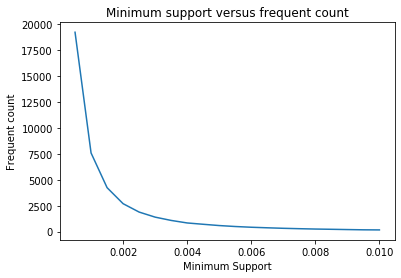

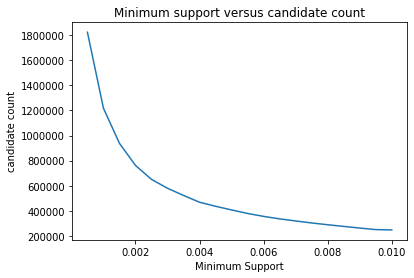

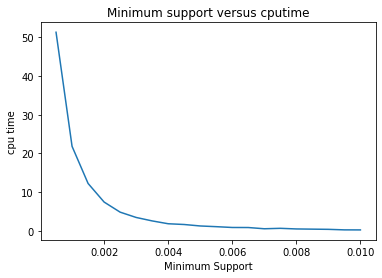

In [18]:
#Execute sensitive analysis graphs are plotted after printing iterations as print statements are used in eclat function
sensitive_analysis()